In [1209]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec
import pandas as pd
import matplotlib as mpl
import seaborn as sns
import seaborn.objects as so
import warnings

## 파이썬 데이터 분석

In [1210]:
# 경고 메시지 무시 설정
warnings.filterwarnings("ignore", category=UserWarning)

# 모든 행과 열 보기.
pd.set_option('display.max_rows', None)  # 모든 행 보기
pd.set_option('display.max_columns', None)  # 모든 열 보기

### 데이터셋 통합 및 전처리

In [1211]:
# 데이터셋 불러오기 및 통합

df_hs_all = pd.read_excel('../1. 전처리/preprocessing/df_hs_all.xlsx')
df_hs_final = pd.read_excel('../1. 전처리/preprocessing/df_hs_all_final.xlsx')

# 수익 , 만족도 분석한 엑셀파일
edit_final = pd.read_excel('edit_final.xlsx')

In [1212]:
# 수익, 만족도 엑셀파일 전처리
## 수익, 만족도 컬럼 뽑아오기
edit_final = edit_final[['YEAR','AREA','INCOME','SATISFACTIONs']]

edit_final.head()

edit_final = edit_final.drop(edit_final[(edit_final['YEAR'] == 2011) | (edit_final['YEAR'] == 2012)].index).reset_index(drop = True)

edit_final['YEAR'] = edit_final['YEAR'].astype('category')

edit_final.head(20)




YEAR AREA       INCOME  SATISFACTIONs
0   2013  강남구   8990.89488       6.050000
1   2014  강남구   9365.52620       6.490000
2   2015  강남구  10708.10850       5.860000
3   2016  강남구  11162.72940       5.590000
4   2017  강남구  11654.44170       5.950000
5   2018  강남구  12637.85550       5.855608
6   2019  강남구  13059.16130       6.260000
7   2020  강남구  13649.42130       5.160000
8   2021  강남구  14489.40480       5.120000
9   2022  강남구  14539.40000       6.450000
10  2013  강동구   1326.56009       5.410000
11  2014  강동구   1441.04402       6.170000
12  2015  강동구   1622.86557       5.940000
13  2016  강동구   1760.99636       5.420000
14  2017  강동구   1867.97000       5.650000
15  2018  강동구   2043.31335       5.758041
16  2019  강동구   2122.81569       5.480000
17  2020  강동구   2008.01038       5.550000
18  2021  강동구   2007.42231       5.360000
19  2022  강동구   2279.10000       6.710000

In [1213]:
# 고유한 AREA 목록 추출
areas = edit_final['AREA'].unique()


# 2023년 데이터를 추가할 준비 -> 선형보간법을 통해서 결측값 대체할 예정. 수익컬럼은 선형성을 띔.
new_rows = pd.DataFrame({
    'YEAR': [2023] * len(areas),  # 각 AREA마다 2023년 데이터 추가
    'AREA': areas,  # 각 AREA
    'INCOME': [np.nan] * len(areas),  # 결측값으로 설정
    'SATISFACTIONs': [np.nan] * len(areas)  # 결측값으로 설정
})

# YEAR가 카테고리형이면, 2023을 범주에 추가한 후 결합
if pd.api.types.is_categorical_dtype(edit_final['YEAR']):
    # YEAR 컬럼이 카테고리형이면 2023 추가
    edit_final['YEAR'] = edit_final['YEAR'].cat.add_categories([2023])

# 기존 데이터와 2023년 데이터를 결합. 
edit_final = pd.concat([edit_final, new_rows], ignore_index=True)

# YEAR 컬럼을 카테고리형으로 유지할 경우 2023을 범주에 추가했으므로 바로 확인
edit_final = edit_final.sort_values(by=['AREA', 'YEAR'])
edit_final.tail(20)

C:\Users\rlaeh\AppData\Local\Temp\ipykernel_14332\2858201976.py:14: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(edit_final['YEAR']):


YEAR AREA        INCOME  SATISFACTIONs
242  2015   중구  37184.263300       5.410000
243  2016   중구  39151.768900       5.340000
244  2017   중구  38050.487000       4.990000
245  2018   중구  40015.695300       5.383716
246  2019   중구  39434.395000       5.330000
247  2020   중구  41646.306700       5.210000
248  2021   중구  46546.859700       5.200000
249  2022   중구  45346.000000       5.680000
284  2023   중구           NaN            NaN
250  2013  중랑구    892.073583       5.640000
251  2014  중랑구    896.097881       6.270000
252  2015  중랑구    921.201567       5.600000
253  2016  중랑구    991.189794       5.290000
254  2017  중랑구   1037.613740       5.530000
255  2018  중랑구   1090.959630       5.620878
256  2019  중랑구   1179.466650       5.230000
257  2020  중랑구   1188.876070       5.420000
258  2021  중랑구   1240.221490       5.090000
259  2022  중랑구   1279.658000       6.550000
285  2023  중랑구           NaN            NaN

In [1214]:
# 선형 보간법을 적용하기 위한 함수
def linear_interpolate_for_area(df):
    # 'AREA'별로 그룹화하고, 각 그룹에 대해 선형 보간법을 적용
    return df.groupby('AREA').apply(lambda group: group.interpolate(method='linear', limit_direction='forward', axis=0))


# 선형 보간법 적용
edit_final = linear_interpolate_for_area(edit_final)

C:\Users\rlaeh\AppData\Local\Temp\ipykernel_14332\3103079374.py:4: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  return df.groupby('AREA').apply(lambda group: group.interpolate(method='linear', limit_direction='forward', axis=0))
C:\Users\rlaeh\AppData\Local\Temp\ipykernel_14332\3103079374.py:4: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  return df.groupby('AREA').apply(lambda group: group.interpolate(method='linear', limit_direction='forward', axis=0))
C:\Users\rlaeh\AppData\Local\Temp\ipykernel_14332\3103079374.py:4: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  return df.groupby('AREA').apply(lambda group: gro

In [1215]:
# 데이터프레임 확인 -> 잘 합쳐진 것을 볼 수 있음. 하지만 수익컬럼에서 중구, 종로구 컬럼에 이상치 발생. # 뒤에서 중앙값으로 대체할 예정
edit_final = edit_final.reset_index(drop = True)
edit_final.tail(20)

YEAR AREA        INCOME  SATISFACTIONs
266  2015   중구  37184.263300       5.410000
267  2016   중구  39151.768900       5.340000
268  2017   중구  38050.487000       4.990000
269  2018   중구  40015.695300       5.383716
270  2019   중구  39434.395000       5.330000
271  2020   중구  41646.306700       5.210000
272  2021   중구  46546.859700       5.200000
273  2022   중구  45346.000000       5.680000
274  2023   중구  45346.000000       5.680000
275  2013  중랑구    892.073583       5.640000
276  2014  중랑구    896.097881       6.270000
277  2015  중랑구    921.201567       5.600000
278  2016  중랑구    991.189794       5.290000
279  2017  중랑구   1037.613740       5.530000
280  2018  중랑구   1090.959630       5.620878
281  2019  중랑구   1179.466650       5.230000
282  2020  중랑구   1188.876070       5.420000
283  2021  중랑구   1240.221490       5.090000
284  2022  중랑구   1279.658000       6.550000
285  2023  중랑구   1279.658000       6.550000

In [1216]:
edit_final = edit_final.rename(columns= {'YEAR':'연도','AREA':'행정구역','INCOME':'수익','SATISFACTIONs':'만족도'})
edit_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   연도      286 non-null    int64  
 1   행정구역    286 non-null    object 
 2   수익      286 non-null    float64
 3   만족도     286 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 9.1+ KB


In [1217]:
df_hs_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 38 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   행정구역                  286 non-null    object
 1   학제                    286 non-null    object
 2   연도                    286 non-null    int64 
 3   학업중단자_전체              286 non-null    int64 
 4   학업중단자_여자              286 non-null    int64 
 5   고등학교_유예_유예계_전체        286 non-null    int64 
 6   고등학교_유예_유예계_여자        286 non-null    int64 
 7   고등학교_면제_면제계_전체        286 non-null    int64 
 8   고등학교_면제_면제계_여자        286 non-null    int64 
 9   고등학교_자퇴_자퇴계_전체        286 non-null    int64 
 10  고등학교_자퇴_자퇴계_여자        286 non-null    int64 
 11  고등학교_자퇴_질병_전체         286 non-null    int64 
 12  고등학교_자퇴_질병_여자         286 non-null    int64 
 13  고등학교_자퇴_가사_전체         286 non-null    int64 
 14  고등학교_자퇴_가사_여자         286 non-null    int64 
 15  고등학교_자퇴_부적응_부적응계_전체   286 non-null    in

In [1218]:
# '행정구역'과 '연도' 기준으로 정렬
df_hs_final = df_hs_final.sort_values(by=['행정구역', '연도'], ascending=[True, True]).reset_index(drop=True)

df_hs_final.head()

행정구역    학제    연도  학업중단자_전체  학업중단자_여자  고등학교_유예_유예계_전체  고등학교_유예_유예계_여자  \
0  강남구  고등학교  2013       622       219               2               0   
1  강남구  고등학교  2014       512       202               0               0   
2  강남구  고등학교  2015       440       178               1               0   
3  강남구  고등학교  2016       408       192               0               0   
4  강남구  고등학교  2017       412       172               0               0   

   고등학교_면제_면제계_전체  고등학교_면제_면제계_여자  고등학교_자퇴_자퇴계_전체  고등학교_자퇴_자퇴계_여자  \
0               1               1             613             216   
1               0               0             505             197   
2               0               0             432             176   
3               0               0             406             192   
4               0               0             408             172   

   고등학교_자퇴_질병_전체  고등학교_자퇴_질병_여자  고등학교_자퇴_가사_전체  고등학교_자퇴_가사_여자  \
0             28             10             20              7   
1             26             12             24              9   
2             22              9              3              1   
3             20             10              5              0   
4             25              9              2              1   

   고등학교_자퇴_부적응_부적응계_전체  고등학교_자퇴_부적응_부적응계_여자  고등학교_자퇴_부적응_학업관련_전체  \
0                  121                   30                   45   
1                  108                   21                   51   
2                   51                   17                   28   
3                   32                   10                   13   
4                   17                    6                    6   

   고등학교_자퇴_부적응_학업관련_여자  고등학교_자퇴_부적응_대인관계_전체  고등학교_자퇴_부적응_대인관계_여자  \
0                   14                    2                    0   
1                   14                    7                    2   
2                    9                    0                    0   
3                    2                    0                    0   
4                    3                    0                    0   

   고등학교_자퇴_부적응_학교규칙_전체  고등학교_자퇴_부적응_학교규칙_여자  고등학교_자퇴_부적응_기타_전체  \
0                   23                    7                 51   
1                   18                    0                 32   
2                    3                    2                 20   
3                    0                    0                 19   
4                    0                    0                 11   

   고등학교_자퇴_부적응_기타_여자  고등학교_자퇴_해외출국_전체  고등학교_자퇴_해외출국_여자  고등학교_자퇴_기타_전체  \
0                  9              342              136            102   
1                  5              278              123             69   
2                  6              242               99            114   
3                  8              222              105            127   
4                  3              230               93            134   

   고등학교_자퇴_기타_여자  고등학교_퇴학_퇴학계_전체  고등학교_퇴학_퇴학계_여자  고등학교_퇴학_학교폭력위원회_전체  \
0             33               6               2                   5   
1             32               2               2                   1   
2             50               4               1                   1   
3             67               2               0                   1   
4             63               4               0                   1   

   고등학교_퇴학_학교폭력위원회_여자  고등학교_퇴학_학칙위반에따른징계_전체  고등학교_퇴학_학칙위반에따른징계_여자  \
0                   2                     1                     0   
1                   1                     1                     1   
2                   0                     3                     1   
3                   0                     1                     0   
4                   0                     3                     0   

   고등학교_제적_제적계_전체  고등학교_제적_제적계_여자  전체학생수  
0               0               0  25600  
1               5               3  24949  
2               3               1  24565  
3               0               0  24275  
4               0               0 

In [1219]:
# '수익'과 '만족도' 컬럼만 선택하여 df_hs_final과 결합 -> concat 사용,  join x
df_hs_final = pd.concat([df_hs_final, edit_final[['수익', '만족도']]], axis=1)

# 결과 출력
df_hs_final.head()

행정구역    학제    연도  학업중단자_전체  학업중단자_여자  고등학교_유예_유예계_전체  고등학교_유예_유예계_여자  \
0  강남구  고등학교  2013       622       219               2               0   
1  강남구  고등학교  2014       512       202               0               0   
2  강남구  고등학교  2015       440       178               1               0   
3  강남구  고등학교  2016       408       192               0               0   
4  강남구  고등학교  2017       412       172               0               0   

   고등학교_면제_면제계_전체  고등학교_면제_면제계_여자  고등학교_자퇴_자퇴계_전체  고등학교_자퇴_자퇴계_여자  \
0               1               1             613             216   
1               0               0             505             197   
2               0               0             432             176   
3               0               0             406             192   
4               0               0             408             172   

   고등학교_자퇴_질병_전체  고등학교_자퇴_질병_여자  고등학교_자퇴_가사_전체  고등학교_자퇴_가사_여자  \
0             28             10             20              7   
1             26             12             24              9   
2             22              9              3              1   
3             20             10              5              0   
4             25              9              2              1   

   고등학교_자퇴_부적응_부적응계_전체  고등학교_자퇴_부적응_부적응계_여자  고등학교_자퇴_부적응_학업관련_전체  \
0                  121                   30                   45   
1                  108                   21                   51   
2                   51                   17                   28   
3                   32                   10                   13   
4                   17                    6                    6   

   고등학교_자퇴_부적응_학업관련_여자  고등학교_자퇴_부적응_대인관계_전체  고등학교_자퇴_부적응_대인관계_여자  \
0                   14                    2                    0   
1                   14                    7                    2   
2                    9                    0                    0   
3                    2                    0                    0   
4                    3                    0                    0   

   고등학교_자퇴_부적응_학교규칙_전체  고등학교_자퇴_부적응_학교규칙_여자  고등학교_자퇴_부적응_기타_전체  \
0                   23                    7                 51   
1                   18                    0                 32   
2                    3                    2                 20   
3                    0                    0                 19   
4                    0                    0                 11   

   고등학교_자퇴_부적응_기타_여자  고등학교_자퇴_해외출국_전체  고등학교_자퇴_해외출국_여자  고등학교_자퇴_기타_전체  \
0                  9              342              136            102   
1                  5              278              123             69   
2                  6              242               99            114   
3                  8              222              105            127   
4                  3              230               93            134   

   고등학교_자퇴_기타_여자  고등학교_퇴학_퇴학계_전체  고등학교_퇴학_퇴학계_여자  고등학교_퇴학_학교폭력위원회_전체  \
0             33               6               2                   5   
1             32               2               2                   1   
2             50               4               1                   1   
3             67               2               0                   1   
4             63               4               0                   1   

   고등학교_퇴학_학교폭력위원회_여자  고등학교_퇴학_학칙위반에따른징계_전체  고등학교_퇴학_학칙위반에따른징계_여자  \
0                   2                     1                     0   
1                   1                     1                     1   
2                   0                     3                     1   
3                   0                     1                     0   
4                   0                     3                     0   

   고등학교_제적_제적계_전체  고등학교_제적_제적계_여자  전체학생수           수익   만족도  
0               0               0  25600   8990.89488  6.05  
1               5               3  24949   9365.52620  6.49  
2               3               1  24565  10708.10850  5.86  
3

In [1220]:
# 컬럼 추출
# 자퇴_기타 , 자퇴_질병, 자퇴_가사, 자퇴_해외출국, 자퇴_부적응_학업관련, 자퇴_부적응_대인관계, 자퇴_부적응_학교규칙, 자퇴_부적응_기타 

# 특정 조건에 맞는 컬럼 추출
columns_to_subtract = [
    col for col in df_hs_final.columns
    if col.startswith(('고등학교_유예_유예계', '고등학교_면제_면제계', '고등학교_퇴학_퇴학계', '고등학교_제적_제적계')) and col.endswith('_전체')
]

# 학업중단자_전체에서 조건에 맞는 컬럼 값의 합계를 빼줌
df_hs_final['학업중단자_전체'] -= df_hs_final[columns_to_subtract].sum(axis=1)

# 학업중단률 컬럼 생성
df_hs_final['학업중단률'] =(df_hs_final['학업중단자_전체']/ df_hs_final['전체학생수']) * 100

main_column = ['행정구역','연도','학업중단률','고등학교_자퇴_질병_전체','고등학교_자퇴_가사_전체','고등학교_자퇴_해외출국_전체','고등학교_자퇴_부적응_학업관련_전체','고등학교_자퇴_부적응_대인관계_전체','고등학교_자퇴_부적응_학교규칙_전체','고등학교_자퇴_부적응_기타_전체','고등학교_자퇴_기타_전체','수익','만족도']
df_hs = df_hs_final[main_column]

# rename
df_hs = df_hs.rename(columns={
                      '고등학교_자퇴_질병_전체':'질병',
                      '고등학교_자퇴_가사_전체':'가사',
                      '고등학교_자퇴_해외출국_전체':'해외출국',
                      '고등학교_자퇴_부적응_학업관련_전체':'부적응_학업관련',
                      '고등학교_자퇴_부적응_대인관계_전체':'부적응_대인관계',
                      '고등학교_자퇴_부적응_학교규칙_전체':'부적응_학교규칙',
                      '고등학교_자퇴_부적응_기타_전체': '부적응_기타',
                      '고등학교_자퇴_기타_전체' :'기타'}
                      )

# 소계 삭제.
df_hs = df_hs.drop(index=[187,188,189,190,191,192,193,194,195,196,197])
df_hs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 275 entries, 0 to 285
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   행정구역      275 non-null    object 
 1   연도        275 non-null    int64  
 2   학업중단률     275 non-null    float64
 3   질병        275 non-null    int64  
 4   가사        275 non-null    int64  
 5   해외출국      275 non-null    int64  
 6   부적응_학업관련  275 non-null    int64  
 7   부적응_대인관계  275 non-null    int64  
 8   부적응_학교규칙  275 non-null    int64  
 9   부적응_기타    275 non-null    int64  
 10  기타        275 non-null    int64  
 11  수익        275 non-null    float64
 12  만족도       275 non-null    float64
dtypes: float64(3), int64(9), object(1)
memory usage: 30.1+ KB


진행

In [1221]:
# EDA
df_hs.describe()

연도       학업중단률          질병          가사        해외출국  \
count   275.000000  275.000000  275.000000  275.000000  275.000000   
mean   2018.000000    1.604309    8.814545    4.130909   39.381818   
std       3.168043    0.402638    5.755208    9.177743   44.513957   
min    2013.000000    0.541098    0.000000    0.000000    0.000000   
25%    2015.000000    1.317152    5.000000    0.000000   16.000000   
50%    2018.000000    1.589320    7.000000    1.000000   25.000000   
75%    2021.000000    1.844087   12.000000    4.000000   44.500000   
max    2023.000000    2.704164   28.000000   72.000000  342.000000   

         부적응_학업관련    부적응_대인관계    부적응_학교규칙      부적응_기타          기타  \
count  275.000000  275.000000  275.000000  275.000000  275.000000   
mean    23.760000    1.901818    4.207273   19.869091   69.312727   
std     28.711767    2.677528    7.584845   17.348435   41.183810   
min      0.000000    0.000000    0.000000    0.000000    6.000000   
25%      6.000000    0.000000    0.000000    8.000000   40.000000   
50%     15.000000    1.000000    1.000000   16.000000   59.000000   
75%     32.000000    2.000000    5.500000   26.000000   89.000000   
max    250.000000   19.000000   67.000000  122.000000  210.000000   

                 수익         만족도  
count    275.000000  275.000000  
mean    5474.137832    5.641811  
std     8314.816710    0.581204  
min      644.761676    3.900000  
25%     1281.610865    5.275000  
50%     2279.100000    5.515068  
75%     5626.876975    5.910000  
max    46546.859700    7.360000

In [1222]:
# 컬럼 속성 분석
profile_summary = {
    "Column": df_hs.columns,
    "Total Count": [df_hs[col].size for col in df_hs.columns],
    "Unique Count": [df_hs[col].nunique() for col in df_hs.columns],
    "Null Count": [df_hs[col].isnull().sum() for col in df_hs.columns],
    "최대값": [df_hs[col].max() if pd.api.types.is_numeric_dtype(df_hs[col]) else None for col in df_hs.columns],
    "최소값": [df_hs[col].min() if pd.api.types.is_numeric_dtype(df_hs[col]) else None for col in df_hs.columns],
    "최빈값": [df_hs[col].mode()[0] if not df_hs[col].mode().empty else None for col in df_hs.columns],
    "최소빈도값": [
        df_hs[col].value_counts().idxmin() if not df_hs[col].value_counts().empty else None for col in df_hs.columns
    ],
    "최대빈도": [df_hs[col].value_counts().max() if not df_hs[col].value_counts().empty else None for col in df_hs.columns],
    "최소빈도": [df_hs[col].value_counts().min() if not df_hs[col].value_counts().empty else None for col in df_hs.columns],
}

profile_df = pd.DataFrame(profile_summary)
profile_df

# 결측값은 존재하지 않음.

Column  Total Count  Unique Count  Null Count           최대값  \
0       행정구역          275            25           0           NaN   
1         연도          275            11           0   2023.000000   
2      학업중단률          275           275           0      2.704164   
3         질병          275            28           0     28.000000   
4         가사          275            31           0     72.000000   
5       해외출국          275            94           0    342.000000   
6   부적응_학업관련          275            73           0    250.000000   
7   부적응_대인관계          275            16           0     19.000000   
8   부적응_학교규칙          275            28           0     67.000000   
9     부적응_기타          275            58           0    122.000000   
10        기타          275           119           0    210.000000   
11        수익          275           250           0  46546.859700   
12       만족도          275           153           0      7.360000   

            최소값       최빈값       최소빈도값  최대빈도  최소빈도  
0           NaN       강남구         강남구    11    11  
1   2013.000000      2013        2013    25    25  
2      0.541098  0.541098    2.394531     1     1  
3      0.000000         5           0    29     1  
4      0.000000         0          24   102     1  
5      0.000000        23          67    11     1  
6      0.000000         5          67    16     1  
7      0.000000         0          13    88     1  
8      0.000000         0          20    84     1  
9      0.000000         5           0    16     1  
10     6.000000        54          55     8     1  
11   644.761676   1122.94  8449.31228     2     1  
12     3.900000      5.29        5.34     7     1

### 수치형 컬럼 분석

In [1223]:
plt.rc('font', family='Malgun Gothic')
import klib

#### 학업중단률

<Axes: xlabel='학업중단률', ylabel='Density'>

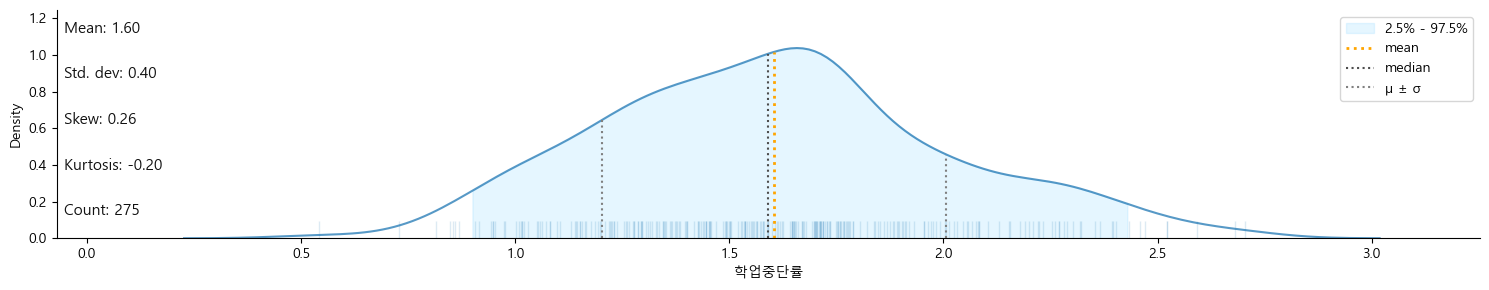

In [1224]:
# 수치형
klib.dist_plot(df_hs['학업중단률'])

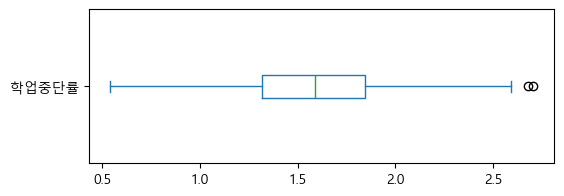

In [1225]:
# 이상치 탐색
# IQR 이상치 탐색
df_hs['학업중단률'].plot(kind='box', vert=False, figsize=(6, 2)); # ''을 붙이면 출력값이 사라짐

#### 질병

<Axes: xlabel='질병', ylabel='Density'>

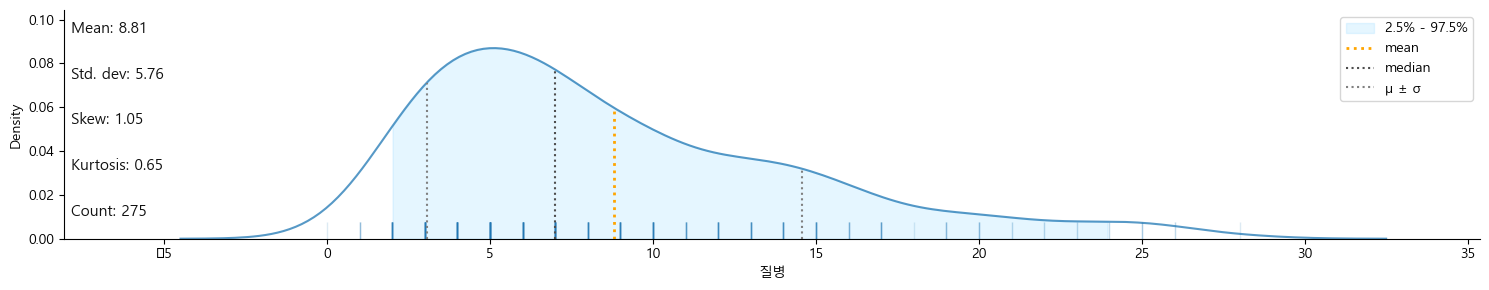

In [1226]:
# 수치형
klib.dist_plot(df_hs['질병'])

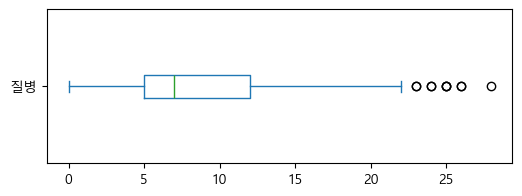

In [1227]:
# 이상치 탐색
# IQR 이상치 탐색
df_hs['질병'].plot(kind='box', vert=False, figsize=(6, 2)); # ''을 붙이면 출력값이 사라짐

In [1228]:
# klib.dist_plot(df_numeric_cleaning['질병'])

#### 가사

<Axes: xlabel='가사', ylabel='Density'>

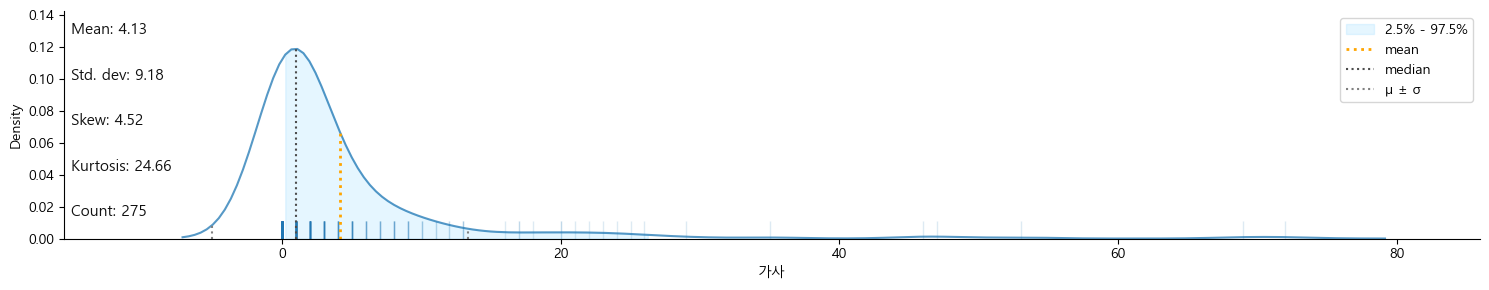

In [1229]:
# 수치형
klib.dist_plot(df_hs['가사'])

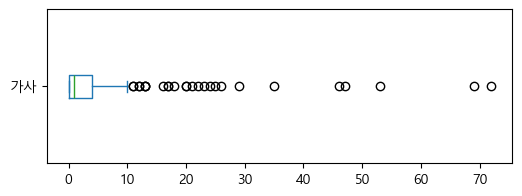

In [1230]:
df_hs['가사'].plot(kind='box', vert=False, figsize=(6, 2)); # ''을 붙이면 출력값이 사라짐

#### 해외출국

klib.dist_plot(df_hs['해외출국'])

<Axes: xlabel='해외출국', ylabel='Density'>

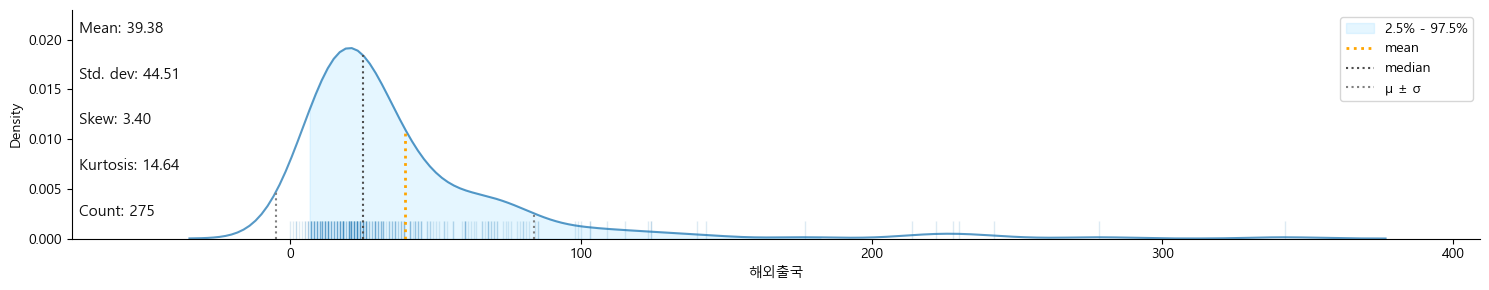

In [1231]:
klib.dist_plot(df_hs['해외출국'])

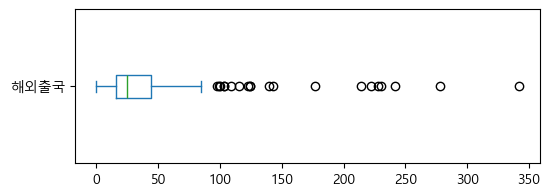

In [1232]:
df_hs['해외출국'].plot(kind='box', vert=False, figsize=(6, 2)); # ''을 붙이면 출력값이 사라짐

#### 부적응_학업관련

<Axes: xlabel='부적응_학업관련', ylabel='Density'>

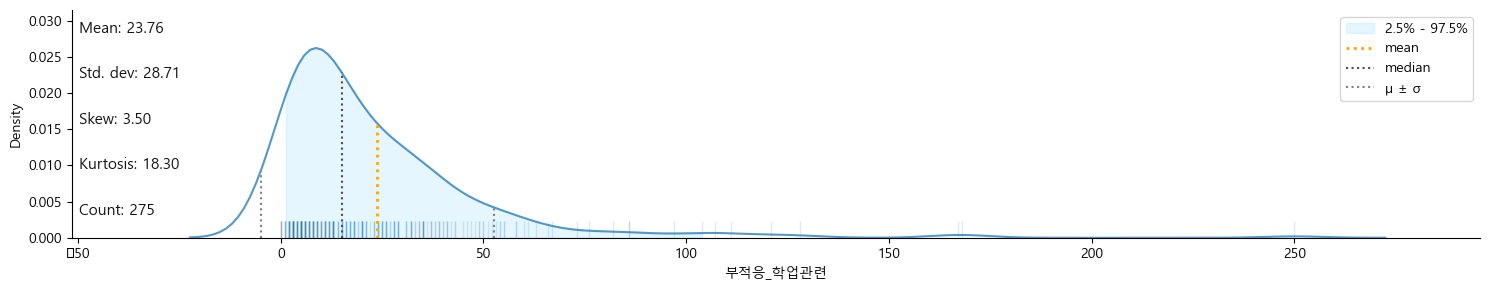

In [1233]:
klib.dist_plot(df_hs['부적응_학업관련'])

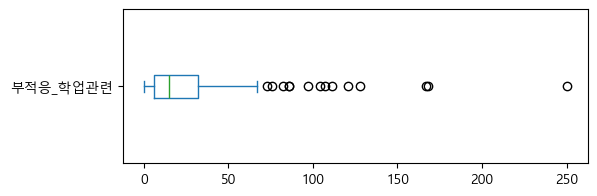

In [1234]:
df_hs['부적응_학업관련'].plot(kind='box', vert=False, figsize=(6, 2)); # ''을 붙이면 출력값이 사라짐

#### 부적응_대인관계

<Axes: xlabel='부적응_대인관계', ylabel='Density'>

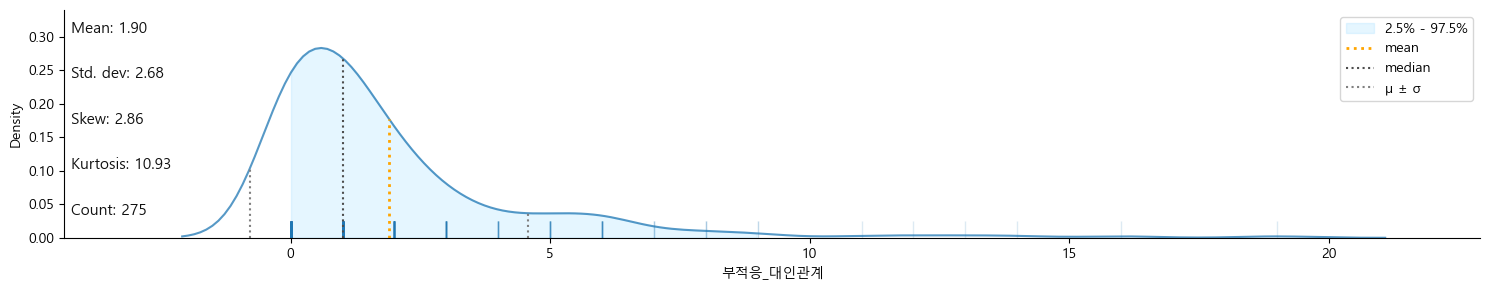

In [1235]:
klib.dist_plot(df_hs['부적응_대인관계'])

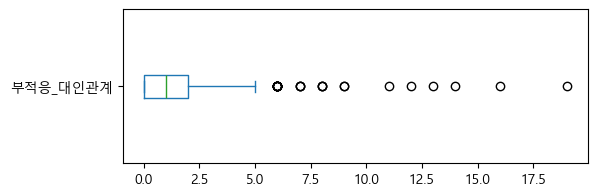

In [1236]:
df_hs['부적응_대인관계'].plot(kind='box', vert=False, figsize=(6, 2)); # ''을 붙이면 출력값이 사라짐

#### 부적응_학교규칙

<Axes: xlabel='부적응_학교규칙', ylabel='Density'>

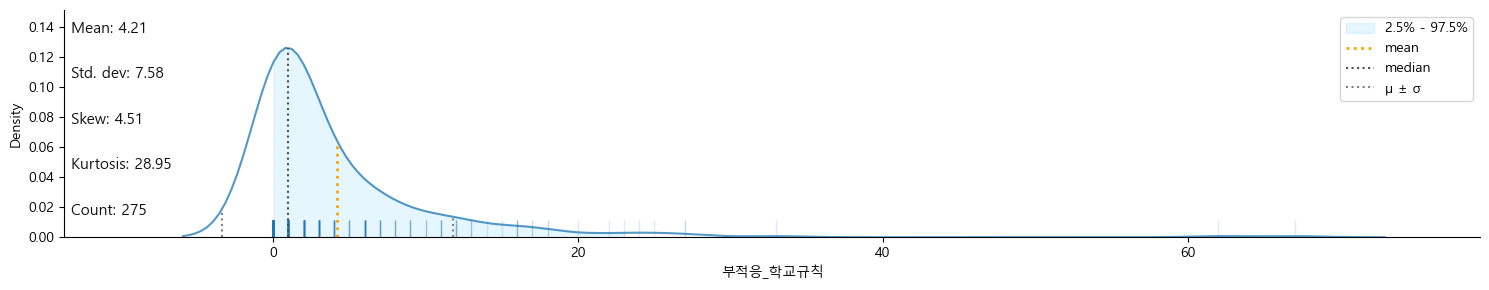

In [1237]:
klib.dist_plot(df_hs['부적응_학교규칙'])

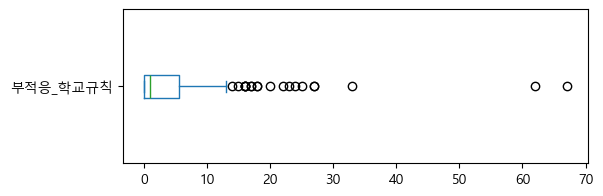

In [1238]:
df_hs['부적응_학교규칙'].plot(kind='box', vert=False, figsize=(6, 2)); # ''을 붙이면 출력값이 사라짐

#### 부적응_기타

<Axes: xlabel='부적응_기타', ylabel='Density'>

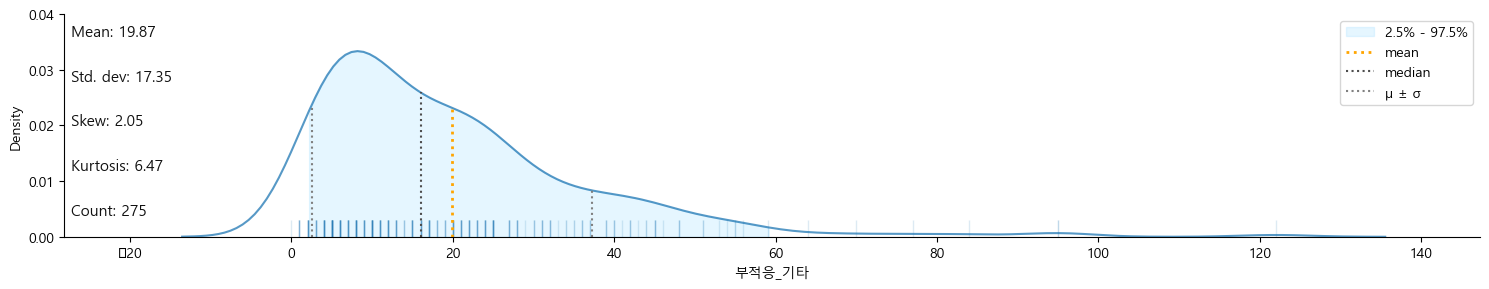

In [1239]:
klib.dist_plot(df_hs['부적응_기타'])

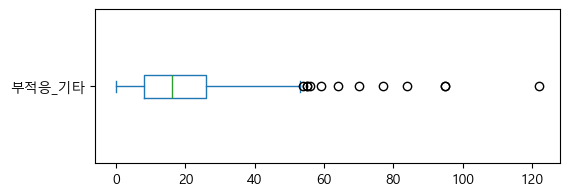

In [1240]:
df_hs['부적응_기타'].plot(kind='box', vert=False, figsize=(6, 2)); # ''을 붙이면 출력값이 사라짐

#### 기타

<Axes: xlabel='기타', ylabel='Density'>

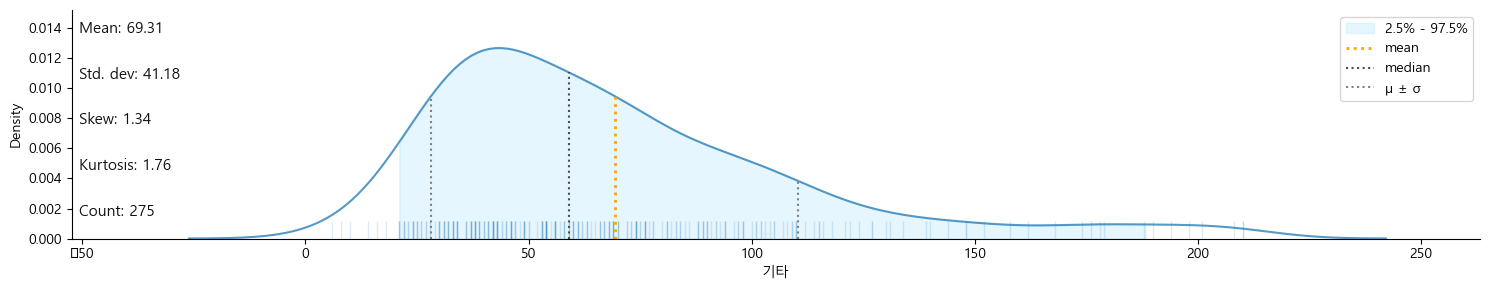

In [1241]:
klib.dist_plot(df_hs['기타'])

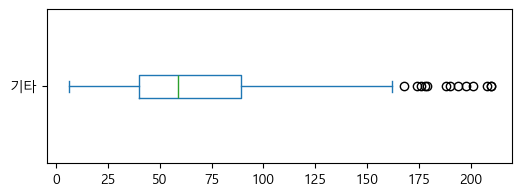

In [1242]:
df_hs['기타'].plot(kind='box', vert=False, figsize=(6, 2)); # ''을 붙이면 출력값이 사라짐

#### 수익

<Axes: >

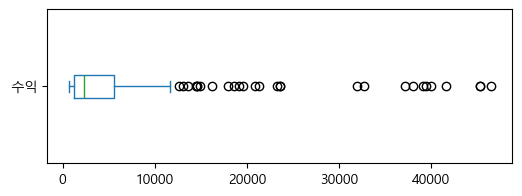

In [1243]:
df_hs['수익'].plot(kind='box', vert=False, figsize=(6, 2))

<Axes: xlabel='수익', ylabel='Density'>

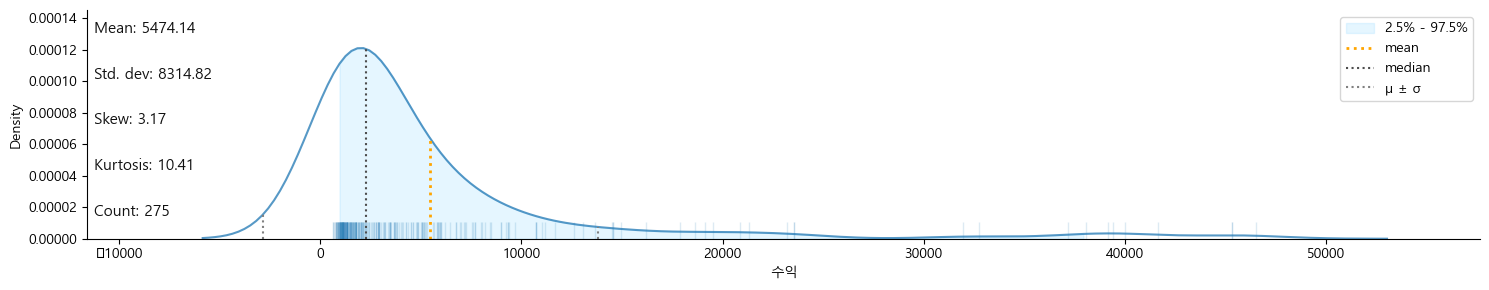

In [1244]:
klib.dist_plot(df_hs['수익'])

#### 만족도

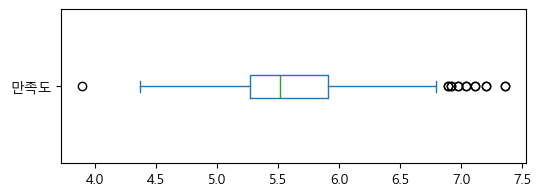

In [1245]:
df_hs['만족도'].plot(kind='box', vert=False, figsize=(6, 2)); # ''을 붙이면 출력값이 사라짐

<Axes: xlabel='만족도', ylabel='Density'>

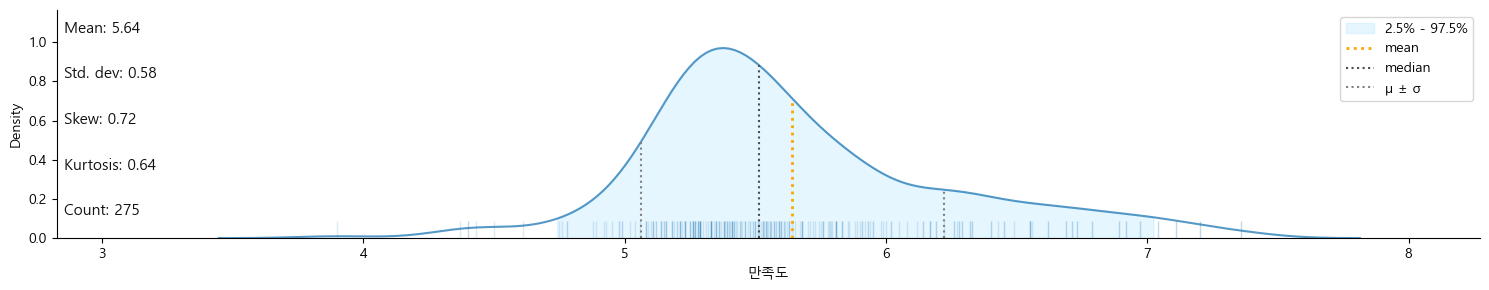

In [1246]:
klib.dist_plot(df_hs['만족도'])

< 분석 >

- 모든 수치형 컬럼은 정규분포 모양을 띔. 하지만 왜도가 높아 오른쪽으로 꼬리가 긴 형태가 많음.

- 이상치 존재. 이상치 제거할 예정

#### 전체 컬럼 이상치

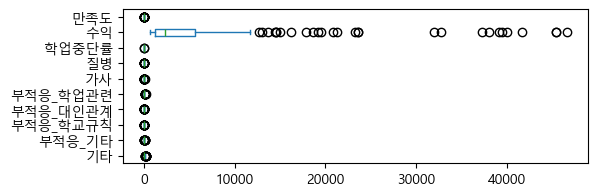

In [1247]:
df_hs[['기타','해외출국','부적응_기타','부적응_학교규칙','부적응_대인관계','부적응_학업관련','해외출국','가사','질병','학업중단률','수익','만족도']].plot(kind='box', vert=False, figsize=(6, 2)); # ''을 붙이면 출력값이 사라짐

- 수익에서 큰 이상치 발견. 

- 수익 컬럼은 값이 크기때문에 로그변환 시켜줄 예정.

<Axes: title={'center': 'Feature-correlation (pearson)'}>

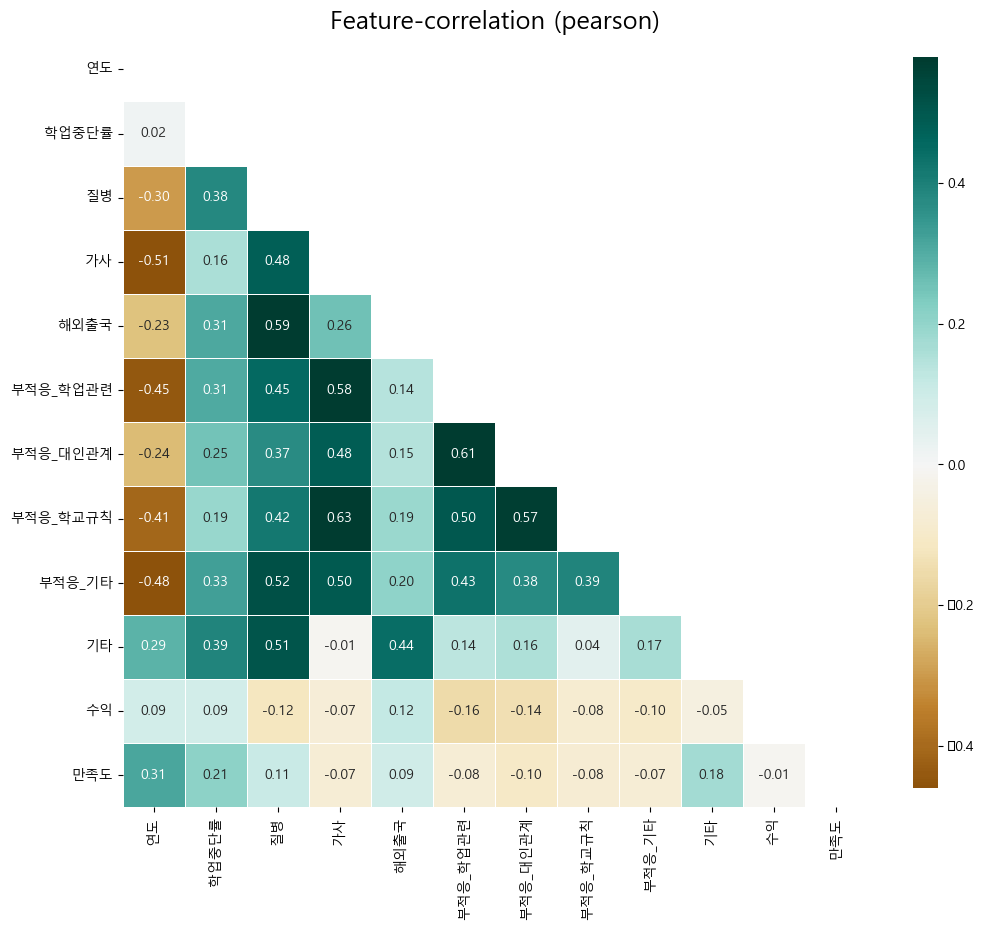

In [1248]:
klib.corr_plot(df_hs)

### 이상치 제거 (단변량)

In [1249]:

df_hs_cleaning = df_hs.copy()
list_index = []

In [1250]:
df_hs_cleaning

행정구역    연도     학업중단률  질병  가사  해외출국  부적응_학업관련  부적응_대인관계  부적응_학교규칙  부적응_기타  \
0     강남구  2013  2.394531  28  20   342        45         2        23      51   
1     강남구  2014  2.024129  26  24   278        51         7        18      32   
2     강남구  2015  1.758600  22   3   242        28         0         3      20   
3     강남구  2016  1.672503  20   5   222        13         0         0      19   
4     강남구  2017  1.772449  25   2   230         6         0         0      11   
5     강남구  2018  2.004389   7   1   228        25         1         2       8   
6     강남구  2019  2.365777  17   1   214         5         1         0      24   
7     강남구  2020  2.259349  16   0   177         4         1         1      14   
8     강남구  2021  1.294866   7   0    82         5         1         0       9   
9     강남구  2022  1.768275  11   0   124         4         0         0       5   
10    강남구  2023  1.913463   6   0   109         3         0         1       6   
11    강동구  2013  2.031875  20  13    54        29         2        24     122   
12    강동구  2014  1.679829  14   8    44        13         5         4      95   
13    강동구  2015  1.451500   7   4    47         8         1         2      56   
14    강동구  2016  1.140848   9   2    36        16         1         4      48   
15    강동구  2017  1.259350   9   3    45         4         1         1      21   
16    강동구  2018  1.398430   6   0    60         2         1         0      25   
17    강동구  2019  1.439232  13   2    45         6         1         3      22   
18    강동구  2020  1.752304  14   1    41         4         3         0      37   
19    강동구  2021  1.140080   7   0    18         5         0         0       8   
20    강동구  2022  1.490271   8   0    31         5         0         1      18   
21    강동구  2023  1.577636  18   0    29         6         0         1      25   
22    강북구  2013  1.712465  14   1     8        28         0        27      23   
23    강북구  2014  1.555772  10   1    11        35         0        27       2   
24    강북구  2015  1.535761   7   5    11        49         0         0      10   
25    강북구  2016  1.309846   7   1     7        13         1         0       4   
26    강북구  2017  1.297078   5   1    22         5         0         0       3   
27    강북구  2018  1.848118   5   0    23        21         4         0       3   
28    강북구  2019  1.551786   9   0    14        11         3         1       9   
29    강북구  2020  1.384212   5   0    13         8         3         0       2   
30    강북구  2021  0.973654   2   0     6         6         0         0       5   
31    강북구  2022  1.193080   2   0     5         3         0         0       5   
32    강북구  2023  1.562500   5   0    12         0         0         0       4   
33    강서구  2013  2.470050  23  72    74       250        13        14      53   
34    강서구  2014  2.318428  20  53    56       167        16        62      55   
35    강서구  2015  1.653372  15   8    56        97         5         5      48   
36    강서구  2016  1.731776  15   9    66       107         2         3      32   
37    강서구  2017  1.713651  12   4    49        66         5        16      28   
38    강서구  2018  1.874678  10   2    43        43         3         0      25   
39    강서구  2019  2.179071  17   2    53        49         1         1      32   
40    강서구  2020  2.013602  15   0    42        39         5         0      27   
41    강서구  2021  1.053450   8   0    20        11         0         0      12   
42    강서구  2022  1.963724  13   0    17        17         0         0      17   
43    강서구  2023  2.403225  13   1    43        23         1         0      25   
44    관악구  2013  1.723376  17  13    23        28         0         0      77   
45    관악구  2014  2.129601  17  12    36        37         1         6      70   
46    관악구  2015  1.953563  13  10    27        35         2         7      40   
47    관악구  2016  1.612903  12   3    32        29         1         2      39   
48    관악구  2017  1.773876  12   5   

- 수익 컬럼의 중구, 종로구에서 이상치 관측. 

- 두 행정구역은 중앙값 대체를 통해 이상치를 대체할 예정.

In [1251]:
# 엑셀로 최종 데이터 셋 저장.
df_hs_cleaning.to_excel('final_data.xlsx',index = False)

In [1252]:
# 수정 후 삭제 예정. 일단 중앙값 대체

# '행정구역'이 '중구' 또는 '종로구'인 행에서 '수익' 컬럼을 결측값으로 변경
df_hs_cleaning.loc[df_hs_cleaning['행정구역'].isin(['중구', '종로구']), '수익'] = np.nan

# '수익' 컬럼의 중앙값 계산
median_value = df_hs_cleaning['수익'].median()

# 결측값을 중앙값으로 대체
df_hs_cleaning['수익'].fillna(median_value, inplace=True)

# 결과 확인
print(df_hs_cleaning[df_hs_cleaning['행정구역'] == '중구'])
print(df_hs_cleaning[df_hs_cleaning['행정구역'] == '종로구'])



    행정구역    연도     학업중단률  질병  가사  해외출국  부적응_학업관련  부적응_대인관계  부적응_학교규칙  부적응_기타  \
264   중구  2013  1.520833   5  26    26        21         0        17      22   
265   중구  2014  1.503759   9   9    30        38         0         1      20   
266   중구  2015  1.063473   7   0    18        26         0         0      16   
267   중구  2016  1.016783   3   3    17        10         1         6      11   
268   중구  2017  1.080600   2   3    22        15         1         1      16   
269   중구  2018  1.445815   3   1    21        18         0         3       9   
270   중구  2019  1.586852   4   3    23        13         0         2      23   
271   중구  2020  1.990789   5   1    18         9         3         3      15   
272   중구  2021  0.905416   4   0     8         3         1         2       5   
273   중구  2022  2.704164  10   0    14         1         0         0      51   
274   중구  2023  2.680608   5   1    17         5         1         4      30   

     기타          수익       만족도  
264  29

C:\Users\rlaeh\AppData\Local\Temp\ipykernel_14332\4272183000.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_hs_cleaning['수익'].fillna(median_value, inplace=True)


#### 질병

In [1253]:
# z-score
from scipy.stats import zscore

z = zscore(df_hs_cleaning['질병'])
print('Z-score Outliers:', df_hs_cleaning['질병'][(z < -3)|(z > 3)].values)

list_index.append(df_hs_cleaning['질병'][(z < -3)|(z > 3)].index) # w


Z-score Outliers: [28]


In [1254]:
df_hs_cleaning[df_hs_cleaning['질병'] == 28] # 너무 많음.

행정구역    연도     학업중단률  질병  가사  해외출국  부적응_학업관련  부적응_대인관계  부적응_학교규칙  부적응_기타  \
0  강남구  2013  2.394531  28  20   342        45         2        23      51   

    기타          수익   만족도  
0  102  8990.89488  6.05

#### 가사

In [1255]:
z = zscore(df_hs_cleaning['가사'])
print('Z-score Outliers:', df_hs_cleaning['가사'][(z < -3)|(z > 3)].values)

list_index.append(df_hs_cleaning['가사'][(z < -3)|(z > 3)].index.tolist()) # 제거 리스트

Z-score Outliers: [72 53 69 47 35 46]


In [1256]:
df_hs_cleaning[df_hs_cleaning['가사'] == 72] # 33
# df_hs_cleaning[df_hs_cleaning['가사'] == 35]
print(df_hs_cleaning[df_hs_cleaning['가사'] == 69]) # 88
print(df_hs_cleaning['가사'].mean())
print(df_hs_cleaning['가사'].median())

## mean값이 median값 보다 3배 이상 높음. 이상치들은 중앙값의 30배 이상 높음.//  모델의 결정계수를 낮추기 때문에 -> 이상치 제거 바람직하다고 판단

   행정구역    연도    학업중단률  질병  가사  해외출국  부적응_학업관련  부적응_대인관계  부적응_학교규칙  부적응_기타  \
88  노원구  2013  1.70921  25  69    69        73        19        67      84   

     기타          수익   만족도  
88  127  783.401933  5.11  
4.130909090909091
1.0


#### 해외출국

In [1257]:
z = zscore(df_hs_cleaning['해외출국'])
print('Z-score Outliers:', df_hs_cleaning['해외출국'][(z < -3)|(z > 3)].values)

# list_index.append(df_hs_cleaning['해외출국'][(z < -3)|(z > 3)].index.tolist())

print(df_hs_cleaning['해외출국'].mean())
print(df_hs_cleaning['해외출국'].median())

Z-score Outliers: [342 278 242 222 230 228 214 177]
39.38181818181818
25.0


In [1258]:
df_hs_cleaning[df_hs_cleaning['해외출국'] >= 177] # 강남 해외출국 많음. 

행정구역    연도     학업중단률  질병  가사  해외출국  부적응_학업관련  부적응_대인관계  부적응_학교규칙  부적응_기타  \
0  강남구  2013  2.394531  28  20   342        45         2        23      51   
1  강남구  2014  2.024129  26  24   278        51         7        18      32   
2  강남구  2015  1.758600  22   3   242        28         0         3      20   
3  강남구  2016  1.672503  20   5   222        13         0         0      19   
4  강남구  2017  1.772449  25   2   230         6         0         0      11   
5  강남구  2018  2.004389   7   1   228        25         1         2       8   
6  강남구  2019  2.365777  17   1   214         5         1         0      24   
7  강남구  2020  2.259349  16   0   177         4         1         1      14   

    기타           수익       만족도  
0  102   8990.89488  6.050000  
1   69   9365.52620  6.490000  
2  114  10708.10850  5.860000  
3  127  11162.72940  5.590000  
4  134  11654.44170  5.950000  
5  139  12637.85550  5.855608  
6  176  13059.16130  6.260000  
7  190  13649.42130  5.160000

#### 부적응_학업관련

In [1259]:
z = zscore(df_hs_cleaning['부적응_학업관련'])
print('Z-score Outliers:', df_hs_cleaning['부적응_학업관련'][(z < -3)|(z > 3)].values)

list_index.append(df_hs_cleaning['부적응_학업관련'][(z < -3)|(z > 3)].index.tolist()) # 값이 평균값을 크게 키우고 있음. 중앙값인 15보다 10배 이상 크므로 제거해주는 것이 바람직하다고 판단함.

print(df_hs_cleaning['부적응_학업관련'].mean())
print(df_hs_cleaning['부적응_학업관련'].median()) 

Z-score Outliers: [250 167 128 168 111 121]
23.76
15.0


In [1260]:
df_hs_cleaning[df_hs_cleaning['부적응_학업관련'] >= 111] 

행정구역    연도     학업중단률  질병  가사  해외출국  부적응_학업관련  부적응_대인관계  부적응_학교규칙  부적응_기타  \
33   강서구  2013  2.470050  23  72    74       250        13        14      53   
34   강서구  2014  2.318428  20  53    56       167        16        62      55   
89   노원구  2014  1.417539  19  16    68       128         9        22      44   
176  성북구  2013  2.432674  14   9    22       168         6         9      17   
178  성북구  2015  2.269516   7   1    29       111        11         8      41   
243  은평구  2014  1.623952  14  21    29       121         6         3      32   

      기타           수익   만족도  
33    68  1460.964720  5.90  
34    76  1457.490620  4.95  
89   118   827.446865  5.29  
176   54  1005.996530  6.56  
178   49  1151.512480  5.93  
243   49   657.774673  5.16

#### 부적응_학교규칙

In [1261]:
z = zscore(df_hs_cleaning['부적응_학교규칙'])
print('Z-score Outliers:', df_hs_cleaning['부적응_학교규칙'][(z < -3)|(z > 3)].values)

# list_index.append(df_hs_cleaning['부적응_학교규칙'][(z < -3)|(z > 3)].index.tolist())
print(df_hs_cleaning['부적응_학교규칙'].mean())
print(df_hs_cleaning['부적응_학교규칙'].median())

Z-score Outliers: [27 27 62 67 33]
4.207272727272727
1.0


In [1262]:
df_hs_cleaning[df_hs_cleaning['부적응_학교규칙'] == 67]
df_hs_cleaning[df_hs_cleaning['부적응_학교규칙'] == 62]

행정구역    연도     학업중단률  질병  가사  해외출국  부적응_학업관련  부적응_대인관계  부적응_학교규칙  부적응_기타  \
34  강서구  2014  2.318428  20  53    56       167        16        62      55   

    기타          수익   만족도  
34  76  1457.49062  4.95

#### 부적응_기타

In [1263]:
z = zscore(df_hs_cleaning['부적응_기타'])
print('Z-score Outliers:', df_hs_cleaning['부적응_기타'][(z < -3)|(z > 3)].values)

list_index.append(df_hs_cleaning['부적응_기타'][(z < -3)|(z > 3)].index.tolist()) # 양의 왜도 발생. 이상치들이 평균을 높히고 있음. 중앙값인 16보다 7배 이상 크므로 삭제해주는 것이 바람직하다고 판단.
print(df_hs_cleaning['부적응_기타'].mean())
print(df_hs_cleaning['부적응_기타'].median())

Z-score Outliers: [122  95  77  95  84]
19.869090909090907
16.0


In [1264]:
df_hs_cleaning[df_hs_cleaning['부적응_기타'] == 122] 

행정구역    연도     학업중단률  질병  가사  해외출국  부적응_학업관련  부적응_대인관계  부적응_학교규칙  부적응_기타  \
11  강동구  2013  2.031875  20  13    54        29         2        24     122   

    기타          수익   만족도  
11  56  1326.56009  5.41

In [1265]:
list_index.append([11]) # 너무 많음.

#### 기타

In [1266]:
z = zscore(df_hs_cleaning['기타'])
print('Z-score Outliers:', df_hs_cleaning['기타'][(z < -3)|(z > 3)].values)

list_index.append(df_hs_cleaning['기타'][(z < -3)|(z > 3)].index.tolist()) # 양의 왜도. 이상치 값이 평균을 높이고 있음. 제거.
print(df_hs_cleaning['기타'].mean())
print(df_hs_cleaning['기타'].median())

Z-score Outliers: [208 201 194 198 210 210]
69.31272727272727
59.0


#### 수익

In [1267]:
z = zscore(df_hs_cleaning['수익'])
print('Z-score Outliers:', df_hs_cleaning['수익'][(z < -3)|(z > 3)].values)

# list_index.append(df_hs_cleaning['수익'][(z < -3)|(z > 3)].index.tolist()) # 
print(df_hs_cleaning['수익'].mean())
print(df_hs_cleaning['수익'].median())

Z-score Outliers: [12637.8555 13059.1613 13649.4213 14489.4048 14539.4    14539.4   ]
3248.3996004436362
2011.36307


In [1268]:
df_hs_cleaning[df_hs_cleaning['수익'] >= 12637.8555]  # 모든 값이 강남구. 이상치를 제거해버리면 주요 단서가 사라질 것이라고 판단. 경향성을 보았을 때 수익 값이 높은 것이 적절함.

행정구역    연도     학업중단률  질병  가사  해외출국  부적응_학업관련  부적응_대인관계  부적응_학교규칙  부적응_기타  \
5   강남구  2018  2.004389   7   1   228        25         1         2       8   
6   강남구  2019  2.365777  17   1   214         5         1         0      24   
7   강남구  2020  2.259349  16   0   177         4         1         1      14   
8   강남구  2021  1.294866   7   0    82         5         1         0       9   
9   강남구  2022  1.768275  11   0   124         4         0         0       5   
10  강남구  2023  1.913463   6   0   109         3         0         1       6   

     기타          수익       만족도  
5   139  12637.8555  5.855608  
6   176  13059.1613  6.260000  
7   190  13649.4213  5.160000  
8   124  14489.4048  5.120000  
9   162  14539.4000  6.450000  
10  208  14539.4000  6.450000

In [1269]:
z = zscore(df_hs_cleaning['만족도'])
print('Z-score Outliers:', df_hs_cleaning['만족도'][(z < -3.0)|(z > 3.0)].values)

# list_index.append(df_hs_cleaning['만족도'][(z < -3.0)|(z >= 3.0)].index.tolist()) # 정규분포 형태 이상치를 굳이 제거해 줄 필요가 없다고 판단.
print(df_hs_cleaning['만족도'].mean())
print(df_hs_cleaning['만족도'].median())

Z-score Outliers: [3.9]
5.641810565110566
5.515067567567542


In [1270]:
print(list_index[:])

[Index([0], dtype='int64'), [33, 34, 88, 198, 199, 209], [33, 34, 89, 176, 178, 243], [11, 12, 44, 66, 88], [11], [10, 38, 39, 42, 43, 98]]


In [1271]:
# Combine and deduplicate indices
indices_to_remove = sorted(set([idx for sublist in list_index for idx in sublist]))

# Remove rows from df_hs_cleaning
df_hs_cleaning = df_hs_cleaning.drop(indices_to_remove, errors='ignore')


In [1272]:
z = zscore(df_hs_cleaning['가사'])
print('Z-score Outliers:', df_hs_cleaning['가사'][(z < -3)|(z > 3)].values)

list_index.append(df_hs_cleaning['가사'][(z < -3)|(z > 3)].index.tolist()) # 이상치가 여전히 중앙값의 20배 이상 초과하므로 한 번 더 정밀 제거.

Z-score Outliers: [24 17 17 22 18 25 29 23 26]


In [1273]:
print(df_hs_cleaning.shape)

(254, 13)


In [1274]:
df_hs.shape


(275, 13)

In [1275]:
# Combine and deduplicate indices
indices_to_remove = sorted(set([idx for sublist in list_index for idx in sublist]))

# Remove rows from df_hs_cleaning
df_hs_cleaning = df_hs_cleaning.drop(indices_to_remove, errors='ignore')
df_hs = df_hs_cleaning.drop(indices_to_remove, errors='ignore')

In [1276]:
print(indices_to_remove)

[0, 1, 10, 11, 12, 33, 34, 38, 39, 42, 43, 44, 55, 66, 77, 88, 89, 98, 155, 167, 176, 178, 198, 199, 209, 210, 231, 242, 243, 264]


In [1277]:
df_hs_cleaning.reset_index(drop = True).head()

df_numeric_cleaning = df_hs_cleaning.iloc[:,2:]
df_numeric_cleaning.head()

학업중단률  질병  가사  해외출국  부적응_학업관련  부적응_대인관계  부적응_학교규칙  부적응_기타   기타  \
2  1.758600  22   3   242        28         0         3      20  114   
3  1.672503  20   5   222        13         0         0      19  127   
4  1.772449  25   2   230         6         0         0      11  134   
5  2.004389   7   1   228        25         1         2       8  139   
6  2.365777  17   1   214         5         1         0      24  176   

           수익       만족도  
2  10708.1085  5.860000  
3  11162.7294  5.590000  
4  11654.4417  5.950000  
5  12637.8555  5.855608  
6  13059.1613  6.260000

<Axes: >

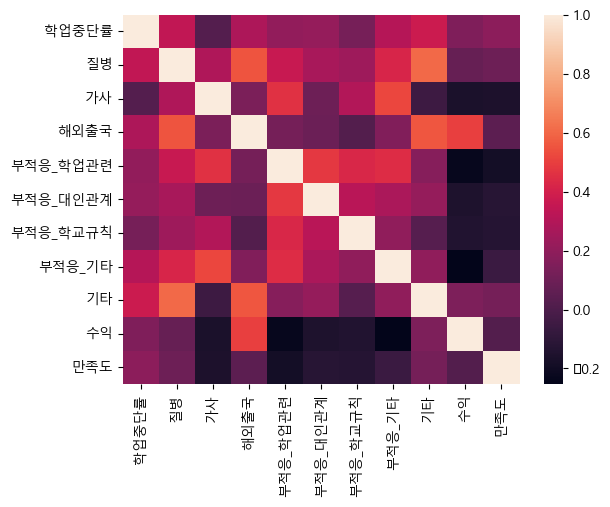

In [1278]:
sns.heatmap(df_numeric_cleaning.corr(numeric_only=True))

### 개별 컬럼의 이상치 확인.

<Axes: title={'center': 'Feature-correlation (pearson)'}>

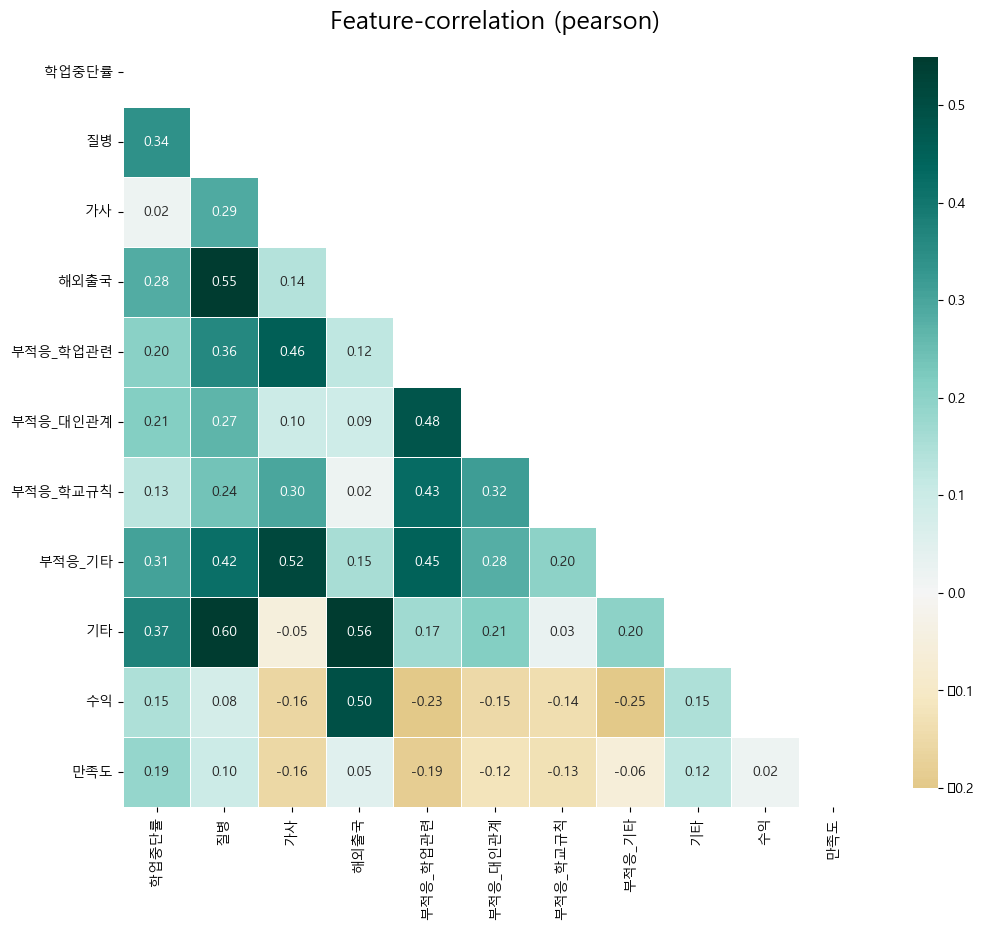

In [1279]:
klib.corr_plot(df_numeric_cleaning)

<Axes: xlabel='연도', ylabel='학업중단률'>

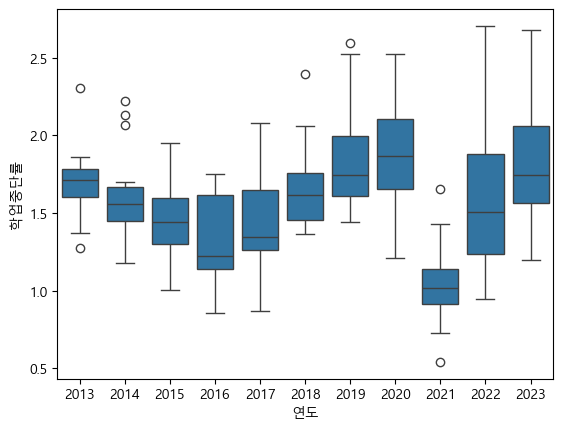

In [1280]:
sns.boxplot(x='연도', y='학업중단률', data=df_hs)

<Axes: xlabel='행정구역', ylabel='학업중단률'>

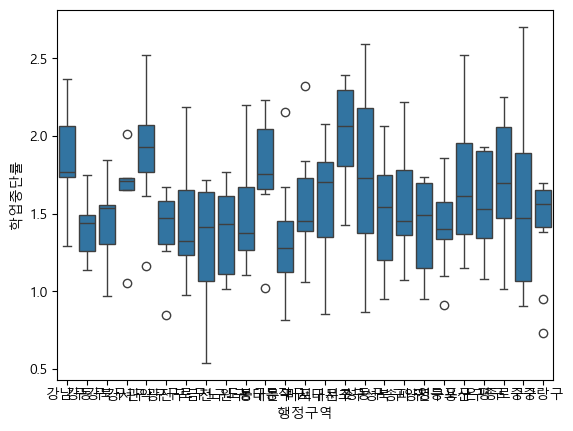

In [1281]:
sns.boxplot(x='행정구역', y='학업중단률', data=df_hs)

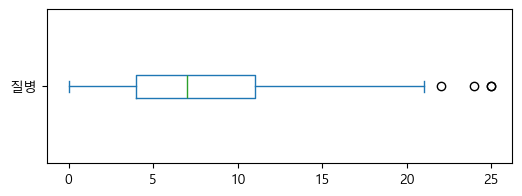

In [1282]:
df_numeric_cleaning['질병'].plot(kind='box', vert=False, figsize=(6, 2)); # ''을 붙이면 출력값이 사라짐

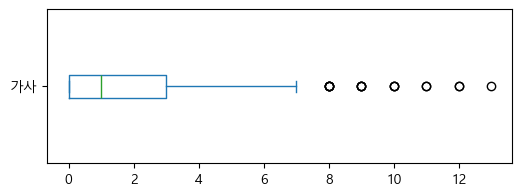

In [1283]:
df_numeric_cleaning['가사'].plot(kind='box', vert=False, figsize=(6, 2)); # ''을 붙이면 출력값이 사라짐

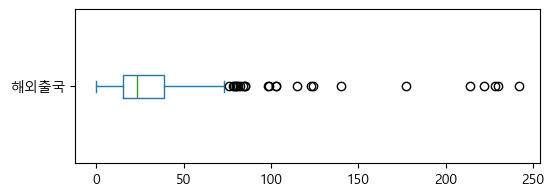

In [1284]:
df_numeric_cleaning['해외출국'].plot(kind='box', vert=False, figsize=(6, 2)); 

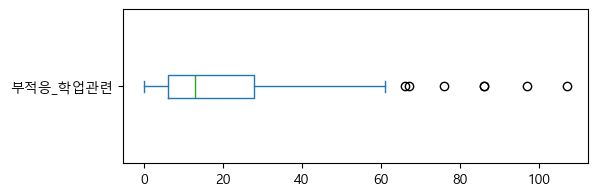

In [1285]:
df_numeric_cleaning['부적응_학업관련'].plot(kind='box', vert=False, figsize=(6, 2)); # ''을 붙이면 출력값이 사라짐

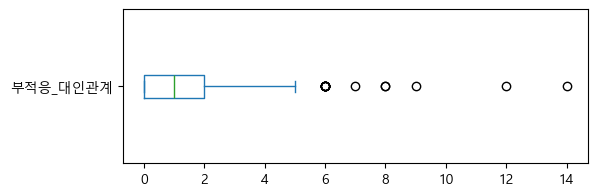

In [1286]:
df_numeric_cleaning['부적응_대인관계'].plot(kind='box', vert=False, figsize=(6, 2)); # ''을 붙이면 출력값이 사라짐

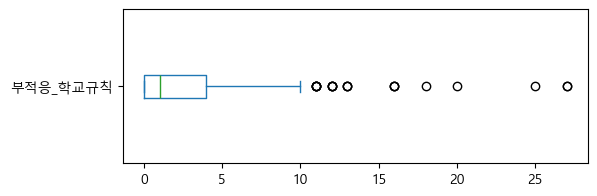

In [1287]:
df_numeric_cleaning['부적응_학교규칙'].plot(kind='box', vert=False, figsize=(6, 2)); # ''을 붙이면 출력값이 사라짐

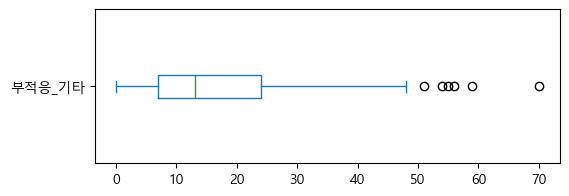

In [1288]:
df_numeric_cleaning['부적응_기타'].plot(kind='box', vert=False, figsize=(6, 2)); # ''을 붙이면 출력값이 사라짐

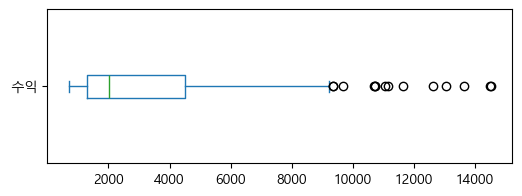

In [1289]:
df_numeric_cleaning['수익'].plot(kind='box', vert=False, figsize=(6, 2)); # ''을 붙이면 출력값이 사라짐

### 전처리

In [1290]:
# '수익' 컬럼에 대해 log 변환 수행 (log1p 사용)
df_numeric_cleaning['수익_log'] = np.log1p(df_numeric_cleaning['수익'])


In [1291]:
# 데이터 복사
df_final = df_numeric_cleaning.copy()

df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 245 entries, 2 to 285
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   학업중단률     245 non-null    float64
 1   질병        245 non-null    int64  
 2   가사        245 non-null    int64  
 3   해외출국      245 non-null    int64  
 4   부적응_학업관련  245 non-null    int64  
 5   부적응_대인관계  245 non-null    int64  
 6   부적응_학교규칙  245 non-null    int64  
 7   부적응_기타    245 non-null    int64  
 8   기타        245 non-null    int64  
 9   수익        245 non-null    float64
 10  만족도       245 non-null    float64
 11  수익_log    245 non-null    float64
dtypes: float64(4), int64(8)
memory usage: 33.0 KB


In [1292]:
# 중앙값 빈도 디노이징
for col in ['질병', '가사', '해외출국','부적응_학업관련','부적응_대인관계','부적응_학교규칙','부적응_기타','기타','수익_log','만족도']:
    # Create fixed bins using pd.cut
    df_final[f'{col}_bin'] = pd.cut(df_final[col], bins=8)
    # Replace values with bin medians
    medians = df_final.groupby(f'{col}_bin')[col].transform('median')
    df_final[col] = medians


C:\Users\rlaeh\AppData\Local\Temp\ipykernel_14332\4005488663.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  medians = df_final.groupby(f'{col}_bin')[col].transform('median')
C:\Users\rlaeh\AppData\Local\Temp\ipykernel_14332\4005488663.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  medians = df_final.groupby(f'{col}_bin')[col].transform('median')
C:\Users\rlaeh\AppData\Local\Temp\ipykernel_14332\4005488663.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt 

In [1293]:
from sklearn.preprocessing import RobustScaler
# 수치형 컬럼
numerical_columns = ['질병', '가사', '해외출국','부적응_학업관련','부적응_대인관계','부적응_학교규칙','부적응_기타','기타','수익_log','만족도']

scaler = RobustScaler()
df_standard = pd.DataFrame(
    scaler.fit_transform(df_final[numerical_columns]),
    columns=numerical_columns
)

In [1294]:
# 범주형 변수 인코딩
from sklearn.preprocessing import OneHotEncoder

categorical_columns = ['연도', '행정구역']
encoder = OneHotEncoder(sparse_output=False) 
encoded_categorical = pd.DataFrame(
    encoder.fit_transform(df_hs[categorical_columns]),
    columns=encoder.get_feature_names_out(categorical_columns)
)

encoded_categorical.head()

연도_2013  연도_2014  연도_2015  연도_2016  연도_2017  연도_2018  연도_2019  연도_2020  \
0      0.0      0.0      1.0      0.0      0.0      0.0      0.0      0.0   
1      0.0      0.0      0.0      1.0      0.0      0.0      0.0      0.0   
2      0.0      0.0      0.0      0.0      1.0      0.0      0.0      0.0   
3      0.0      0.0      0.0      0.0      0.0      1.0      0.0      0.0   
4      0.0      0.0      0.0      0.0      0.0      0.0      1.0      0.0   

   연도_2021  연도_2022  연도_2023  행정구역_강남구  행정구역_강동구  행정구역_강북구  행정구역_강서구  \
0      0.0      0.0      0.0       1.0       0.0       0.0       0.0   
1      0.0      0.0      0.0       1.0       0.0       0.0       0.0   
2      0.0      0.0      0.0       1.0       0.0       0.0       0.0   
3      0.0      0.0      0.0       1.0       0.0       0.0       0.0   
4      0.0      0.0      0.0       1.0       0.0       0.0       0.0   

   행정구역_관악구  행정구역_광진구  행정구역_구로구  행정구역_금천구  행정구역_노원구  행정구역_도봉구  행정구역_동대문구  \
0       0.0       0.0       0.0       0.0       0.0       0.0        0.0   
1       0.0       0.0       0.0       0.0       0.0       0.0        0.0   
2       0.0       0.0       0.0       0.0       0.0       0.0        0.0   
3       0.0       0.0       0.0       0.0       0.0       0.0        0.0   
4       0.0       0.0       0.0       0.0       0.0       0.0        0.0   

   행정구역_동작구  행정구역_마포구  행정구역_서대문구  행정구역_서초구  행정구역_성동구  행정구역_성북구  행정구역_송파구  \
0       0.0       0.0        0.0       0.0       0.0       0.0       0.0   
1       0.0       0.0        0.0       0.0       0.0       0.0       0.0   
2       0.0       0.0        0.0       0.0       0.0       0.0       0.0   
3       0.0       0.0        0.0       0.0       0.0       0.0       0.0   
4       0.0       0.0        0.0       0.0       0.0       0.0       0.0   

   행정구역_양천구  행정구역_영등포구  행정구역_용산구  행정구역_은평구  행정구역_종로구  행정구역_중구  행정구역_중랑구  
0       0.0        0.0       0.0       0.0       0.0      0.0       0.0  
1       0.0        0.0       0.0       0.0       0.0      0.0       0.0  
2       0.0        0.0       0.0       0.0       0.0      0.0       0.0  
3       0.0        0.0       0.0       0.0       0.0      0.0       0.0  
4       0.0        0.0       0.0       0.0       0.0      0.0       0.0

In [1295]:
# 종속 변수 준비
df_target = df_final[['학업중단률']].reset_index(drop=True)

In [1296]:
print("df_standard shape:", df_standard.shape)
print("encoded_categorical shape:", encoded_categorical.shape)
print("df_target shape:", df_target.shape)

df_standard.reset_index(drop=True, inplace=True)
encoded_categorical.reset_index(drop=True, inplace=True)
df_target.reset_index(drop=True, inplace=True)

df_standard shape: (245, 10)
encoded_categorical shape: (245, 36)
df_target shape: (245, 1)


In [1297]:
# 데이터 프레임 결합.

df_combined = pd.concat(
    [df_standard, df_target, encoded_categorical], axis=1
)

print("df_combined shape:", df_combined.shape)

df_combined shape: (245, 47)


In [1298]:
# 7. 최종 데이터프레임 정보 출력
print(df_combined.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 47 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   질병         245 non-null    float64
 1   가사         245 non-null    float64
 2   해외출국       245 non-null    float64
 3   부적응_학업관련   245 non-null    float64
 4   부적응_대인관계   245 non-null    float64
 5   부적응_학교규칙   245 non-null    float64
 6   부적응_기타     245 non-null    float64
 7   기타         245 non-null    float64
 8   수익_log     245 non-null    float64
 9   만족도        245 non-null    float64
 10  학업중단률      245 non-null    float64
 11  연도_2013    245 non-null    float64
 12  연도_2014    245 non-null    float64
 13  연도_2015    245 non-null    float64
 14  연도_2016    245 non-null    float64
 15  연도_2017    245 non-null    float64
 16  연도_2018    245 non-null    float64
 17  연도_2019    245 non-null    float64
 18  연도_2020    245 non-null    float64
 19  연도_2021    245 non-null    float64
 20  연도_2022   

Text(0.5, 1.0, 'Robust Scaled')

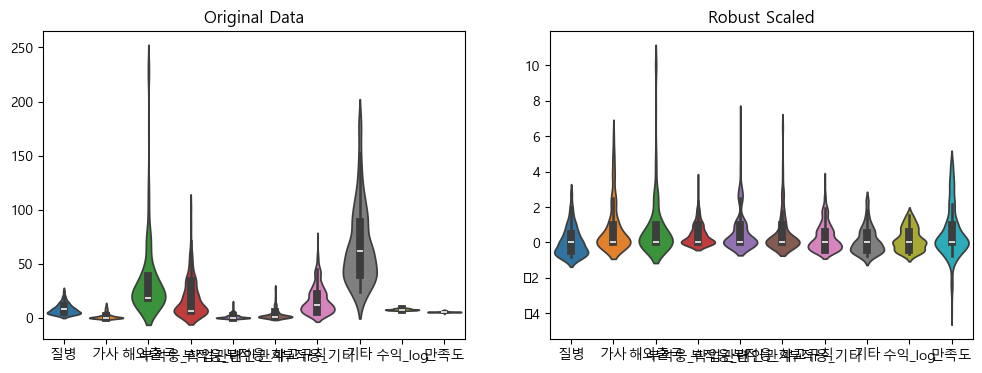

In [1299]:
# 표준화
# 시각화
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
# 원본 데이터 셋
sns.violinplot(data=df_final[['질병', '가사', '해외출국','부적응_학업관련','부적응_대인관계','부적응_학교규칙','부적응_기타','기타','수익_log','만족도']], ax=axes[0])
axes[0].set_title('Original Data')

# 로버스트 스케일링 후 
sns.violinplot(data=df_standard, ax=axes[1])
axes[1].set_title('Robust Scaled')

In [1300]:
# 결과 데이터 저장
df_combined.to_excel('standard/encoder_combined.xlsx', index=False)

In [1301]:
# 디코딩
# OneHotEncoder 객체를 사용해 원본 범주형 데이터 복원
decoded_categorical = pd.DataFrame(
    encoder.inverse_transform(encoded_categorical),
    columns=categorical_columns
)

In [1302]:
# 기존 데이터프레임에서 범주형 인코딩된 열을 제거하고 디코딩된 열 추가
df_decoded = df_combined.drop(columns=encoded_categorical.columns, axis=1)
df_decoded = pd.concat([df_decoded, decoded_categorical], axis=1)

In [1303]:
# Step 3: 데이터 저장
df_decoded.to_excel("standard/decoder_combined.xlsx", index=False)

In [1304]:
df_decoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   질병        245 non-null    float64
 1   가사        245 non-null    float64
 2   해외출국      245 non-null    float64
 3   부적응_학업관련  245 non-null    float64
 4   부적응_대인관계  245 non-null    float64
 5   부적응_학교규칙  245 non-null    float64
 6   부적응_기타    245 non-null    float64
 7   기타        245 non-null    float64
 8   수익_log    245 non-null    float64
 9   만족도       245 non-null    float64
 10  학업중단률     245 non-null    float64
 11  연도        245 non-null    object 
 12  행정구역      245 non-null    object 
dtypes: float64(11), object(2)
memory usage: 25.0+ KB


In [1305]:
# 범주형 데이터 범주형 컬럼으로 속성 변경
df_decoded['연도'] = df_decoded['연도'].astype('category')
df_decoded['행정구역'] = df_decoded['행정구역'].astype('category')

In [1306]:
# import pandas as pd
# from sklearn.decomposition import PCA

# # PCA 수행
# pca = PCA(n_components=0.95)  # 95% 설명력
# pca_result = pca.fit_transform(df_combined[['질병', '가사', '해외출국','부적응_학업관련','부적응_대인관계','부적응_학교규칙','부적응_기타','기타']])

# # PCA 결과를 데이터프레임으로 변환 (PC1, PC2, ...)
# pca_columns = [f'PC{i+1}' for i in range(pca_result.shape[1])]
# df_pca = pd.DataFrame(pca_result, columns=pca_columns)

# # 주성분 계수 (loadings) 출력
# pca_loadings = pd.DataFrame(pca.components_, columns=['질병', '가사', '해외출국','부적응_학업관련','부적응_대인관계','부적응_학교규칙','부적응_기타','기타'], index=pca_columns)

# # PCA 설명된 분산 비율 출력
# print("Explained Variance Ratio:", pca.explained_variance_ratio_)

# # 주성분 계수 (loadings) 출력
# print("PCA Component Loadings:")
# print(pca_loadings)

# # 최종 데이터프레임에 학업중단률 결합
# df_pca = pd.concat([df_pca, df_combined[['학업중단률']].reset_index(drop=True)], axis=1)

# # 최종 데이터프레임 결합 (기타 변수 포함)
# df_combined_final = pd.concat(
#     [df_pca, df_combined.drop(columns=['질병', '가사', '해외출국','부적응_학업관련','부적응_대인관계','부적응_학교규칙','부적응_기타','기타', '학업중단률'])],
#     axis=1
# )

# # 확인
# print(df_combined_final.info())


In [1307]:
# # 최종 결합
# # 753개의 행 남음
# df_decoded_cleaned = df_decoded.iloc[df_combined_final.index].reset_index(drop=True)

# # PCA 데이터와 디코딩된 범주형 데이터를 축 합치기
# df_final_decoded = pd.concat([df_combined_final, df_decoded_cleaned[['연도', '행정구역']]], axis=1)

# # 최종 데이터 확인
# print(df_final_decoded.info())

# # 저장
# df_final_decoded.to_excel("assignment_3_final_with_price_and_decoded.xlsx", index=False)

### 회귀분석

In [1308]:
df_cleaned_filter = df_decoded.copy()
df_cleaned_filter.head()

질병   가사  해외출국  부적응_학업관련  부적응_대인관계  부적응_학교규칙    부적응_기타        기타   수익_log  \
0  2.75  1.0  10.0       1.0       0.0       0.0  0.588235  0.959184  1.55553   
1  2.00  2.5  10.0       0.0       0.0       0.0  0.588235  1.408163  1.55553   
2  2.75  1.0  10.0       0.0       0.0       0.0  0.000000  1.408163  1.55553   
3  0.00  0.0  10.0       0.5       0.0       0.0 -0.411765  1.408163  1.55553   
4  1.50  0.0  10.0       0.0       0.0       0.0  0.588235  2.367347  1.55553   

        만족도     학업중단률    연도 행정구역  
0  1.000000  1.758600  2015  강남구  
1  0.000000  1.672503  2016  강남구  
2  1.000000  1.772449  2017  강남구  
3  1.000000  2.004389  2018  강남구  
4  2.188908  2.365777  2019  강남구

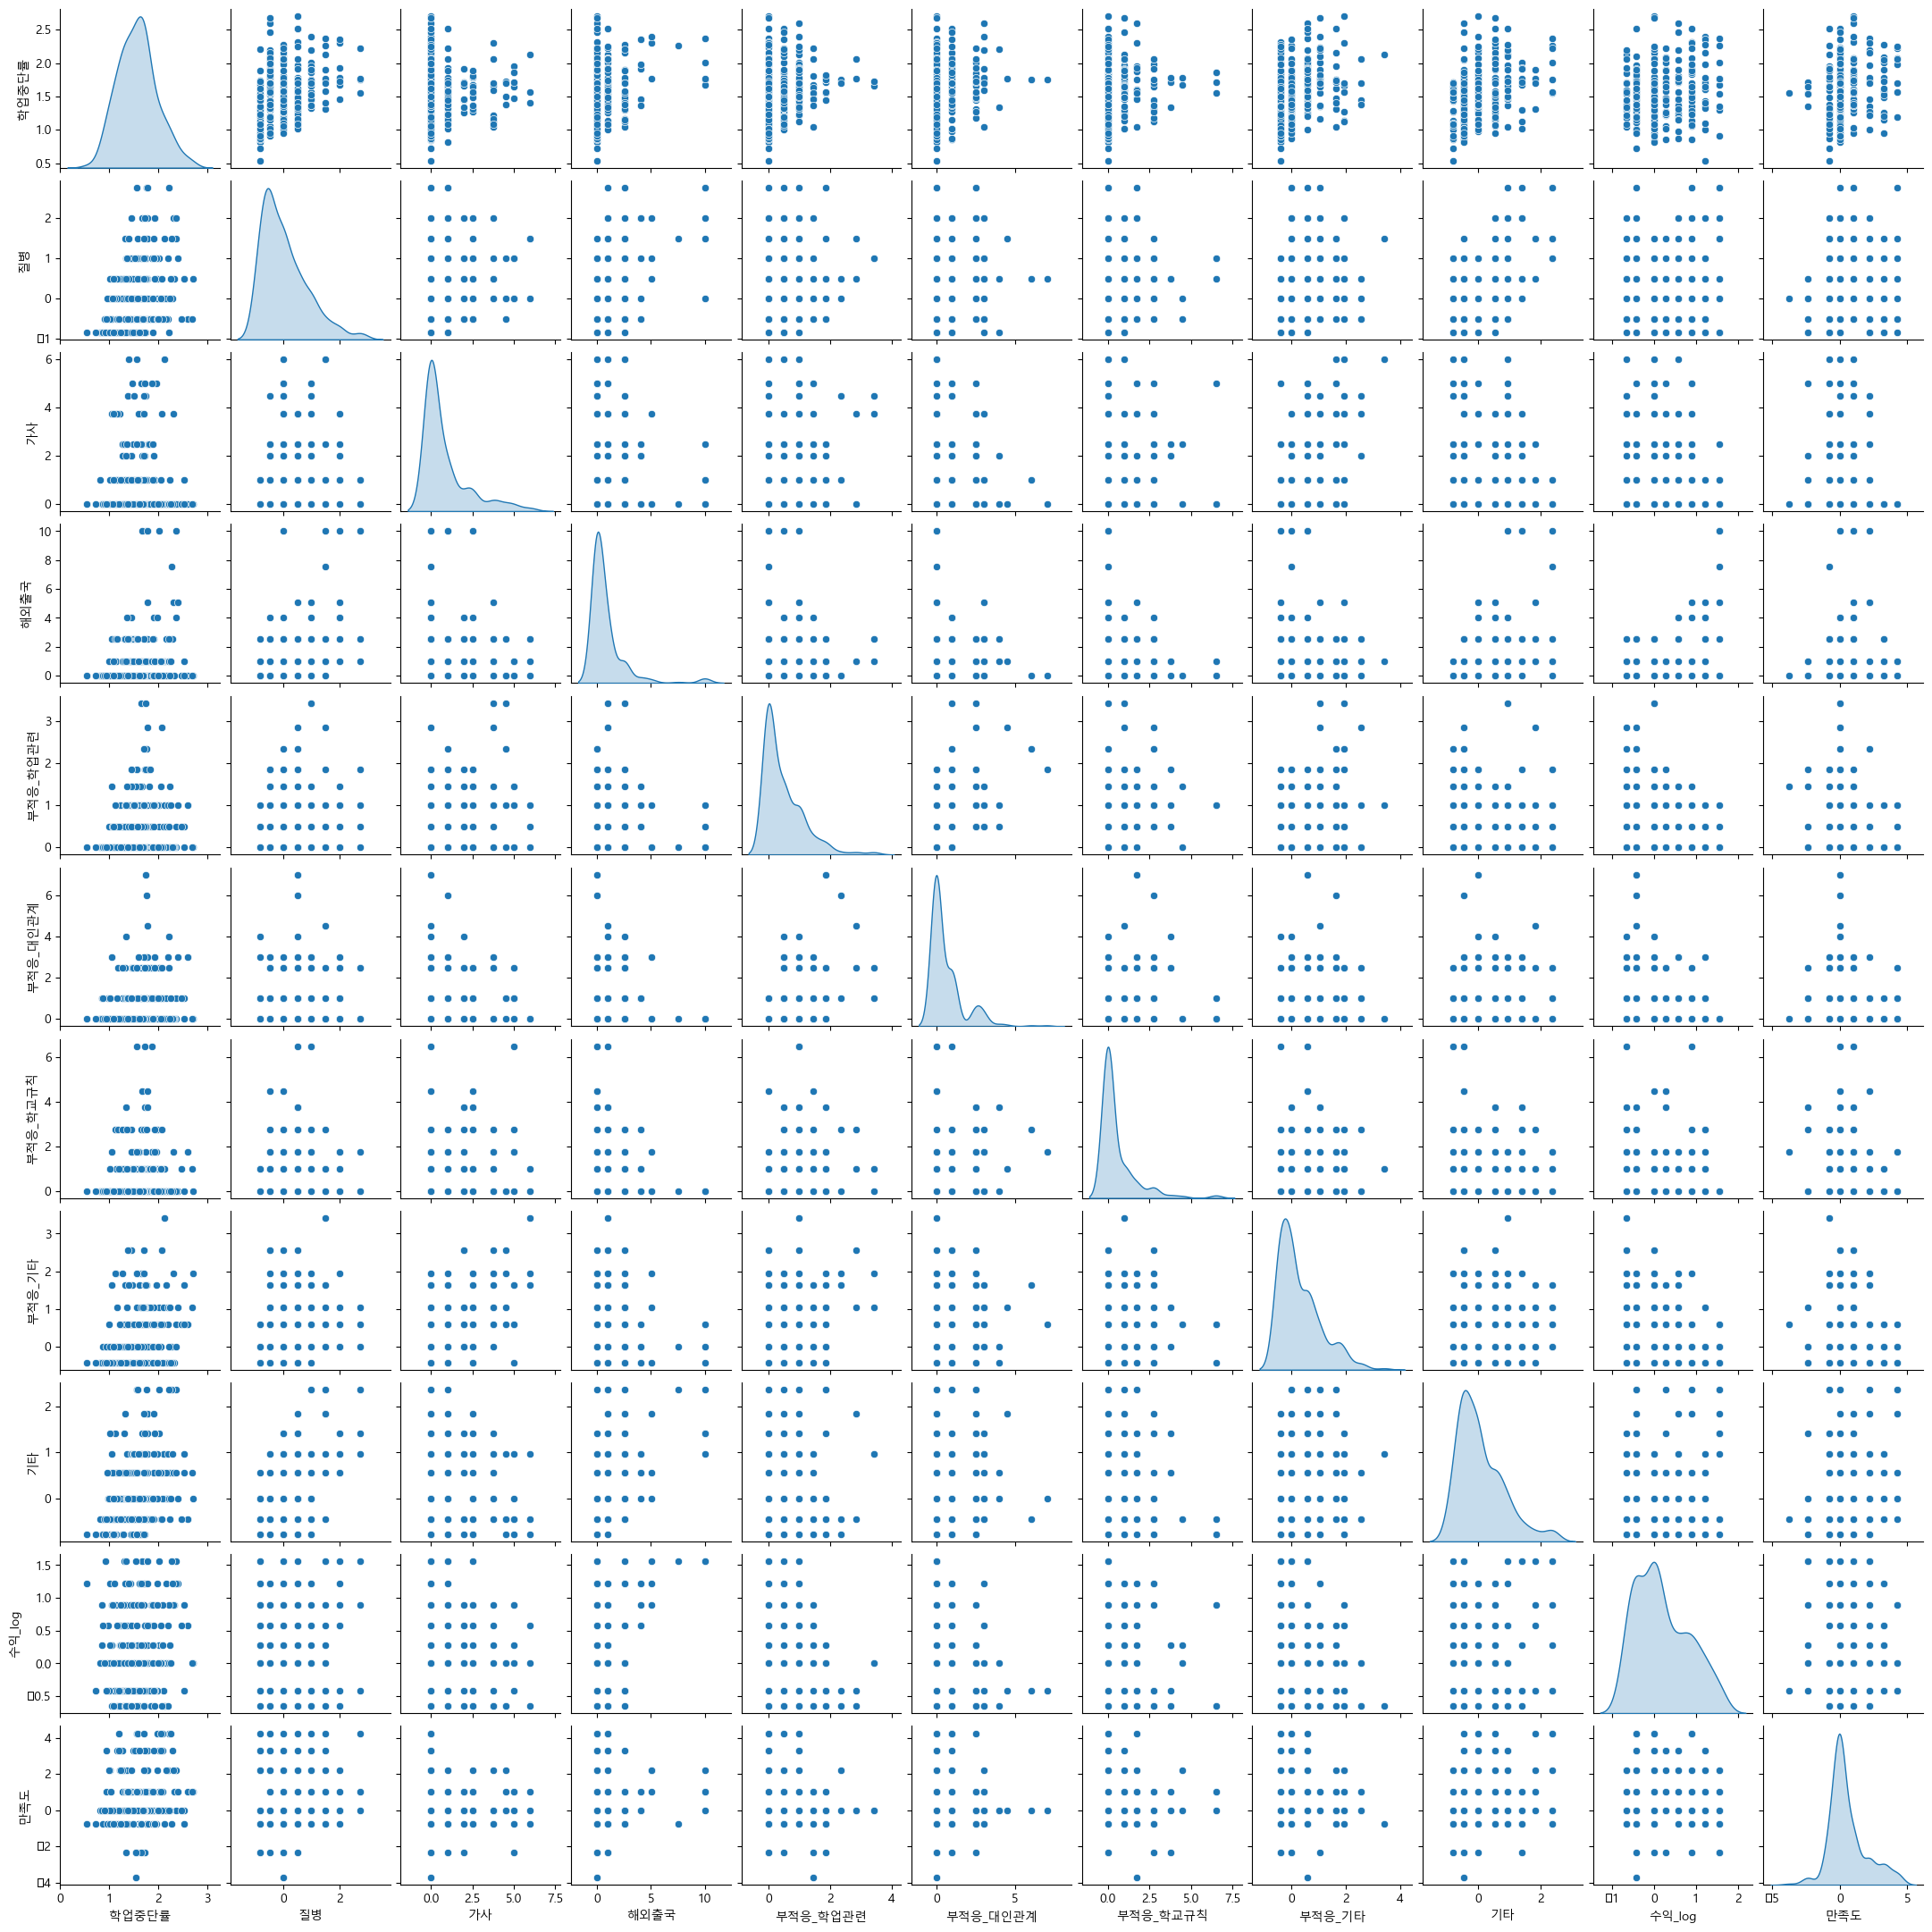

In [1309]:
# 그래프로 확인하기.
sns.pairplot(df_cleaned_filter[['학업중단률','질병', '가사', '해외출국','부적응_학업관련','부적응_대인관계','부적응_학교규칙','부적응_기타','기타','수익_log','만족도']], diag_kind='kde', height=2)

In [1310]:
# 회귀 분석 실시
import statsmodels.formula.api as smf

# 회귀 모델 ( 가장 처음 )
lm = smf.ols(formula='학업중단률 ~ 질병 + 가사 + 해외출국 + 부적응_학업관련 + 부적응_대인관계 + 부적응_학교규칙 + 부적응_기타 + 연도 + 기타 + 행정구역 + 수익_log + 만족도', data=df_cleaned_filter).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  학업중단률   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     23.03
Date:                Sat, 07 Dec 2024   Prob (F-statistic):           2.05e-57
Time:                        02:16:49   Log-Likelihood:                 101.23
No. Observations:                 245   AIC:                            -112.5
Df Residuals:                     200   BIC:                             45.10
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.9740      0.250      3.898   

In [1311]:
# 범주형 컬럼인 행정구역과 학업중단률의 피어슨 상관관계 분석. 및 분산분석

import pandas as pd
from scipy import stats
from scipy.stats import pearsonr
import pandas as pd
from scipy.stats import pearsonr

# One-Hot Encoding을 사용하여 '행정구역'을 수치형 변수로 변환
df_encoded = pd.get_dummies(df_cleaned_filter['행정구역'], prefix='구')

# 원본 데이터프레임에 One-Hot Encoding된 열을 합침
df_encoded = pd.concat([df_cleaned_filter, df_encoded], axis=1)

# 피어슨 상관계수 계산 함수
def calculate_correlation(df, variable):
    print("=== 상관관계 분석 결과 ===")
    # 학업중단률과 각 행정구역 변수 간의 상관계수를 계산
    for column in df.columns:
        if column.startswith('구_'):  # '구_'로 시작하는 열이 행정구역에 해당
            corr, _ = pearsonr(df['학업중단률'], df[column])
            print(f"{column}과(와) 학업중단률의 상관계수: {corr}")
    print()

# 상관관계 분석 실행
calculate_correlation(df_encoded, '학업중단률')





# ANOVA 분석 (행정구역별 학업중단률 평균 차이 분석)
def perform_anova(df):
    # 각 행정구역별로 학업중단률을 그룹화
    grouped = [df[df['행정구역'] == region]['학업중단률'] for region in df['행정구역'].unique()]
    
    # ANOVA 분석
    f_statistic, p_value = stats.f_oneway(*grouped)
    
    # 결과 출력
    print("=== ANOVA 분석 결과 ===")
    print(f"F-statistic: {f_statistic}")
    print(f"P-value: {p_value}")
    
    # p-value 해석
    if p_value < 0.05:
        print("통계적으로 유의미한 차이가 있습니다.")
    else:
        print("유의미한 차이가 없습니다.")
    print()

# ANOVA 분석
perform_anova(df_cleaned_filter)



=== 상관관계 분석 결과 ===
구_강남구과(와) 학업중단률의 상관계수: 0.1369920960377919
구_강동구과(와) 학업중단률의 상관계수: -0.08050066889643805
구_강북구과(와) 학업중단률의 상관계수: -0.0662006366730522
구_강서구과(와) 학업중단률의 상관계수: 0.023841525781864728
구_관악구과(와) 학업중단률의 상관계수: 0.16846576438352484
구_광진구과(와) 학업중단률의 상관계수: -0.08002764902730396
구_구로구과(와) 학업중단률의 상관계수: -0.06680271186072223
구_금천구과(와) 학업중단률의 상관계수: -0.1311956551503898
구_노원구과(와) 학업중단률의 상관계수: -0.08067562142053644
구_도봉구과(와) 학업중단률의 상관계수: -0.04241526770996444
구_동대문구과(와) 학업중단률의 상관계수: 0.118629957064256
구_동작구과(와) 학업중단률의 상관계수: -0.13100468073371552
구_마포구과(와) 학업중단률의 상관계수: -0.006066536170805811
구_서대문구과(와) 학업중단률의 상관계수: 0.013251161087516143
구_서초구과(와) 학업중단률의 상관계수: 0.24059250851837405
구_성동구과(와) 학업중단률의 상관계수: 0.10989824969795674
구_성북구과(와) 학업중단률의 상관계수: -0.036536700966896804
구_송파구과(와) 학업중단률의 상관계수: -0.00019209193256565504
구_양천구과(와) 학업중단률의 상관계수: -0.08563507127825871
구_영등포구과(와) 학업중단률의 상관계수: -0.08308872219399599
구_용산구과(와) 학업중단률의 상관계수: 0.06610483316225114
구_은평구과(와) 학업중단률의 상관계수: -0.014485545420447492
구_종로구과(와) 학업중단률

In [1312]:
# 회귀 분석 실시
import statsmodels.api as sm
import statsmodels.formula.api as smf

# 회귀 모델
lm = smf.ols(formula='학업중단률 ~ 질병+가사+해외출국  + 부적응_학업관련 + 부적응_대인관계 + 부적응_학교규칙 + 부적응_기타 +연도 + 기타 + 수익_log + 만족도 + 행정구역', data=df_cleaned_filter).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  학업중단률   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     23.03
Date:                Sat, 07 Dec 2024   Prob (F-statistic):           2.05e-57
Time:                        02:16:49   Log-Likelihood:                 101.23
No. Observations:                 245   AIC:                            -112.5
Df Residuals:                     200   BIC:                             45.10
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.9740      0.250      3.898   

#### 다변량 이상치 분석

<class 'pandas.core.frame.DataFrame'>
Index: 245 entries, 0 to 244
Data columns (total 51 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   dfb_Intercept     245 non-null    float64
 1   dfb_연도[T.2014]    245 non-null    float64
 2   dfb_연도[T.2015]    245 non-null    float64
 3   dfb_연도[T.2016]    245 non-null    float64
 4   dfb_연도[T.2017]    245 non-null    float64
 5   dfb_연도[T.2018]    245 non-null    float64
 6   dfb_연도[T.2019]    245 non-null    float64
 7   dfb_연도[T.2020]    245 non-null    float64
 8   dfb_연도[T.2021]    245 non-null    float64
 9   dfb_연도[T.2022]    245 non-null    float64
 10  dfb_연도[T.2023]    245 non-null    float64
 11  dfb_행정구역[T.강동구]   245 non-null    float64
 12  dfb_행정구역[T.강북구]   245 non-null    float64
 13  dfb_행정구역[T.강서구]   245 non-null    float64
 14  dfb_행정구역[T.관악구]   245 non-null    float64
 15  dfb_행정구역[T.광진구]   245 non-null    float64
 16  dfb_행정구역[T.구로구]   245 non-null    float64
 17  df

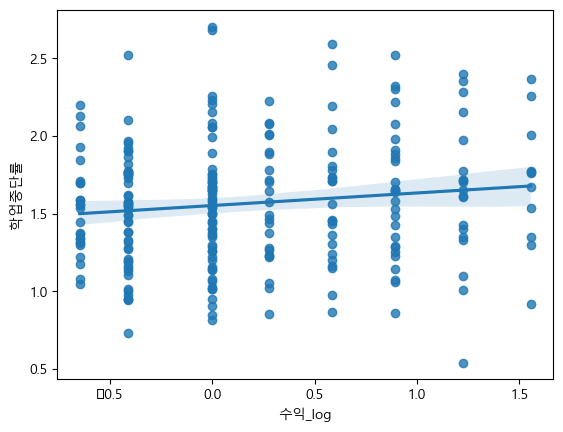

In [1313]:
# PC1 - price_log
# 산점도를 통해 확인
sns.regplot(data=df_cleaned_filter, x='수익_log', y='학업중단률')

# 영향점(influence point) 계산
import numpy as np
infl = lm.get_influence()

# 결과 확인
df_cleaned_droped_df = infl.summary_frame()
df_cleaned_droped_df.info()


In [1314]:
# 독립변수 관점의 이상치
# 레버리지 계산
leverage = infl.hat_matrix_diag
print('Leverage: \n', leverage)
outliers = np.where(leverage > 2*np.mean(leverage))
print('Outliers using Leverage: \n', df_cleaned_filter.iloc[outliers])

Leverage: 
 [0.23272005 0.19988054 0.21487313 0.24670614 0.23432678 0.18236323
 0.41336589 0.24308305 0.19664808 0.19107435 0.16230254 0.17050179
 0.18166702 0.17010377 0.18304107 0.16364047 0.18416882 0.31975513
 0.27451006 0.18167203 0.16186882 0.14806907 0.16899896 0.18506324
 0.14569512 0.14404228 0.15459144 0.15789674 0.27647293 0.33172582
 0.28964528 0.2940669  0.32341532 0.22071269 0.2283508  0.17258576
 0.2073883  0.1649378  0.14948133 0.1522557  0.17250458 0.15807672
 0.15686938 0.21224037 0.18416034 0.15496245 0.16730769 0.15165409
 0.14366501 0.14296284 0.1439956  0.14194631 0.15315248 0.1820823
 0.1714517  0.16870267 0.18539137 0.16144796 0.17510312 0.19159017
 0.15439806 0.14940826 0.16261759 0.23543812 0.16534397 0.1613146
 0.16165634 0.15367416 0.16214364 0.15232278 0.14941466 0.150731
 0.15466076 0.24622393 0.22517905 0.18597174 0.22041101 0.19579246
 0.23542341 0.18575703 0.20160833 0.2467854  0.20730881 0.15655688
 0.15671543 0.14908659 0.14713329 0.19749285 0.1616589

In [1315]:
# 표준화 잔차 계산
resid_standard = lm.resid_pearson
print('Standardized Residuals: \n', resid_standard)
outliers = np.where(np.abs(resid_standard) > 2)
print('Outliers using Standardized Residuals: \n', df_cleaned_filter.iloc[outliers])

Standardized Residuals: 
 [-0.11313062 -0.10559009  0.09463334  1.16387619 -0.67693524 -0.29181788
  0.12376607 -0.19480178 -0.15227287 -0.02178905  0.02947549  0.09157822
  0.04743546 -0.60183553  0.72577762  0.14265263 -0.26102198  0.19959558
  0.44328797  1.15660363  0.13242325  0.47545621  1.24698343 -0.17963432
 -0.72075175 -0.69766073 -1.19663171 -0.85967156 -1.3287569  -0.04070805
 -0.14929866 -0.88205754  2.40082115 -1.10164233  0.04627049  0.26216219
 -0.08442755 -0.0656605   1.41563639 -0.17564569  0.72829029 -0.47417296
 -0.55081033 -0.49377293  0.0786483   0.709974    0.7381936   1.53155072
  0.58944034  0.09237461 -0.7415068  -0.95407769 -1.55082416 -0.71022367
  0.73886756  0.72150246 -0.41253621 -0.31191872 -0.3557245   1.0053869
  0.08465905 -0.39873891 -0.36127395  1.68941096  0.8951519  -1.29809994
 -0.11109716  0.55727258  0.44652416  0.97316287 -2.32972096 -1.44329222
  0.62068781  0.33911068  0.28248328 -0.31761859 -1.4766806  -1.02176535
 -0.645808    2.42988083  

In [1316]:
# 스튜던트 잔차 계산
resid_student = infl.resid_studentized_internal
print('Studentized Residuals: \n', resid_student)
outliers = np.where(np.abs(resid_student) > 3)
print('Outliers using Studentized Residuals: \n', df_cleaned_filter.iloc[outliers])

Studentized Residuals: 
 [-0.12915263 -0.1180445   0.10680074  1.34098701 -0.77361591 -0.32272432
  0.16159129 -0.22390759 -0.1698907  -0.02422612  0.03220457  0.10055056
  0.05243703 -0.66064162  0.80297765  0.15598516 -0.28898608  0.24200163
  0.5204395   1.27855923  0.1446466   0.5151199   1.36791747 -0.19898822
 -0.77979287 -0.75408122 -1.3014491  -0.93680648 -1.56213347 -0.04979698
 -0.17714066 -1.04982074  2.9187623  -1.24793457  0.05267374  0.28820968
 -0.09483179 -0.07185298  1.53500499 -0.1907678   0.80061132 -0.51677385
 -0.59986655 -0.55632736  0.08707368  0.77233274  0.80896177  1.6628187
  0.63696858  0.09978214 -0.80145131 -1.02997458 -1.68523298 -0.78530858
  0.81172269  0.79133364 -0.45707511 -0.34062493 -0.39166426  1.11819469
  0.09206412 -0.43234261 -0.39479781  1.93209727  0.97981249 -1.41745275
 -0.12133662  0.6057576   0.48782064  1.05698853 -2.52606756 -1.56614379
  0.67508382  0.39058926  0.32091652 -0.35203526 -1.67245223 -1.13937608
 -0.73857214  2.69282399  0

In [1317]:
# 스튜턴트 제외 잔차 계산
resid_student_remove = infl.resid_studentized_external
print('Studentized Deleted Residuals: \n', resid_student_remove)
outliers = np.where(np.abs(resid_student_remove) > 3)
print('Outliers using Studentized Deleted Residuals: \n', df_cleaned_filter.iloc[outliers])

Studentized Deleted Residuals: 
 [-0.12883471 -0.11775312  0.10653644  1.34368467 -0.77283663 -0.32200035
  0.16119733 -0.22337511 -0.16947767 -0.02416552  0.03212404  0.1003014
  0.05230613 -0.65970816  0.80226193  0.15560417 -0.28832291  0.24143122
  0.51948866  1.28060311  0.14429208  0.51417169  1.37092163 -0.19850978
 -0.77902612 -0.75326525 -1.30372366 -0.93651852 -1.56781731 -0.04967264
 -0.17671112 -1.05009022  2.97551826 -1.24968579  0.05254225  0.28754797
 -0.09459654 -0.07167405  1.54026262 -0.1903076   0.79989009 -0.51582479
 -0.59890402 -0.55536467  0.08685737  0.77155091  0.80826027  1.67024203
  0.63601962  0.09953485 -0.80073203 -1.03013208 -1.6930785  -0.78455338
  0.81102789  0.79059148 -0.45616931 -0.33987089 -0.39083379  1.11889875
  0.09183561 -0.43146207 -0.39396312  1.9455029   0.97971411 -1.42106058
 -0.12103736  0.60479638  0.48688931  1.05729999 -2.56092897 -1.57189213
  0.67416254  0.38976025  0.32019568 -0.35126292 -1.68005541 -1.14023065
 -0.73773014  2.736

In [1318]:
# Cook's distance 계산
(cooks, p) = infl.cooks_distance
print('Cook\'s Distance: \n', cooks)
outliers = np.where(np.abs(cooks) > 1)
print('Outliers using Cook\'s Distance: \n', df_cleaned_filter.iloc[outliers])

Cook's Distance: 
 [1.12427858e-04 7.73561172e-05 6.93710541e-05 1.30873630e-02
 4.07020934e-03 5.16211587e-04 4.08875148e-04 3.57792748e-04
 1.57003950e-04 3.08069750e-06 4.46540259e-06 4.61817051e-05
 1.35646855e-05 1.98796841e-03 3.21027852e-03 1.05791737e-04
 4.18945142e-04 6.11753293e-04 2.27748156e-03 8.06473033e-03
 8.97956216e-05 1.02485899e-03 8.45648203e-03 1.99819779e-04
 2.30450748e-03 2.12648059e-03 6.88272888e-03 3.65674847e-03
 2.07215189e-02 2.73538221e-05 2.84325101e-04 1.02023539e-02
 9.04947464e-02 9.80168686e-03 1.82456086e-05 3.85022914e-04
 5.22900602e-05 2.26609655e-05 9.20259190e-03 1.45246714e-04
 2.96938133e-03 1.11425332e-03 1.48778479e-03 1.85303060e-03
 3.80323027e-05 2.43078658e-03 2.92196385e-03 1.09839476e-02
 1.51262342e-03 3.69076683e-05 2.40112631e-03 3.89987013e-03
 1.14136933e-02 3.05088816e-03 3.02988976e-03 2.82404961e-03
 1.05658186e-03 4.96412706e-04 7.23618404e-04 6.58512423e-03
 3.43909487e-05 7.29620475e-04 6.72636809e-04 2.55452174e-02
 4.22

In [1319]:
# DFBETAS 계산
dfbetas = infl.dfbetas
print('DFBETASn', dfbetas)
outliers = np.where(dfbetas.max(axis=1) > 1)
print('Outliers using DFBETASn', df_cleaned_filter.iloc[outliers])

DFBETASn [[ 4.45690750e-03 -5.64689989e-04 -1.33999873e-02 ...  1.79919959e-02
  -9.78107968e-03  5.88386984e-05]
 [ 3.52196584e-03 -3.61427410e-04 -1.27788458e-03 ...  2.09846507e-03
  -4.36171165e-03  5.48581862e-03]
 [ 5.13387368e-04  1.23182896e-03 -1.48711109e-04 ... -7.47167951e-03
   3.52345698e-04  2.93021100e-03]
 ...
 [ 2.21532406e-03 -1.15955472e-03 -1.12300758e-02 ...  4.43088512e-02
   2.81642920e-02  4.84982597e-02]
 [-4.63912088e-02 -1.10733742e-02 -2.86512992e-02 ...  1.96218193e-01
   8.99019164e-02 -3.81967777e-02]
 [ 5.83324475e-03  5.94178450e-03 -9.92474086e-04 ...  1.18766655e-03
  -1.85130993e-02  1.42366552e-02]]
Outliers using DFBETASn       질병   가사  해외출국  부적응_학업관련  부적응_대인관계  부적응_학교규칙    부적응_기타   기타  수익_log  만족도  \
232  0.5  0.0   0.0       0.0       0.0       0.0  1.941176  0.0     0.0  1.0   

        학업중단률    연도 행정구역  
232  2.704164  2022   중구  


In [1320]:
# DFFITS 계산
(dffits, p) = infl.dffits_internal
print('DFFITSn', dffits)
outliers = np.where(np.abs(dffits) > 1)
print('Outliers using DFFITSn', df_cleaned_filter.iloc[outliers])

DFFITSn [-7.11284305e-02 -5.90002142e-02  5.58721526e-02  7.67418617e-01
 -4.27971284e-01 -1.52412340e-01  1.35644320e-01 -1.26888430e-01
 -8.40546117e-02 -1.17741831e-02  1.41754406e-02  4.55870237e-02
  2.47064940e-02 -2.99096269e-01  3.80082272e-01  6.89973054e-02
 -1.37304521e-01  1.65918348e-01  3.20135394e-01  6.02422497e-01
  6.35673106e-02  2.14752543e-01  6.16880613e-01 -9.48255771e-02
 -3.22029248e-01 -3.09340632e-01 -5.56527447e-01 -4.05652168e-01
 -9.65644008e-01 -3.50844979e-02 -1.13113348e-01 -6.77573558e-01
  2.01798503e+00 -6.64135459e-01  2.86540117e-02  1.31628383e-01
 -4.85082746e-02 -3.19334221e-02  6.43518947e-01 -8.08461634e-02
  3.65543650e-01 -2.23922754e-01 -2.58747590e-01 -2.88766995e-01
  4.13697186e-02  3.30734631e-01  3.62613256e-01  7.03048820e-01
  2.60898551e-01  4.07534670e-02 -3.28710639e-01 -4.18920226e-01
 -7.16670215e-01 -3.70526608e-01  3.69249291e-01  3.56485950e-01
 -2.18050874e-01 -1.49460937e-01 -1.80451734e-01  5.44362554e-01
  3.93394546e-02 

<Axes: >

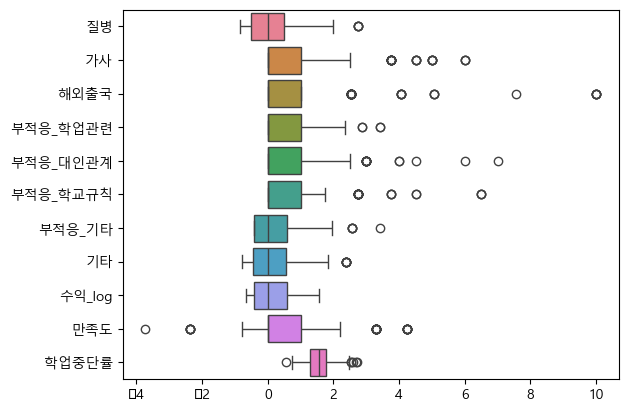

In [1321]:
# Boxplot으로 확인하기
sns.boxplot(df_cleaned_filter, orient="h")

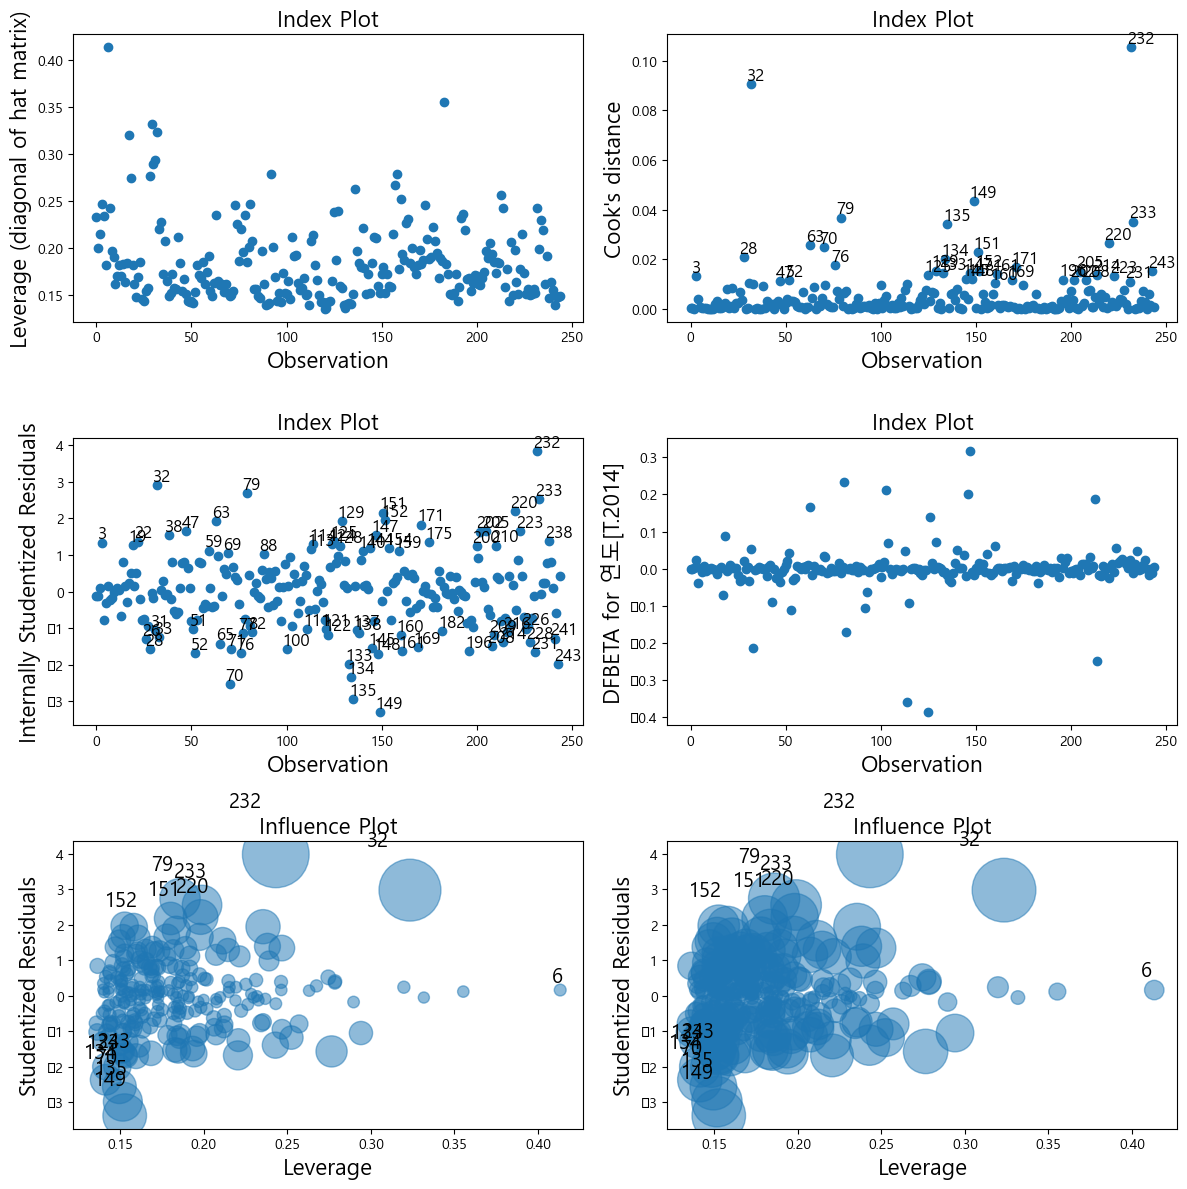

In [1322]:
# 영향점(influence point) 그래프로 찾기
import matplotlib.pyplot as plt

fig, axs = plt.subplots(3, 2, figsize=(12, 12))
# 각 영향점 그래프
infl.plot_index(y_var="leverage", threshold=3*np.mean(leverage), ax=axs[0,0])
infl.plot_index(y_var="cooks", threshold=2*np.mean(cooks), ax=axs[0,1])
infl.plot_index(y_var="resid_student", threshold=1, ax=axs[1,0])
infl.plot_index(y_var="dfbeta", idx=1, threshold=0.5, ax=axs[1,1])

# 레버리지 vs. 스튜던트 잔차 플롯
sm.graphics.influence_plot(lm, criterion='cooks', ax=axs[2,0], plot_alpha=0.5)
sm.graphics.influence_plot(lm, criterion='DFFITS', ax=axs[2,1], plot_alpha=0.5)
fig.tight_layout()
plt.show()

#### 최소 제곱법 (ols 모델)

In [1323]:
# 이상치를 제거한 후 회귀분석 실시
df_filtered_outliers = df_cleaned_filter.copy()
outlier_indices = [6,32,63,70,79,134,135,149,151,220,232,233]


df_filtered_outliers.drop(outlier_indices, inplace=True)
# 모델 확정
lm = smf.ols(formula='학업중단률 ~ 질병 + 가사 +해외출국 + 부적응_학업관련 + 부적응_대인관계 + 부적응_학교규칙 + 부적응_기타 + 기타  +연도 + 행정구역 + 수익_log + 만족도', data=df_filtered_outliers).fit(cov_type='HC0')
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  학업중단률   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     45.15
Date:                Sat, 07 Dec 2024   Prob (F-statistic):           9.18e-79
Time:                        02:16:51   Log-Likelihood:                 150.01
No. Observations:                 233   AIC:                            -210.0
Df Residuals:                     188   BIC:                            -54.72
Df Model:                          44                                         
Covariance Type:                  HC0                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.7037      0.193      3.643   

- 다중공선성 문제 발생 . -> 릿지회귀 사용

<Axes: >

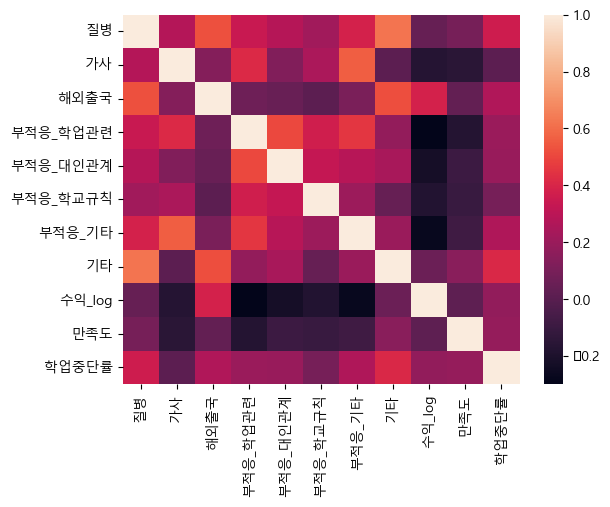

In [1324]:
sns.heatmap(df_filtered_outliers.corr(numeric_only=True))

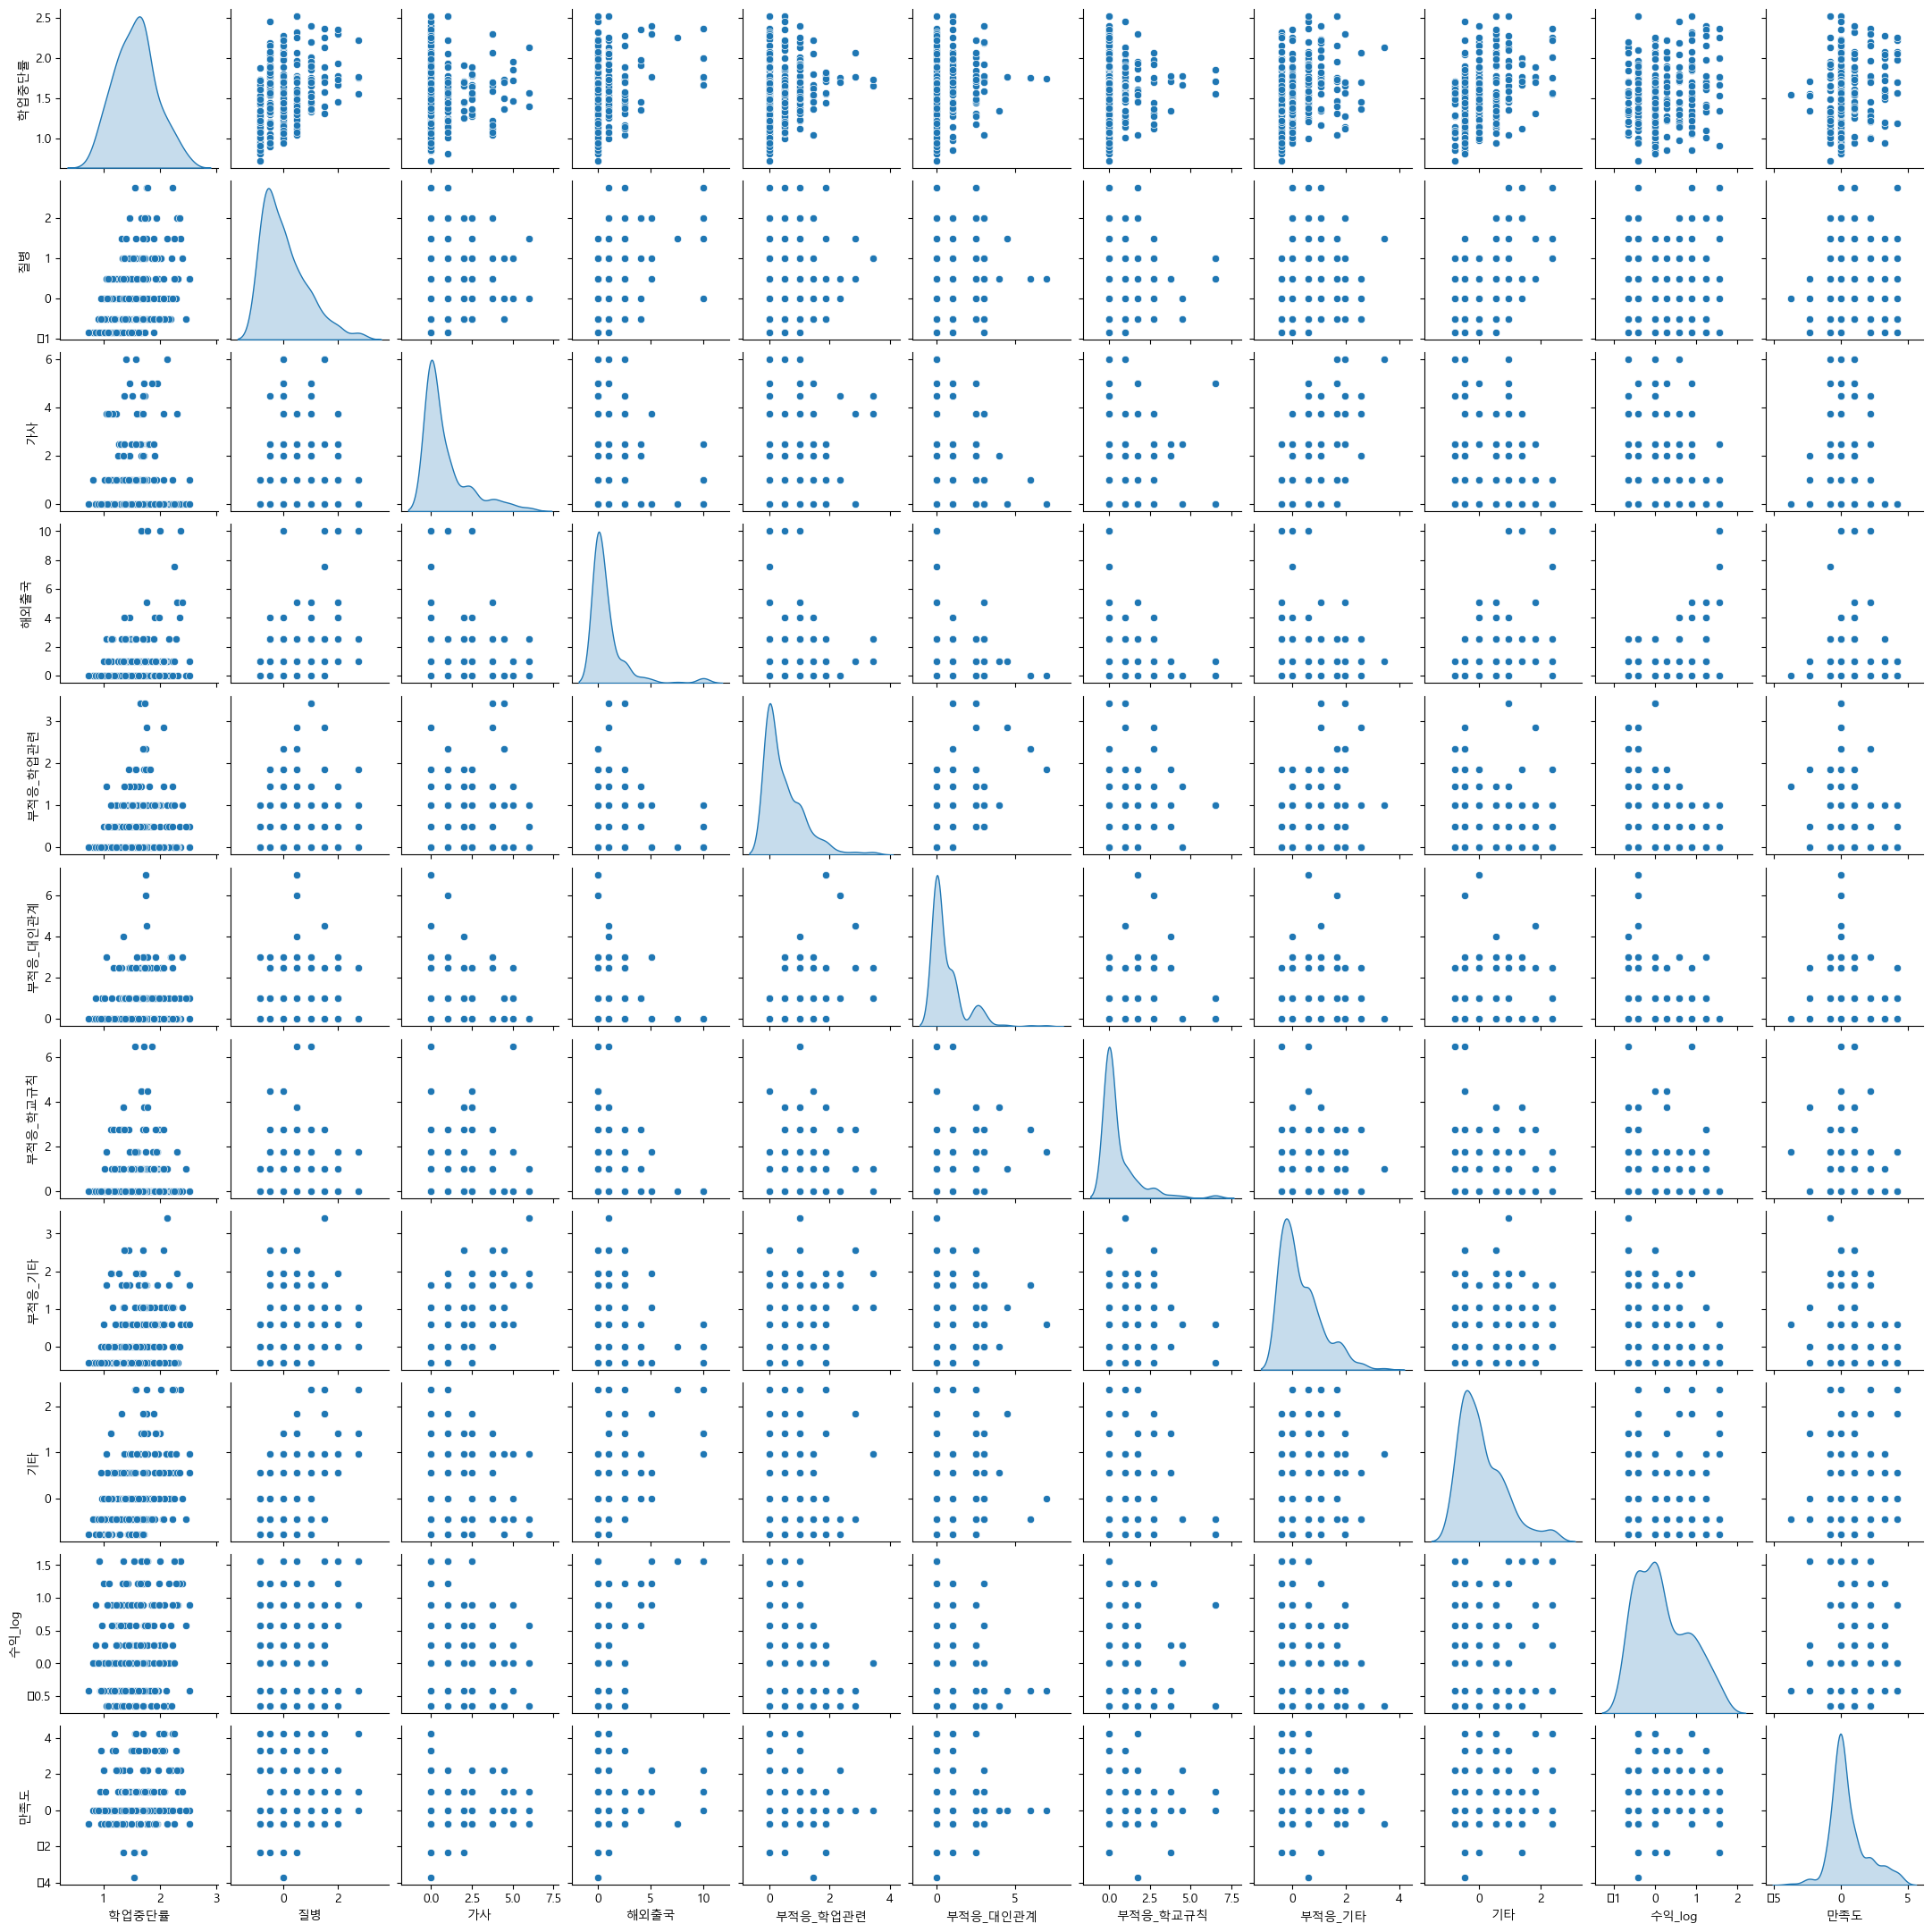

In [1325]:
# 다변량 이상치 분석 이후 kde 플롯
sns.pairplot(df_filtered_outliers[['학업중단률','질병', '가사', '해외출국','부적응_학업관련','부적응_대인관계','부적응_학교규칙','부적응_기타','기타','수익_log','만족도']], diag_kind='kde', height=2)

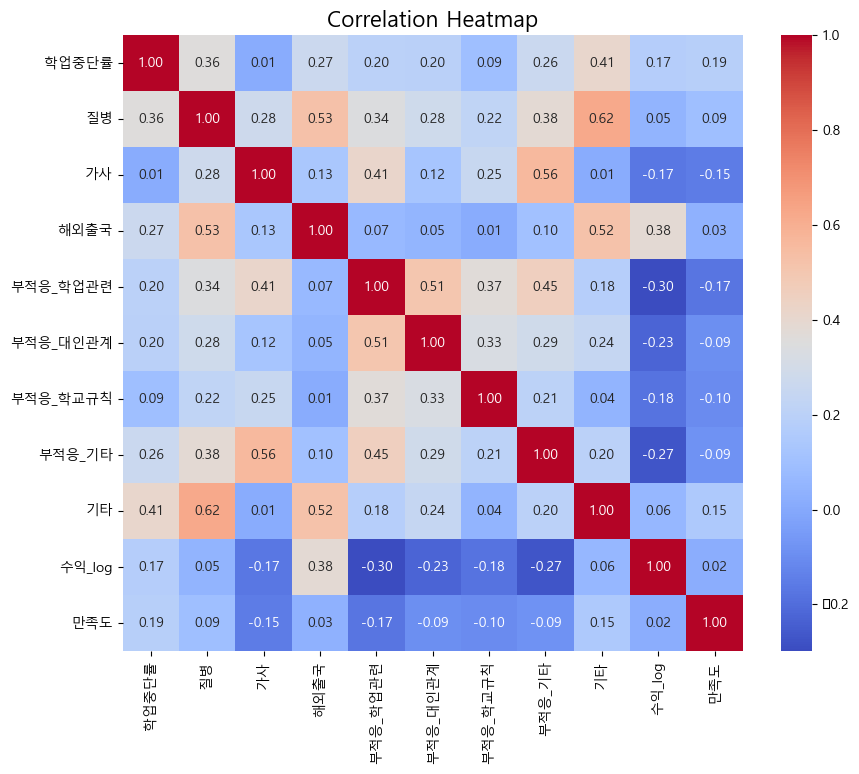

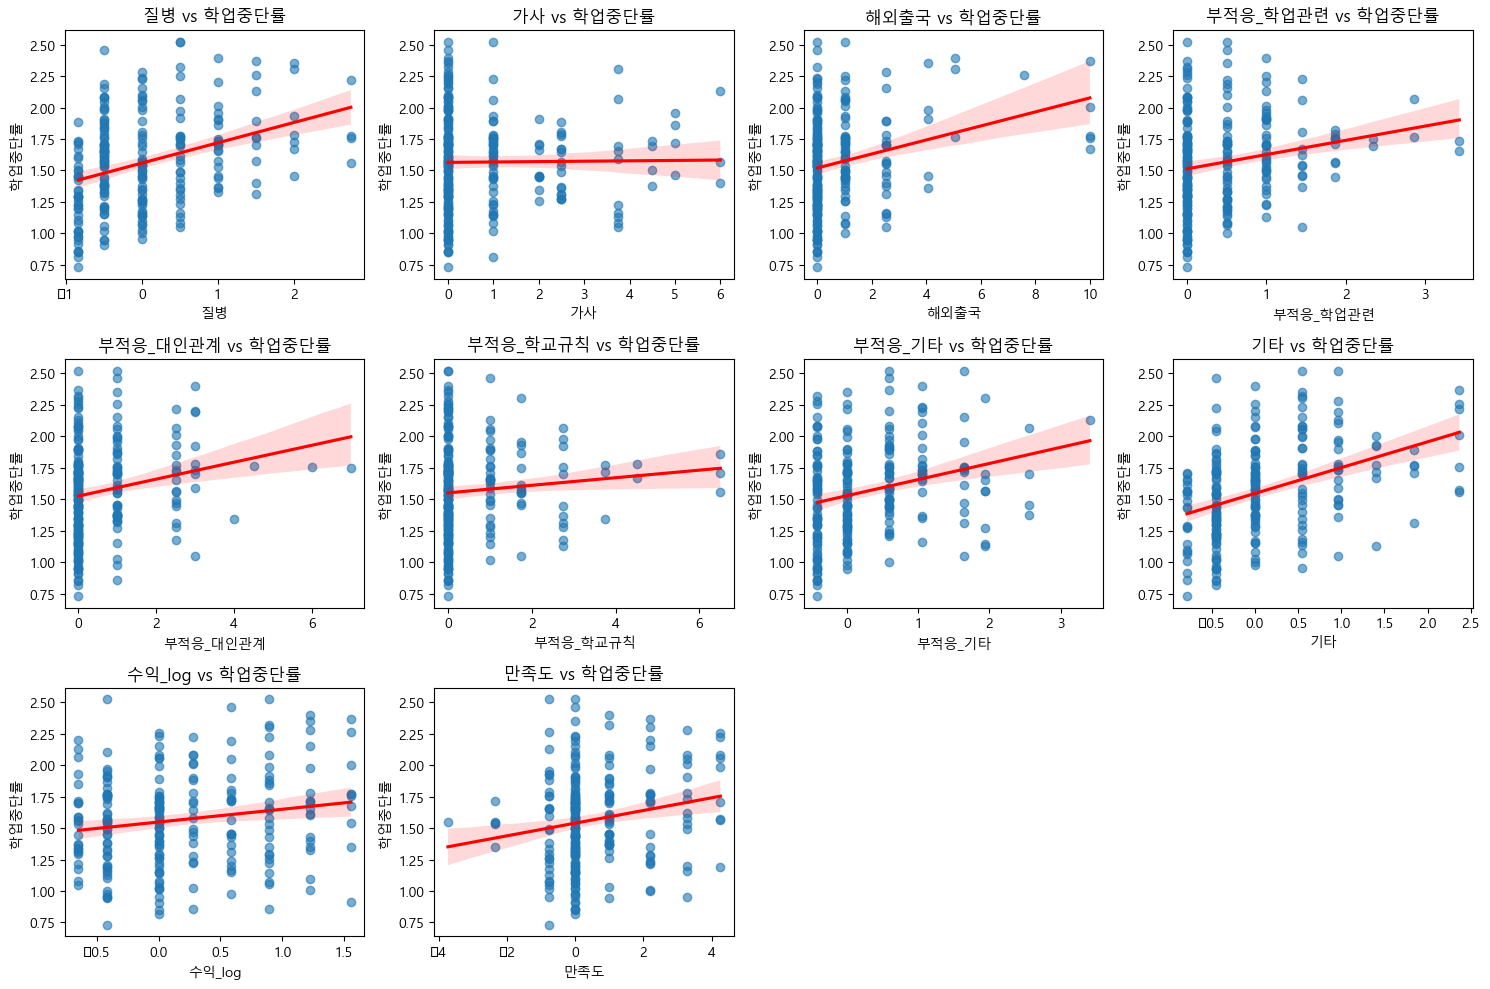

In [1326]:
# 상관관계 분석 및 개별 시각화

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# 필요한 열 선택
selected_columns = ['학업중단률', '질병', '가사', '해외출국', '부적응_학업관련', 
                    '부적응_대인관계', '부적응_학교규칙', '부적응_기타', 
                    '기타', '수익_log', '만족도']

df_corr = df_filtered_outliers[selected_columns]  # 데이터프레임 추출

# 상관계수 히트맵
plt.figure(figsize=(10, 8))
sns.heatmap(df_corr.corr(), annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

# 학업중단률과 다른 변수 간의 산점도 플롯
plt.figure(figsize=(15, 10))
for i, col in enumerate(selected_columns[1:], 1):  # '학업중단률' 제외한 나머지
    plt.subplot(3, 4, i)
    sns.regplot(data=df_corr, x=col, y='학업중단률', scatter_kws={'alpha': 0.6}, line_kws={'color': 'red'})
    plt.title(f'{col} vs 학업중단률')
    plt.tight_layout()
plt.show()


#### 릿지 회귀

Train R^2: 0.8832
Test R^2: 0.8227
Coefficients:
           Coefficients
질병             0.030821
가사            -0.005908
해외출국           0.046661
부적응_학업관련       0.122868
부적응_대인관계       0.005367
부적응_학교규칙       0.030653
부적응_기타         0.103367
기타             0.246848
수익_log        -0.095660
만족도            0.019668
연도_2014        0.001694
연도_2015        0.000567
연도_2016       -0.003136
연도_2017        0.037485
연도_2018        0.071589
연도_2019        0.121478
연도_2020        0.130762
연도_2021       -0.011982
연도_2022        0.089862
연도_2023        0.129243
행정구역_강동구      -0.028490
행정구역_강북구       0.044148
행정구역_강서구      -0.074946
행정구역_관악구       0.005121
행정구역_광진구       0.026427
행정구역_구로구       0.008136
행정구역_금천구       0.075989
행정구역_노원구      -0.198524
행정구역_도봉구       0.029484
행정구역_동대문구      0.074891
행정구역_동작구       0.034913
행정구역_마포구       0.107373
행정구역_서대문구      0.112487
행정구역_서초구       0.117712
행정구역_성동구       0.121577
행정구역_성북구      -0.014760
행정구역_송파구      -0.048875
행정구역_양천구      -0.053038
행정구역_영등포구      

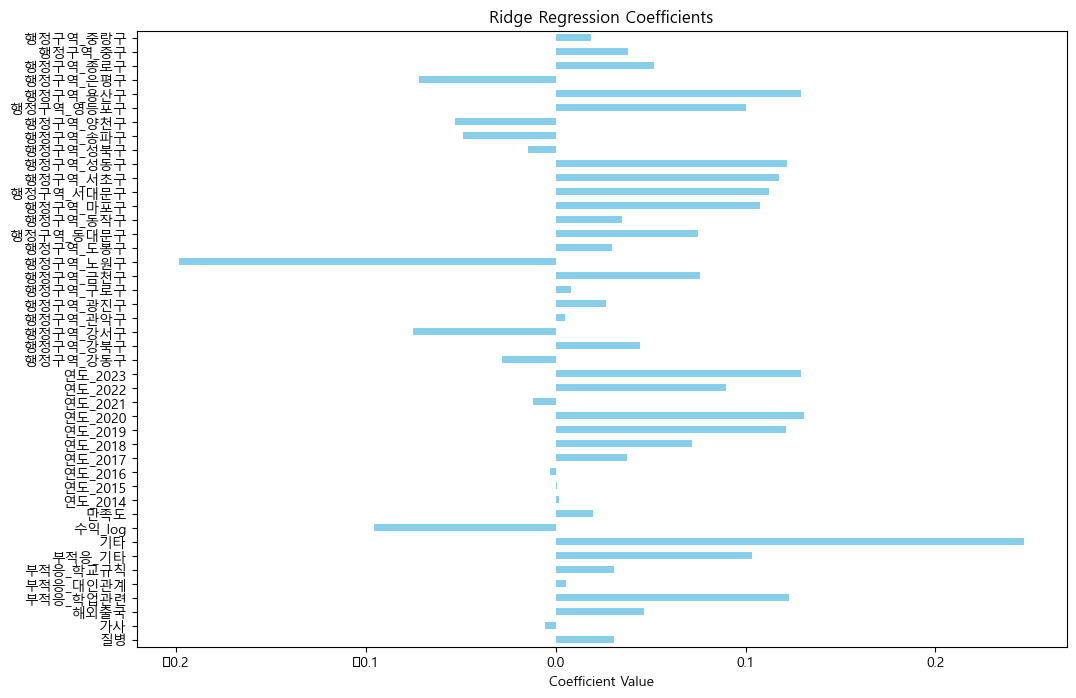

In [1327]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# 데이터 준비 (이상치 제거 후 데이터프레임)
df_filtered_outliers = df_cleaned_filter.copy()
outlier_indices = [6,32,63,70,79,134,135,149,151,220,232,233]
df_filtered_outliers.drop(outlier_indices, inplace=True)


# X, y 설정
X = pd.get_dummies(df_filtered_outliers[['질병','가사','해외출국','부적응_학업관련', '부적응_대인관계', '부적응_학교규칙', '부적응_기타','연도','기타', '행정구역','수익_log','만족도']], drop_first=True)
y = df_filtered_outliers['학업중단률']


# 데이터 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 훈련 데이터와 테스트 데이터로 분할
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 릿지 회귀 모델 생성 및 훈련
ridge_model = Ridge(alpha=1.0)  # 규제 1.0
ridge_model.fit(X_train, y_train)

# 모델 평가
train_score = ridge_model.score(X_train, y_train) 
test_score = ridge_model.score(X_test, y_test)

# 회귀 계수 출력
coefficients = pd.DataFrame(ridge_model.coef_, X.columns, columns=['Coefficients'])

# 조건수 계산 (X의 분산-공분산 행렬의 고유값 분해를 이용)
X_train_with_intercept = np.c_[np.ones(X_train.shape[0]), X_train]  # 절편을 포함한 X
cond_number = np.linalg.cond(X_train_with_intercept)

# 결과 출력
print(f"Train R^2: {train_score:.4f}")
print(f"Test R^2: {test_score:.4f}")
print("Coefficients:")
print(coefficients)
print(f"Condition Number: {cond_number:.4f}")

# 회귀 계수 막대 그래프 시각화
plt.figure(figsize=(12, 8))
coefficients['Coefficients'].plot(kind='barh', color='skyblue')
plt.xlabel('Coefficient Value')
plt.title('Ridge Regression Coefficients')
plt.show()



- Cond num > 30 이므로 다중공선성문제 

    -> 후진제거법을 사용해서 차원을 줄이면서 다중공선성 제거.

    -> Test 데이터의 R-squared > 0.8로 상당한 부분 설명 가능.

In [1328]:
# 모델 summary 확인.

import statsmodels.api as sm

# OLS 회귀 모델을 statsmodels를 사용하여 적합
X_with_intercept = sm.add_constant(X_train)  # 절편 추가
ols_model = sm.OLS(y_train, X_with_intercept).fit(cov_type='HC0')

columns_list = list(X.columns)
coefficients = pd.DataFrame(ols_model.params.values, ['const'] + columns_list, columns=['Coefficients'])

# 결과 출력 (summary()로 p-value, t-값 등 확인)
print(ols_model.summary())
print(coefficients)




                            OLS Regression Results                            
Dep. Variable:                  학업중단률   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     40.14
Date:                Sat, 07 Dec 2024   Prob (F-statistic):           9.22e-61
Time:                        02:17:12   Log-Likelihood:                 121.41
No. Observations:                 186   AIC:                            -152.8
Df Residuals:                     141   BIC:                            -7.659
Df Model:                          44                                         
Covariance Type:                  HC0                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.5681      0.010    157.893      0.0

## 시각화 및 최종 모델 생성하기.

### 1. 후진제거법을 통한 컬럼 주요 컬럼 추출.

In [1329]:
import pandas as pd
import statsmodels.api as sm

# X와 y의 인덱스를 맞추기
X_with_intercept = sm.add_constant(X_train)  # 상수 항 추가


# X와 y의 인덱스 맞추기
X_with_intercept = pd.DataFrame(X_with_intercept, index=y_train.index)  # X의 인덱스를 y_train의 인덱스에 맞춤

X_with_intercept.columns = [
    'const', '질병', '가사' ,'부적응_학업관련', '부적응_대인관계', '부적응_학교규칙', '부적응_기타', 
    '기타','수익_log','만족도','해외출국','연도_2014', '연도_2015', '연도_2016', '연도_2017', '연도_2018', 
    '연도_2019', '연도_2020', '연도_2021', '연도_2022', '연도_2023', 
    '행정구역_강동구', '행정구역_강북구', '행정구역_강서구', '행정구역_관악구', 
    '행정구역_광진구', '행정구역_구로구', '행정구역_금천구', '행정구역_노원구', 
    '행정구역_도봉구', '행정구역_동대문구', '행정구역_동작구', '행정구역_마포구', 
    '행정구역_서대문구', '행정구역_서초구', '행정구역_성동구', '행정구역_성북구', 
    '행정구역_송파구', '행정구역_양천구', '행정구역_영등포구', '행정구역_용산구', 
    '행정구역_은평구', '행정구역_종로구', '행정구역_중구', '행정구역_중랑구'
]

# 함수: 백워드 엘리미네이션
def backward_elimination(X, y, significance_level=0.05):
    # OLS 모델 피팅
    ols_model = sm.OLS(y, X).fit()
    
    # p-value가 높은 변수부터 차례대로 제거
    while ols_model.pvalues.max() > significance_level:
        # p-value가 가장 큰 변수 제거
        max_p_value = ols_model.pvalues.idxmax()  # 가장 큰 p-value 변수의 이름
        X = X.drop(columns=[max_p_value])  # 해당 변수 제거
        
        # 모델 재적합
        ols_model = sm.OLS(y, X).fit(cov_type='HC1')
    
    return ols_model

# 백워드 엘리미네이션 수행
final_model = backward_elimination(X_with_intercept, y_train, significance_level=0.05)

# 최종 모델 결과 출력
print(final_model.summary())




                            OLS Regression Results                            
Dep. Variable:                  학업중단률   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     36.84
Date:                Sat, 07 Dec 2024   Prob (F-statistic):           6.64e-57
Time:                        02:17:13   Log-Likelihood:                 117.78
No. Observations:                 186   AIC:                            -167.6
Df Residuals:                     152   BIC:                            -57.89
Df Model:                          33                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.5689      0.011    140.325      0.0

**ㄴ최종모델 완성.**

< Summary 분석 >

**- R-squared :   0.882**

**Adj. R-squared:   0.856**

  - 다중회귀분석 :  adj. R-squared로 판단 0.856으로 상당한 설명력을 지녔음.
    
**- Prob (F-statistic):    6.64e-57**

  - 0.05 보다 작으므로 모델이 유의미함.

  - 모든 변수의 p-value는 0.05보다 작음. 모든 변수 유의미함. + t-value에 따라서 종속변수에 미치는 영향의 크기가 달라짐

**- Durbin-Watson:   1.923**

  - 2에 가까움. 자기 상관이 거의 없음.

**- Cond. No. : 9.80**

  - 조건수가 30보다 작으므로 모델 다중공선성 거의 없다고 판단.

**- Prob(Omnibus): 0.596**
  
  - 0.05보다 크므로 잔차는 정규성을 지닌 것으로 볼 수 있음. (뒤 시각화)

**- Kurtosis: 2.806**

  - 3과 비슷하므로 정규분포와 비슷.



      **-> 최종 모델로 적합.**

In [1330]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  학업중단률   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     36.84
Date:                Sat, 07 Dec 2024   Prob (F-statistic):           6.64e-57
Time:                        02:17:13   Log-Likelihood:                 117.78
No. Observations:                 186   AIC:                            -167.6
Df Residuals:                     152   BIC:                            -57.89
Df Model:                          33                                         
Covariance Type:                  HC1                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.5689      0.011    140.325      0.000       1.547       1.591
부적응_학업관련       0.1099      0.023      4.722      0.000       0.064       0.156
부적응_대인관계       0.1424      0.014      9.859      0.000       0.114       0.171
부적응_기타         0.0350      0.011      3.133      0.002       0.013       0.057
기타             0.1089      0.014      7.786      0.000       0.081       0.136
수익_log         0.2898      0.030      9.608      0.000       0.231       0.349
만족도           -0.0916      0.041     -2.247      0.025      -0.172      -0.012
연도_2017        0.0393      0.010      3.854      0.000       0.019       0.059
연도_2018        0.0753      0.011      6.934      0.000       0.054       0.097
연도_2019        0.1244      0.011     11.097      0.000       0.102       0.146
연도_2020        0.1330      0.014      9.660      0.000       0.106       0.160
연도_2022        0.1049      0.015      6.875      0.000       0.075       0.135
연도_2023        0.1419      0.018      8.065      0.000       0.107       0.176
행정구역_강동구       0.0364      0.011      3.279      0.001       0.015       0.058
행정구역_강북구       0.1282      0.019      6.862      0.000       0.092       0.165
행정구역_강서구      -0.0514      0.010     -5.002      0.000      -0.071      -0.031
행정구역_관악구       0.0703      0.011      6.126      0.000       0.048       0.093
행정구역_광진구       0.0940      0.013      7.165      0.000       0.068       0.120
행정구역_구로구       0.0801      0.017      4.744      0.000       0.047       0.113
행정구역_금천구       0.1457      0.025      5.880      0.000       0.097       0.194
행정구역_노원구      -0.1655      0.014    -11.961      0.000      -0.193      -0.138
행정구역_도봉구       0.1139      0.015      7.719      0.000       0.085       0.143
행정구역_동대문구      0.1439      0.013     11.193      0.000       0.119       0.169
행정구역_동작구       0.1212      0.016      7.387      0.000       0.089       0.153
행정구역_마포구       0.1863      0.024      7.784      0.000       0.139       0.233
행정구역_서대문구      0.1913      0.021      9.011      0.000       0.150       0.233
행정구역_서초구       0.1671      0.018      9.308      0.000       0.132       0.202
행정구역_성동구       0.1907      0.024      7.827      0.000       0.143       0.238
행정구역_성북구       0.0524      0.018      2.941      0.003       0.017       0.087
행정구역_영등포구      0.1789      0.028      6.501      0.000       0.125       0.233
행정구역_용산구       0.2045      0.025      8.313      0.000       0.156       0.253
행정구역_종로구       0.1172      0.015      7.866      0.000       0.088       0.146
행정구역_중구        0.1054      0.015      7.147      0.000       0.076       0.134
행정구역_중랑구       0.0969      0.013      7.436      0.000       0.071       0.122
==============================================================================
Omnibus:                        1.036   Durbin-Watson:                   1.923
Pr

### 2. 모델 성능 평가 및 시각화

Selected model columns: ['부적응_학업관련', '부적응_대인관계', '부적응_기타', '기타', '수익_log', '만족도', '연도_2017', '연도_2018', '연도_2019', '연도_2020', '연도_2022', '연도_2023', '행정구역_강동구', '행정구역_강북구', '행정구역_강서구', '행정구역_관악구', '행정구역_광진구', '행정구역_구로구', '행정구역_금천구', '행정구역_노원구', '행정구역_도봉구', '행정구역_동대문구', '행정구역_동작구', '행정구역_마포구', '행정구역_서대문구', '행정구역_서초구', '행정구역_성동구', '행정구역_성북구', '행정구역_영등포구', '행정구역_용산구', '행정구역_종로구', '행정구역_중구', '행정구역_중랑구']
(186, 33)
Selected columns in X: Index(['const', '부적응_학업관련', '부적응_대인관계', '부적응_기타', '기타', '수익_log', '만족도',
       '연도_2017', '연도_2018', '연도_2019', '연도_2020', '연도_2022', '연도_2023',
       '행정구역_강동구', '행정구역_강북구', '행정구역_강서구', '행정구역_관악구', '행정구역_광진구', '행정구역_구로구',
       '행정구역_금천구', '행정구역_노원구', '행정구역_도봉구', '행정구역_동대문구', '행정구역_동작구', '행정구역_마포구',
       '행정구역_서대문구', '행정구역_서초구', '행정구역_성동구', '행정구역_성북구', '행정구역_영등포구',
       '행정구역_용산구', '행정구역_종로구', '행정구역_중구', '행정구역_중랑구'],
      dtype='object')
Selected columns in X: (186, 34)


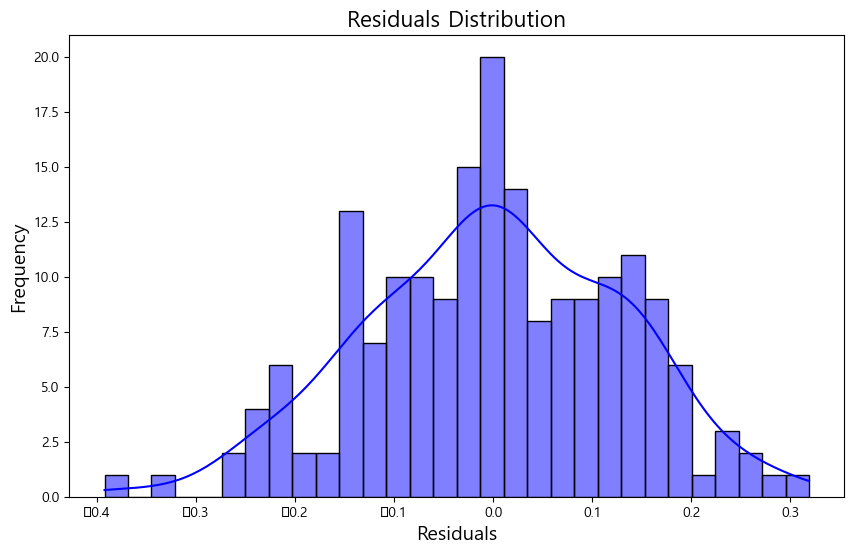

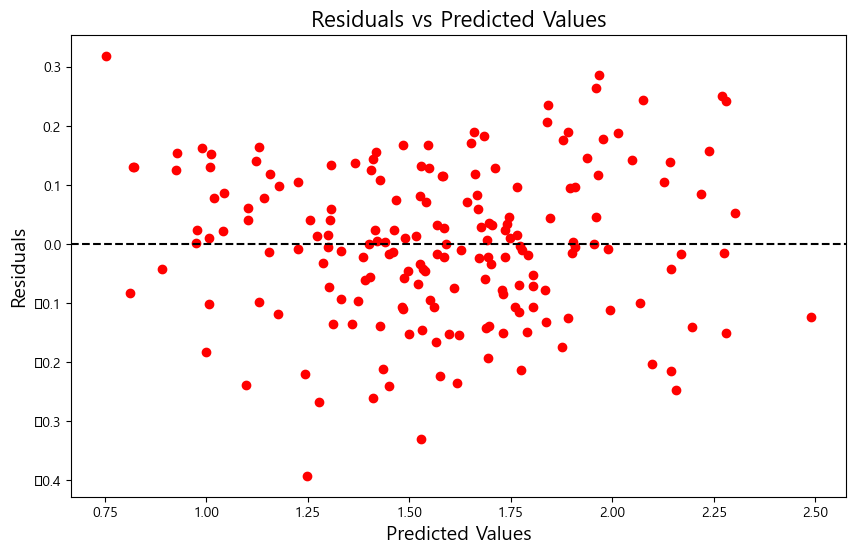

In [1331]:
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

# 선택된 모델의 컬럼에서 'const'만 제외하고 나머지 변수들만 선택
selected_columns = [col for col in final_model.model.exog_names if col != 'const']

print("Selected model columns:", selected_columns)

# X에서 모델에서 사용된 변수만 추출 (상수항 추가 전)
X_with_selected_columns = X_with_intercept[selected_columns]
print(X_with_selected_columns.shape)
# 상수항을 X에 추가
X_with_intercept = sm.add_constant(X_with_selected_columns)  # 상수항 추가

print("Selected columns in X:", X_with_intercept.columns)
print("Selected columns in X:", X_with_intercept.shape)

# 예측값 계산
y_pred = final_model.predict(X_with_intercept)

# 잔차 계산
residuals = y_train - y_pred

# 잔차 분포 시각화
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='blue', bins=30)
plt.title('Residuals Distribution', fontsize=16)
plt.xlabel('Residuals', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

# 잔차 vs 예측값 그래프
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='red')
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Residuals vs Predicted Values', fontsize=16)
plt.xlabel('Predicted Values', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.show()



- 잔차 분포는 정규성을 띔.

- 잔차 vs 예측값 그래프 -> 독립적으로 분포되어 있음. 올바르게 분포됨.

In [1332]:
print(len(y_train))        # y의 길이
print(len(y_pred))   # y_pred의 길이


186
186


In [1333]:
# 에러 분석

from sklearn.metrics import mean_squared_error,mean_absolute_error

# y와 X_with_intercept의 교집합만 사용하여 인덱스 맞추기
common_index = X_with_intercept.index.intersection(y_train.index)

# 교집합 인덱스만 선택하여 X와 y를 필터링
X_with_intercept_filtered = X_with_intercept.loc[common_index]
y_filtered = y_train.loc[common_index]

# 예측값 계산
y_pred = final_model.predict(X_with_intercept_filtered)

# MSE, RMSE, MAE 계산
mse = mean_squared_error(y_filtered, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_filtered, y_pred)

print(f'MSE: {mse:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'MAE: {mae:.4f}')



MSE: 0.0165
RMSE: 0.1285
MAE: 0.1023


- MSE : 값이 낮을수록 모델의 예측이 실제 값에 가까움. 0.165로 매우 낮음.

- RMSE : 0.1777

- MAE :  0.1023 -> 예측값과 실제 값 사이의 평균적인 차이가 약 0.1023 정도.

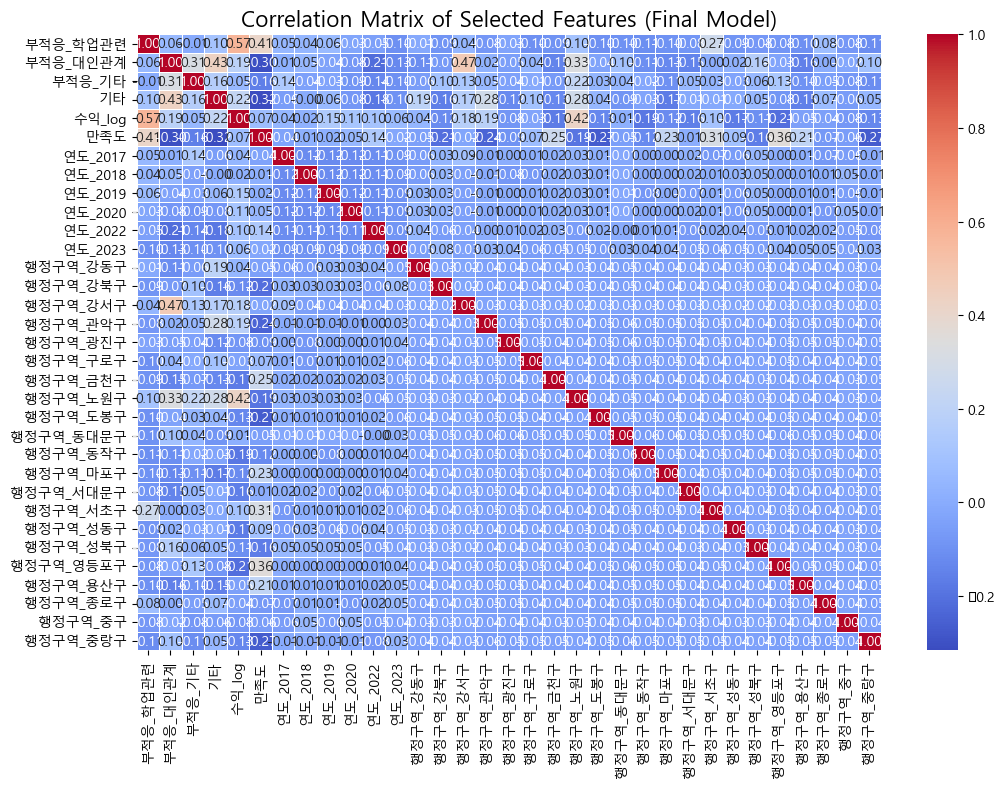

In [1334]:
import seaborn as sns
import matplotlib.pyplot as plt

# 최종 모델에서 사용된 변수들만 추출 (상수 항 제외)
selected_columns = [col for col in final_model.model.exog_names if col != 'const']

# X에서 최종 모델에 사용된 변수들만 추출
X_selected = X_with_intercept[selected_columns]

# 상관 행렬 계산
corr_matrix = X_selected.corr()

# 상관 행렬 시각화
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Selected Features (Final Model)', fontsize=16)
plt.show()


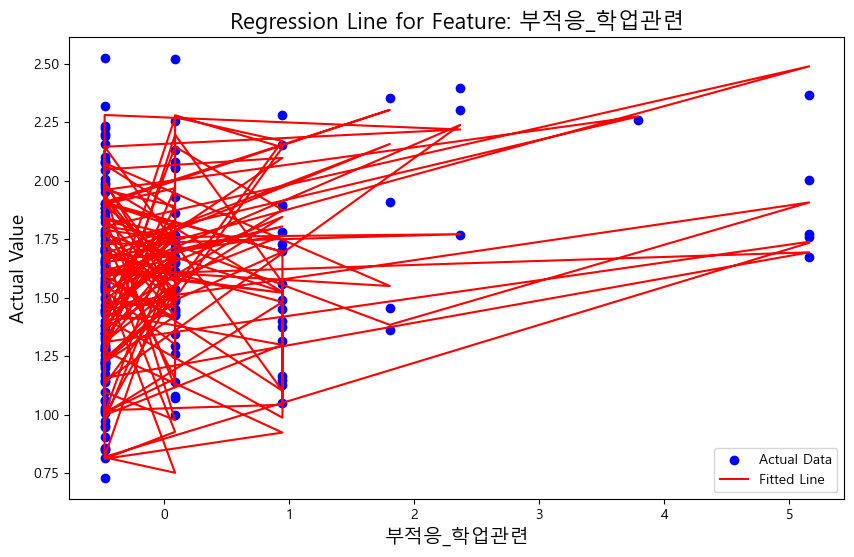

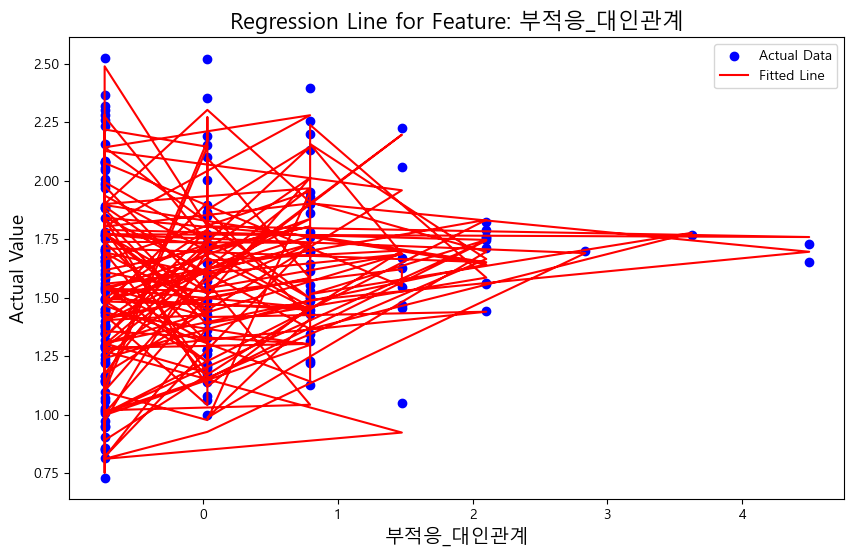

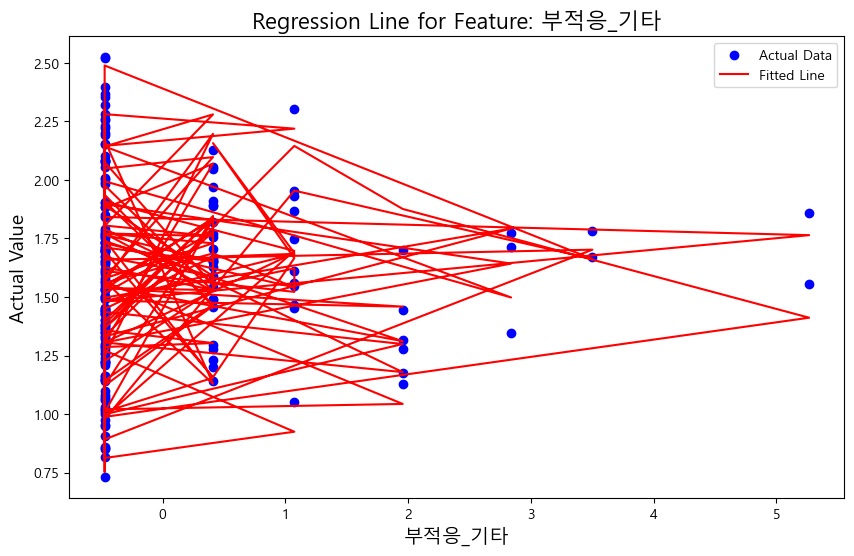

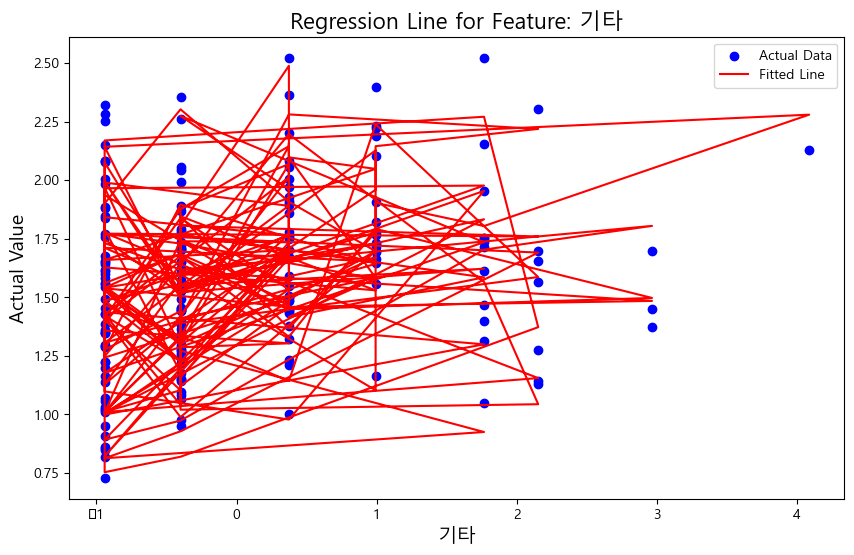

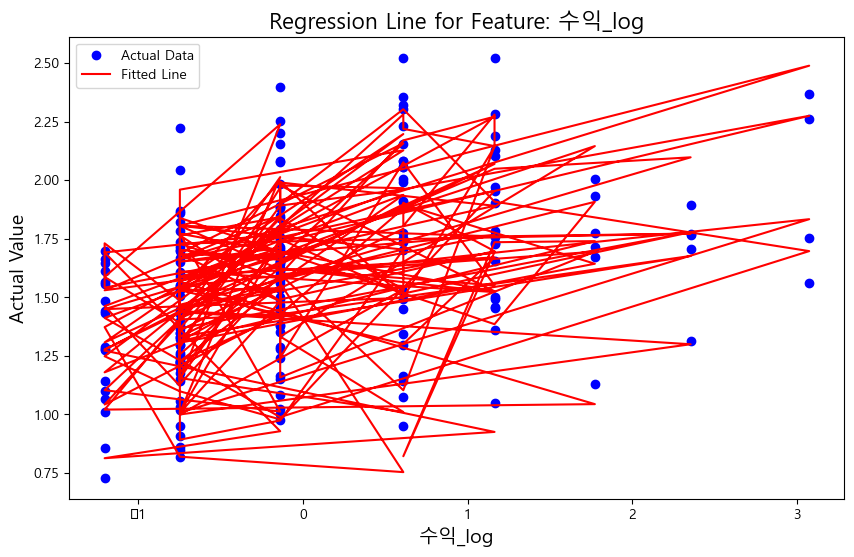

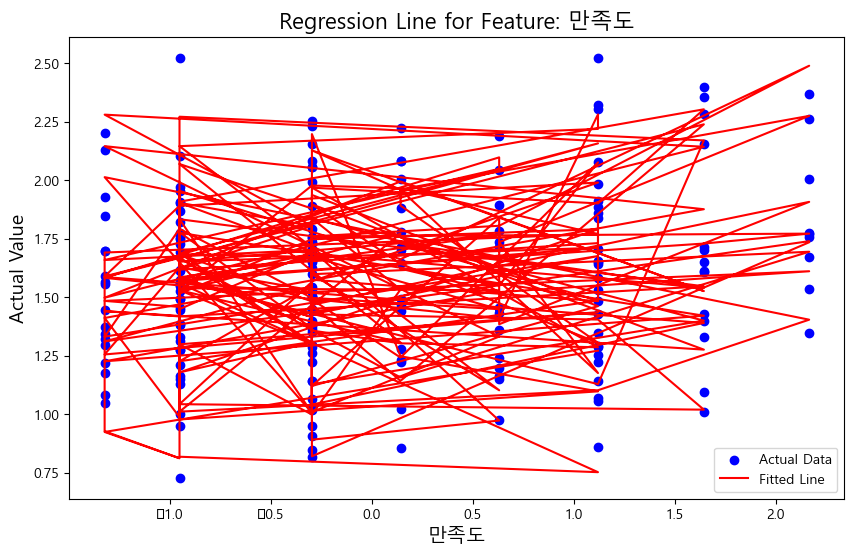

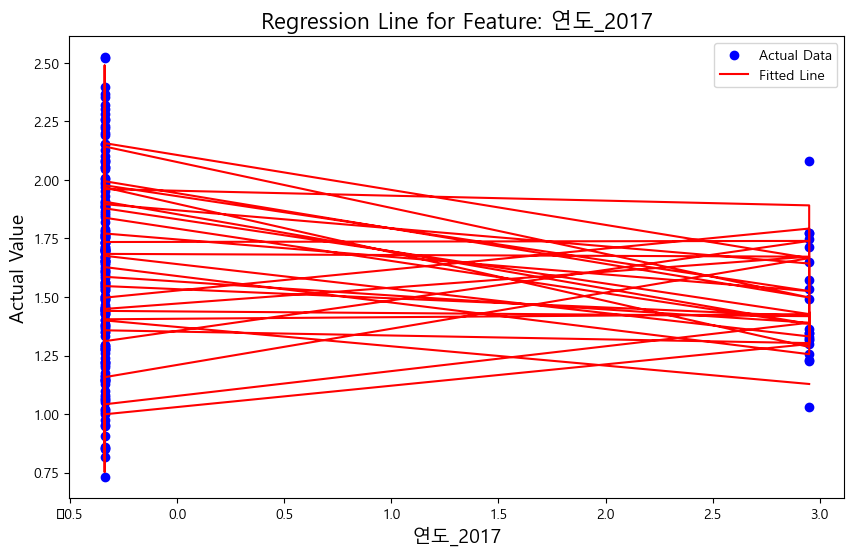

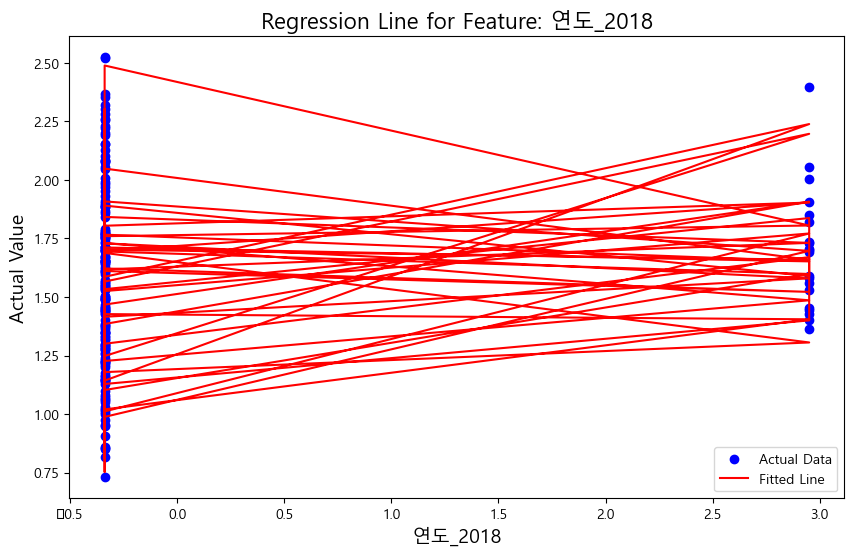

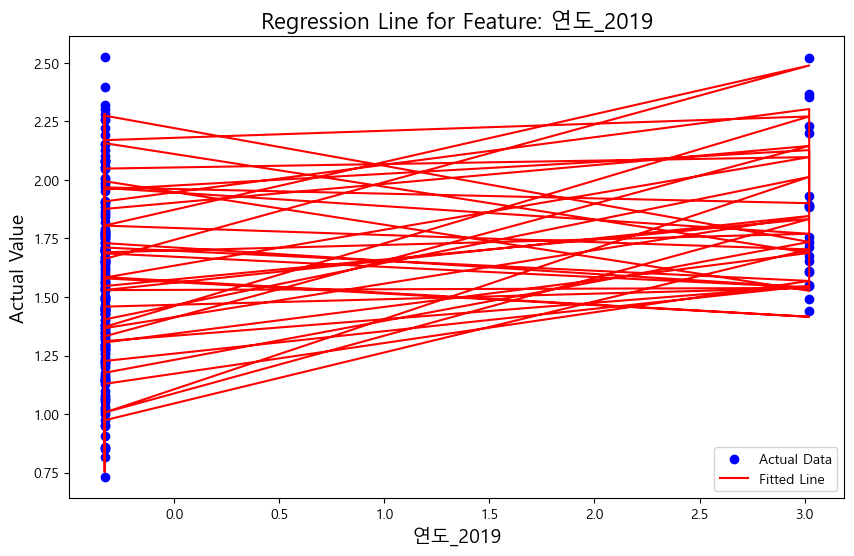

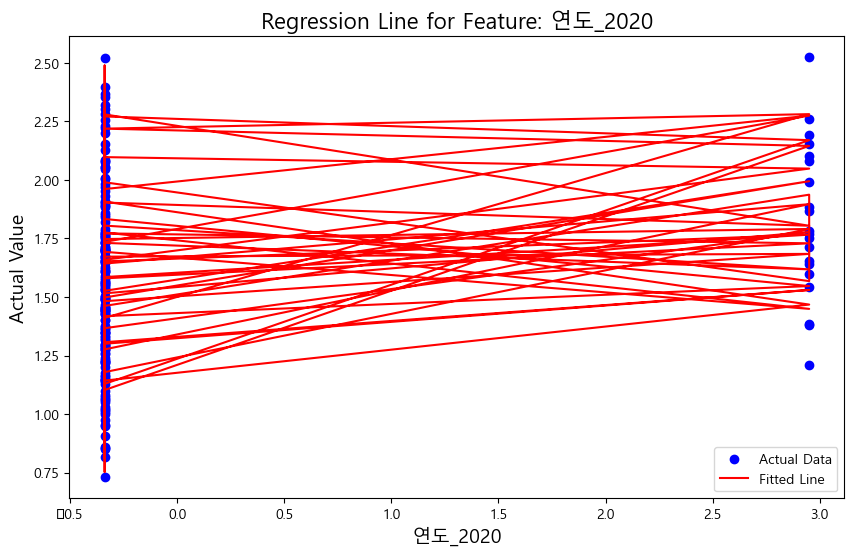

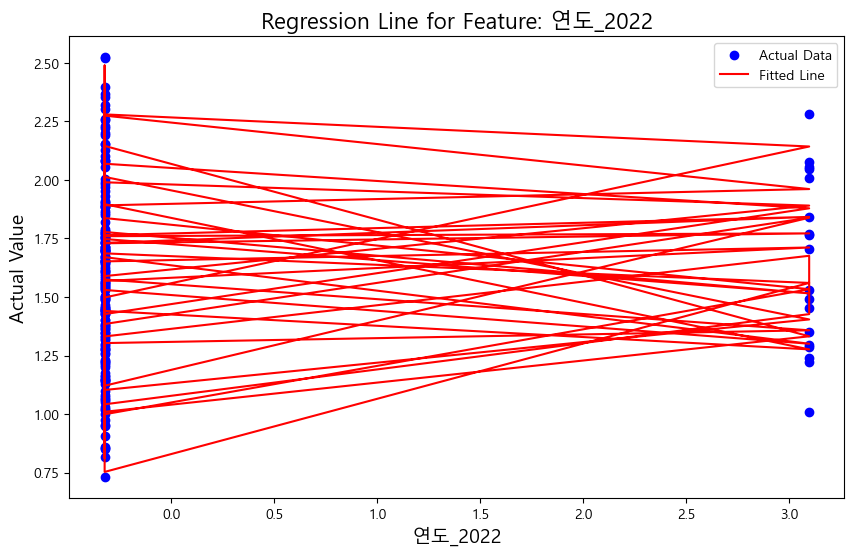

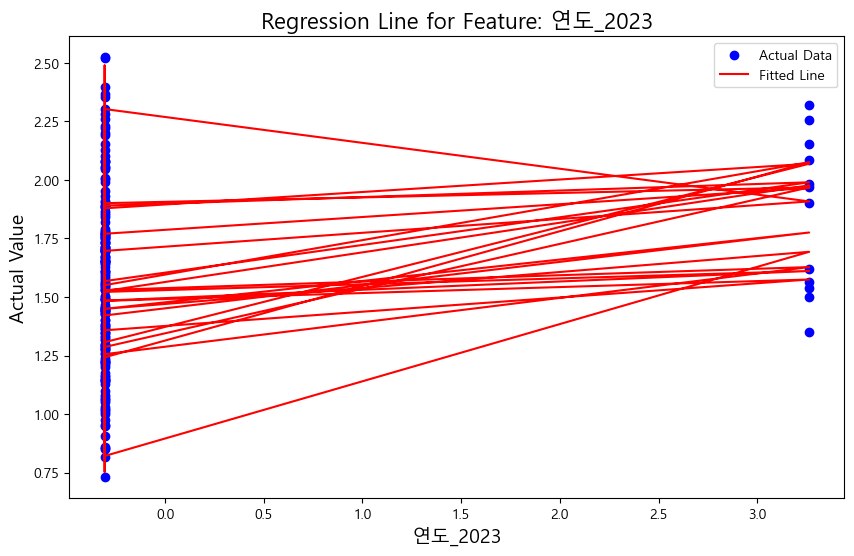

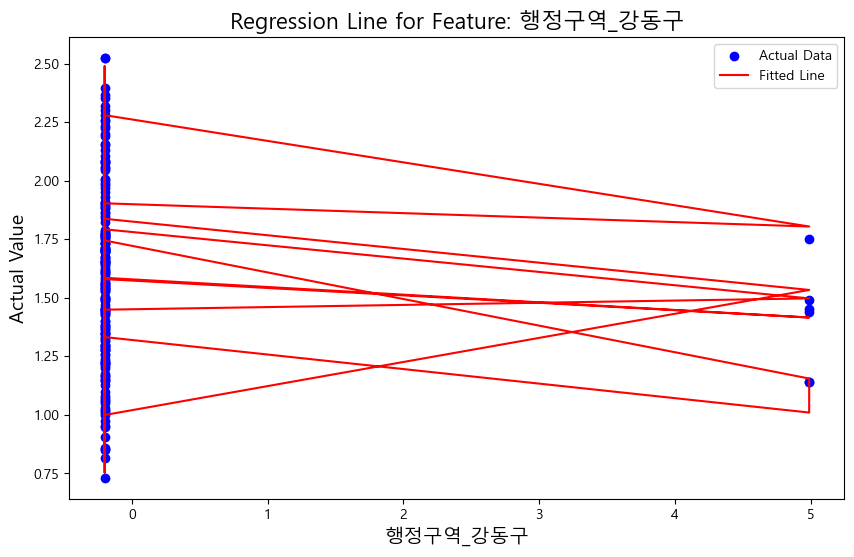

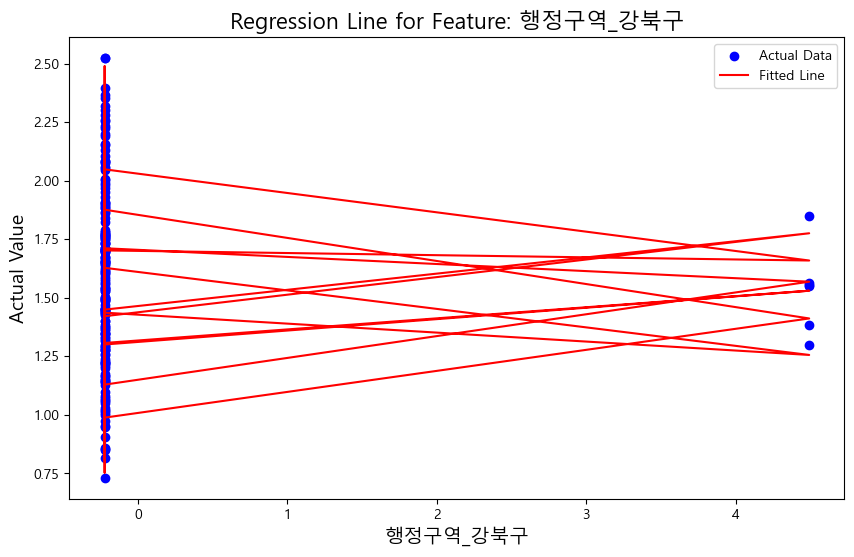

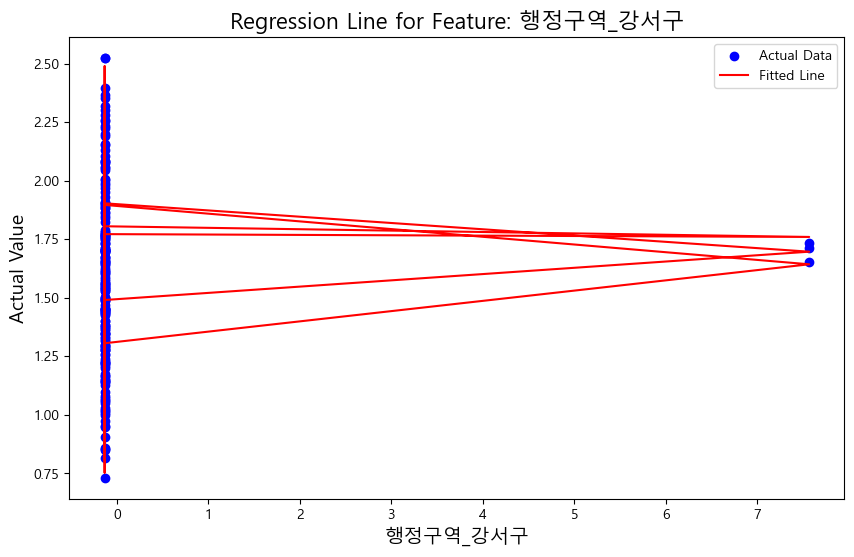

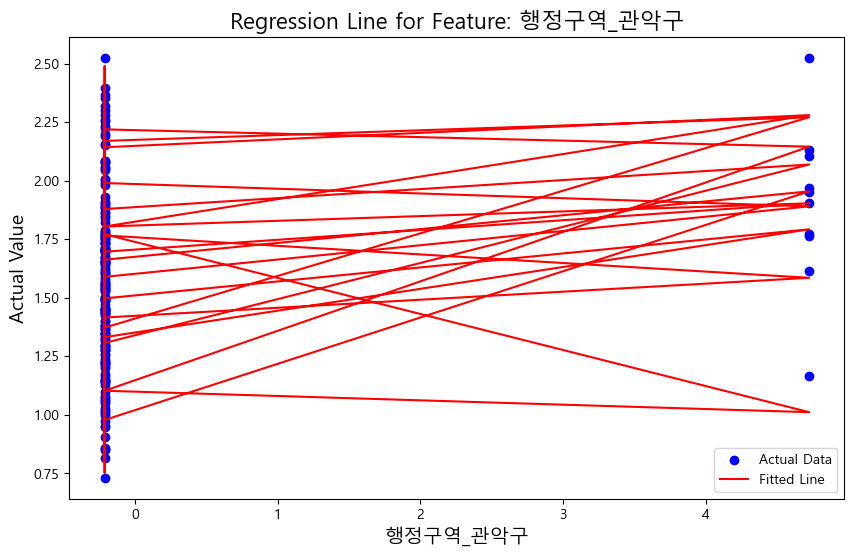

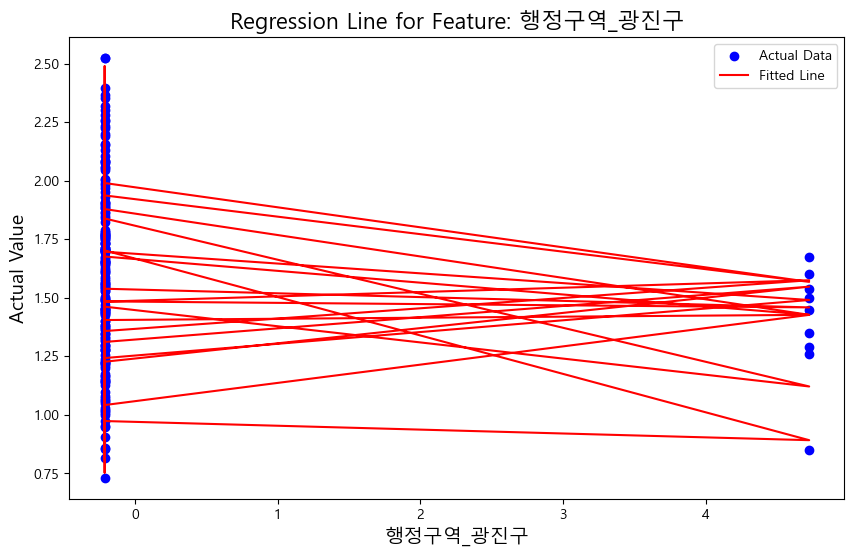

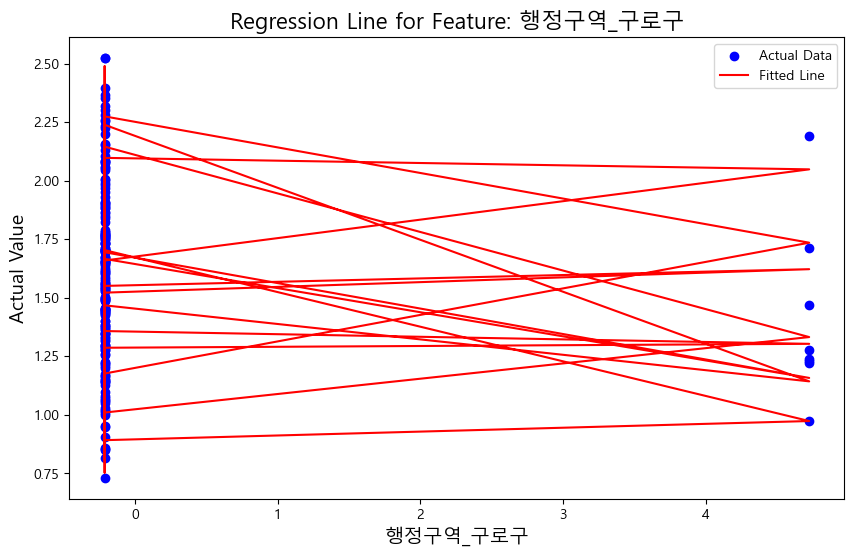

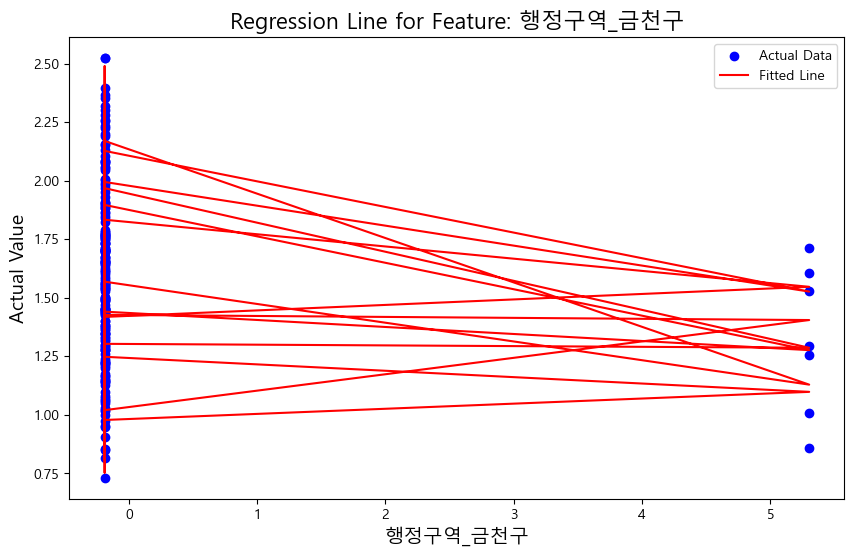

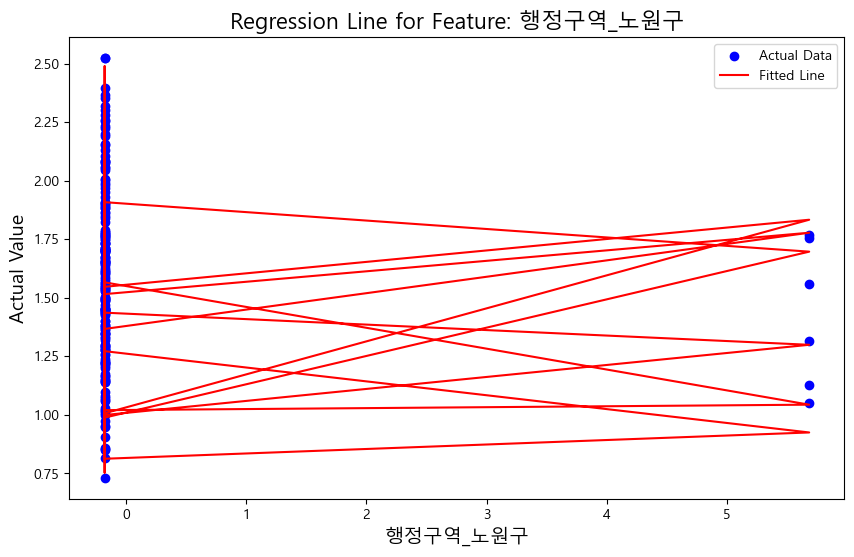

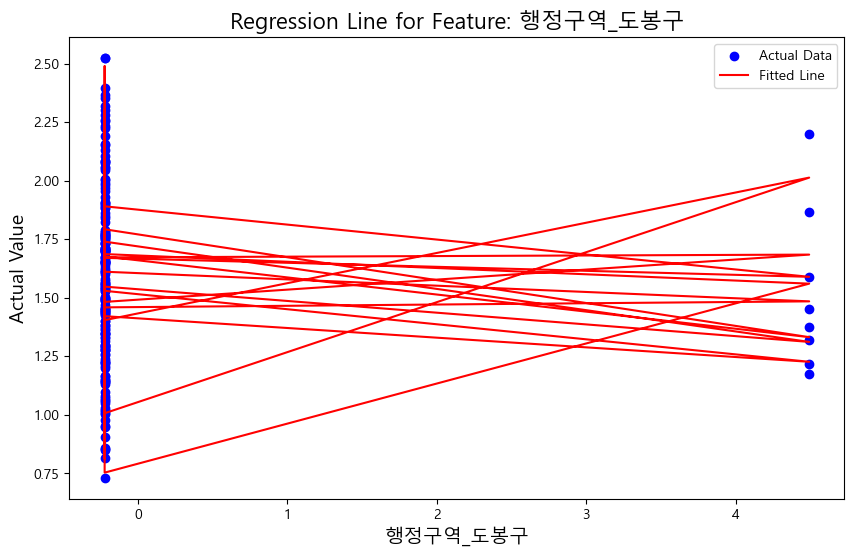

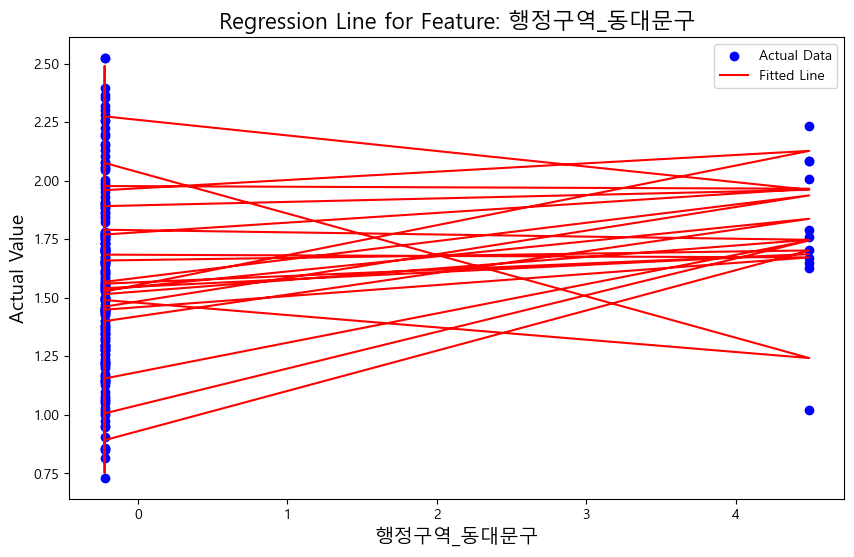

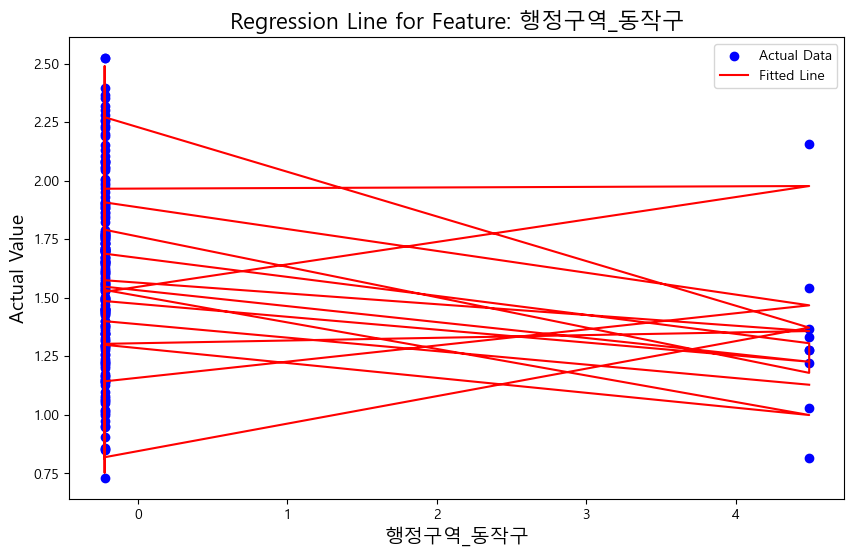

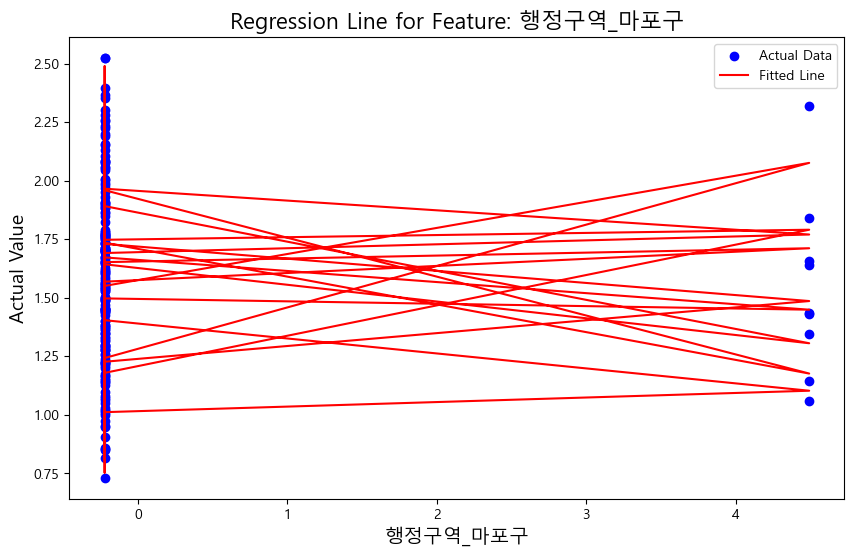

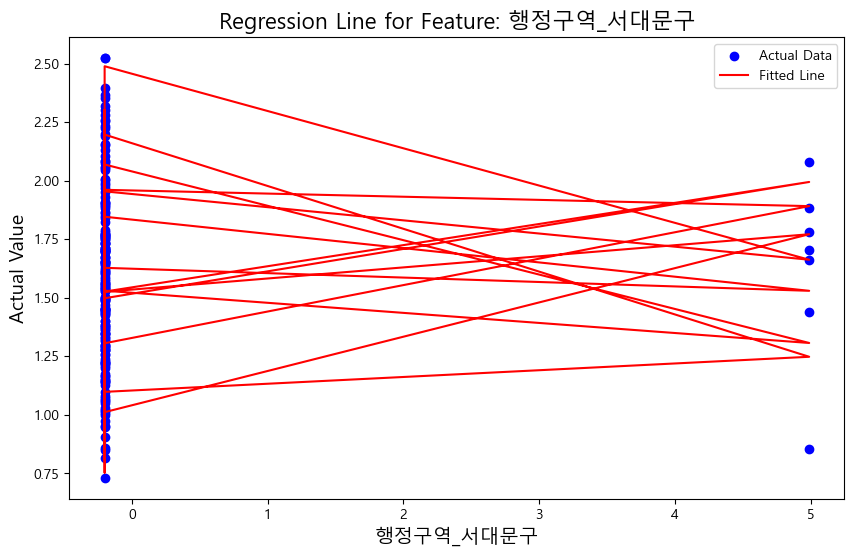

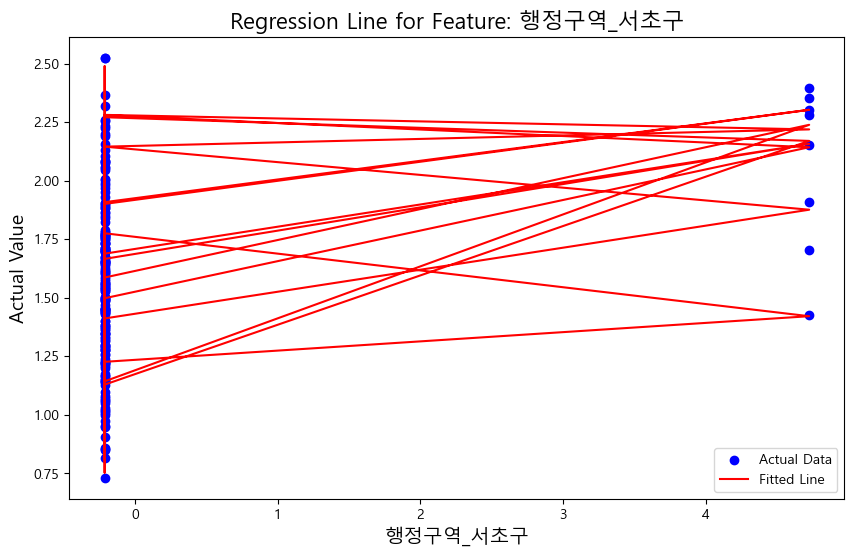

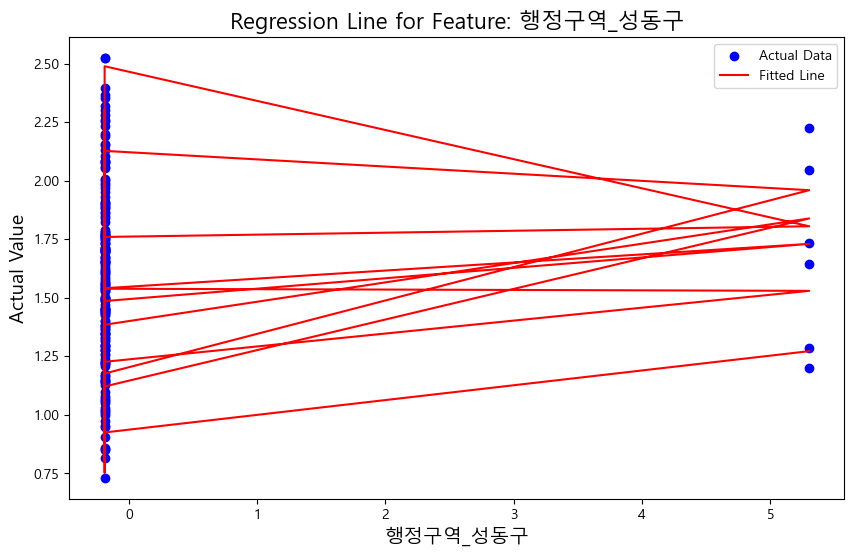

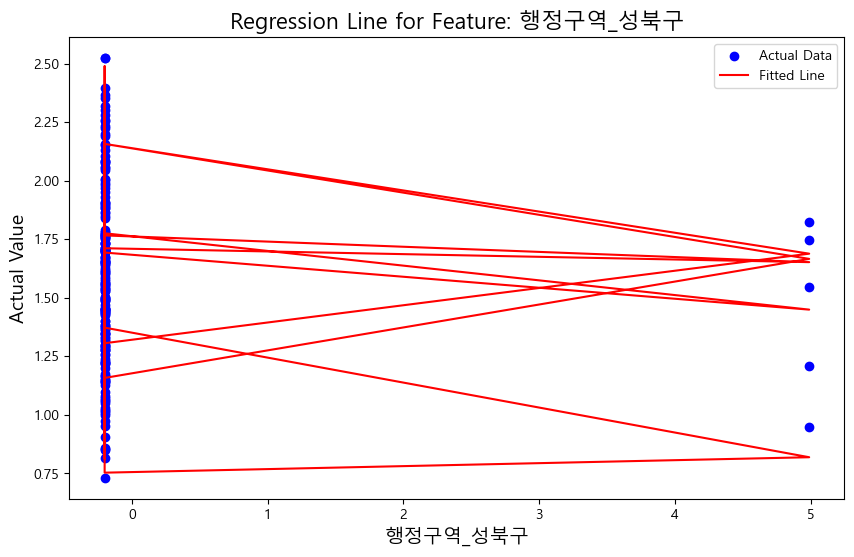

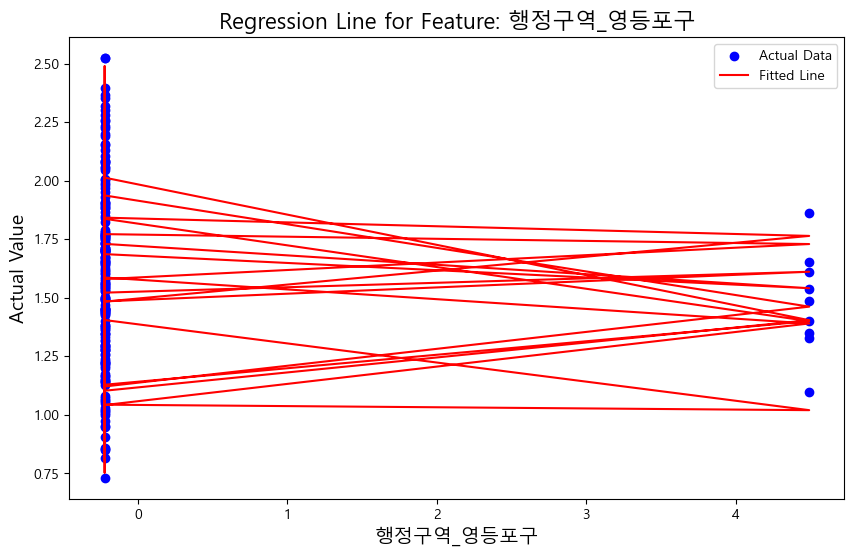

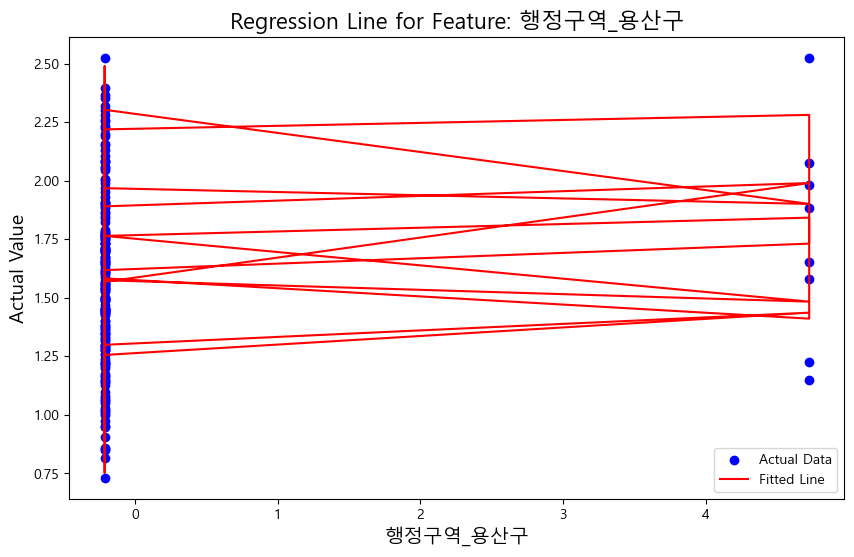

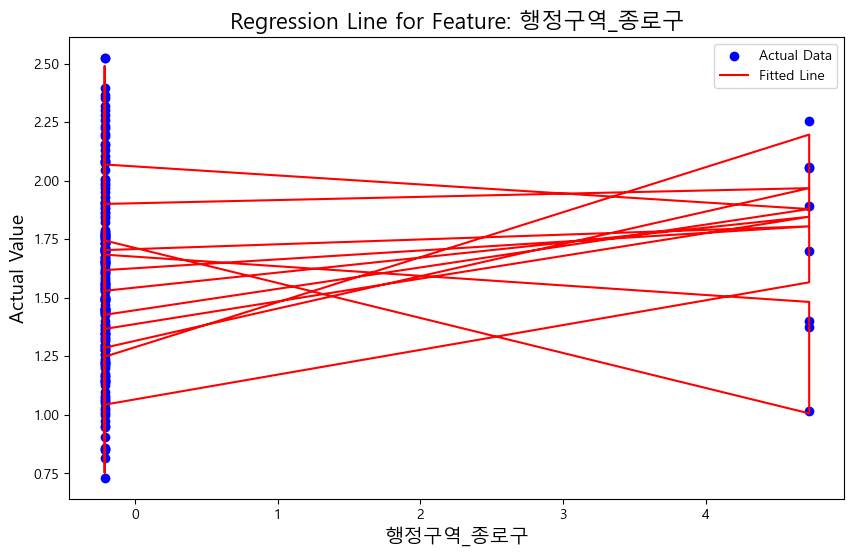

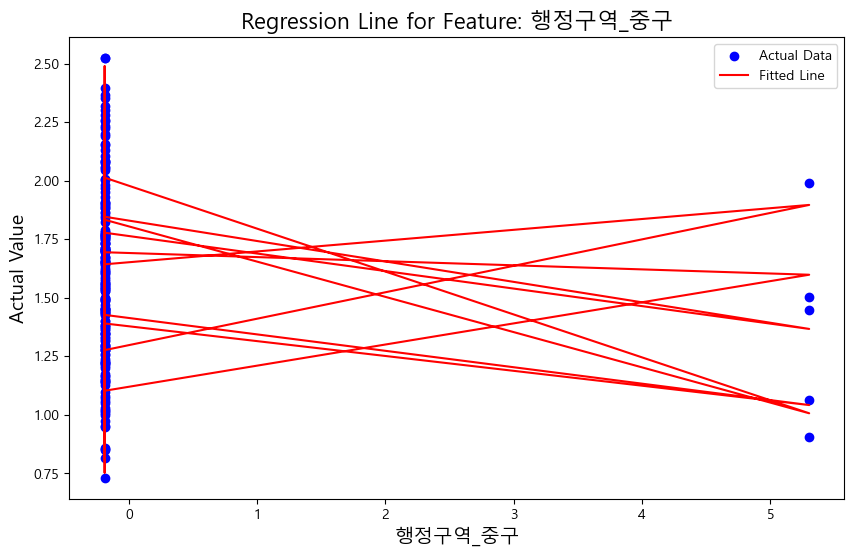

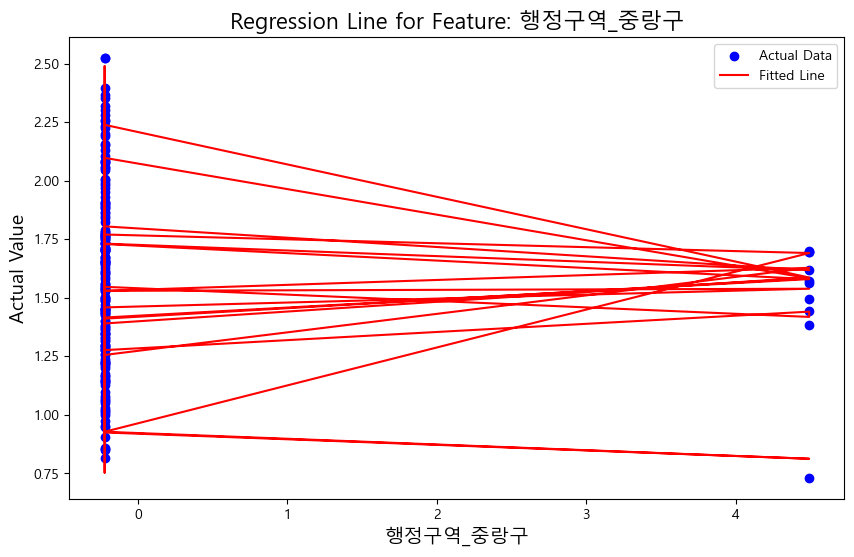

In [1335]:
# 모든 선택된 변수에 대해 반복
for col in selected_columns:
    # X와 y를 col에 맞게 정렬
    X_aligned = X_with_intercept[col].reindex(y_train.index)
    y_aligned = y_train.reindex(X_aligned.index)
    
    # 예측값 정렬
    y_pred_aligned = pd.Series(y_pred, index=y_aligned.index)
    
    # 시각화
    plt.figure(figsize=(10, 6))
    plt.scatter(X_aligned, y_aligned, color='blue', label='Actual Data')
    plt.plot(X_aligned, y_pred_aligned, color='red', label='Fitted Line')
    plt.title(f'Regression Line for Feature: {col}', fontsize=16)
    plt.xlabel(col, fontsize=14)
    plt.ylabel('Actual Value', fontsize=14)
    plt.legend()
    plt.show()




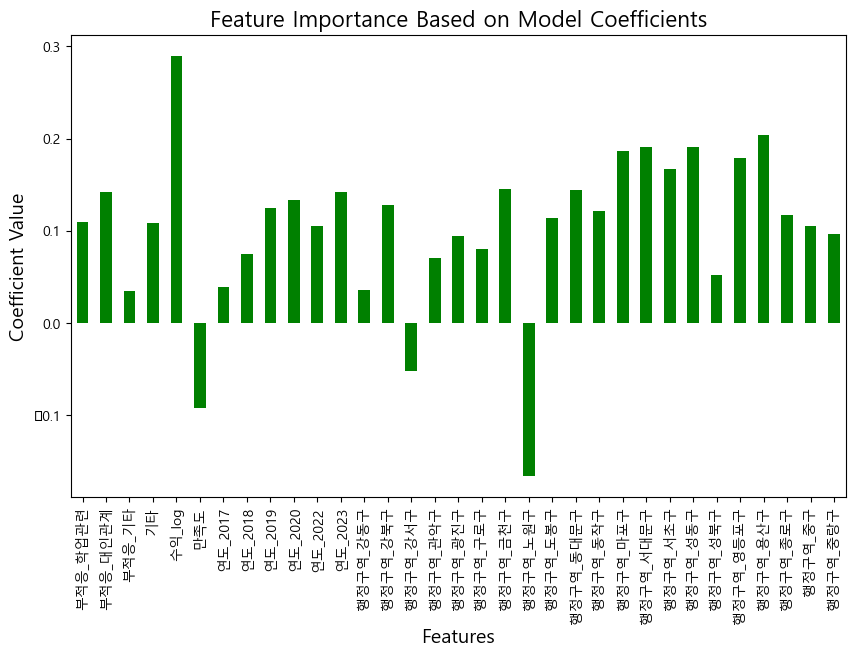

In [1336]:
# 특성 중요도 시각화 (회귀 계수 기반)
coefficients = final_model.params[selected_columns]
plt.figure(figsize=(10, 6))
coefficients.plot(kind='bar', color='green')
plt.title('Feature Importance Based on Model Coefficients', fontsize=16)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Coefficient Value', fontsize=14)
plt.show()


< 분석 >

- 수익은 회귀계수가 + 0.3 정도로 학업중단률과 관련성이 높음. 

- 해외출국은 다른 독립변수들과 상관계수가 높으므로 제거. (다중공선성 제거)



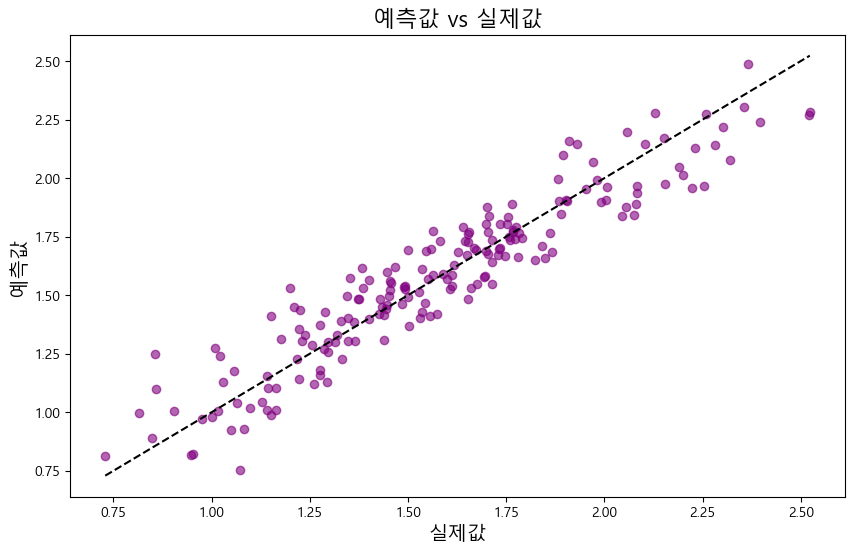

In [1337]:
# y와 y_pred의 인덱스를 일치시킴
y_pred_series = pd.Series(y_pred, index=y_train.index)

# 예측값과 실제값 비교 그래프
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_pred_series, color='purple', alpha=0.6)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='black', linestyle='--')
plt.title('예측값 vs 실제값', fontsize=16)
plt.xlabel('실제값', fontsize=14)
plt.ylabel('예측값', fontsize=14)
plt.show()



- 예측값과 실제값의 선형 그래프. 잔차의 분산이 적은 것으로 보임.

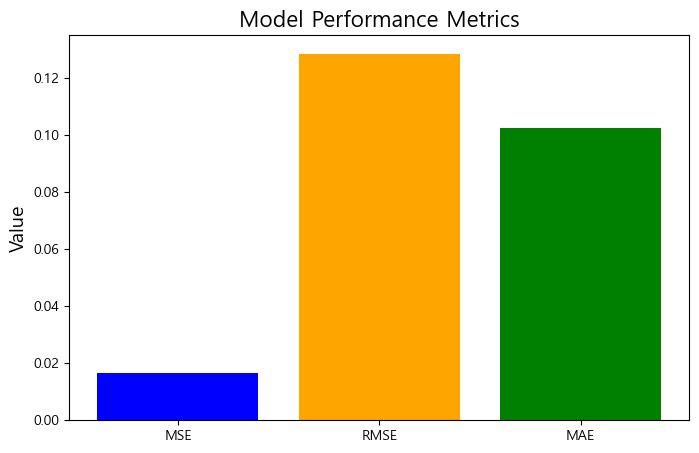

In [1338]:
# 성능 지표들 시각화
metrics = {'MSE': mse, 'RMSE': rmse, 'MAE': mae}
plt.figure(figsize=(8, 5))
plt.bar(metrics.keys(), metrics.values(), color=['blue', 'orange', 'green'])
plt.title('Model Performance Metrics', fontsize=16)
plt.ylabel('Value', fontsize=14)
plt.show()


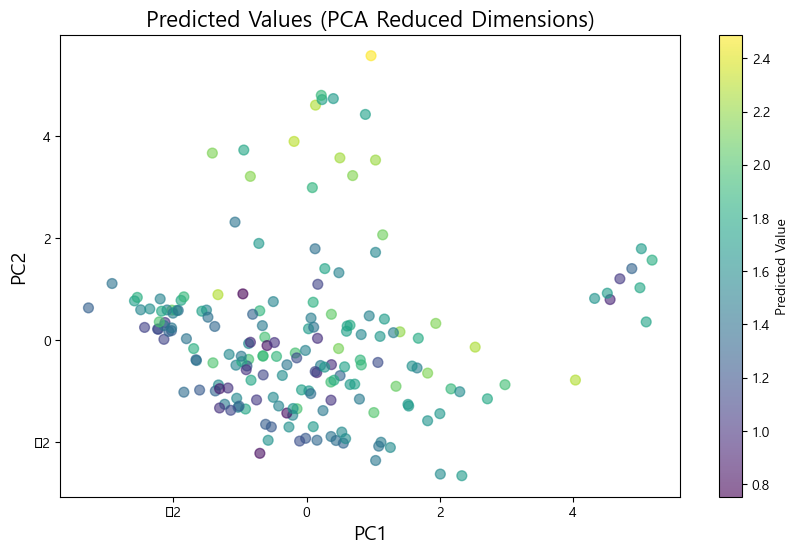

In [1339]:
from sklearn.decomposition import PCA

# PCA로 차원 축소 (2차원)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_with_intercept[selected_columns])

# 차원 축소된 데이터로 예측값 시각화
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred, cmap='viridis', s=50, alpha=0.6)
plt.colorbar(label='Predicted Value')
plt.title('Predicted Values (PCA Reduced Dimensions)', fontsize=16)
plt.xlabel('PC1', fontsize=14)
plt.ylabel('PC2', fontsize=14)
plt.show()
